In [1]:
import numpy as np
# rawdatapath="Cubesat v3 antenna20230521174820";
# rawdatapath="F5288 2x2 Through20230521114713"

# rawdatapath="F5288 2x2 Through20230521080710"
# rawdatapath="F5288 2x2 Through20230510164023_phi90_RHCP"
# rawdatapath="F5288 2x2 Through20230521080710"#RHCP
# rawdatapath="F5288 2x2 Through20230601204253"
# rawdatapath="D:/USER/Downloads/f6212/Measurement/F6212_OTA/F6212_2x2_BVH20230606115303"
# rawdatapath="F5288 2x2 Through20230521134930"#beamforming to 30 
# rawdatapath="F5288 2x2 Through20230521105812"#phi0 RHCP
# rawdatapath="D:/USER/Downloads/f6212/Measurement/F6212_OTA/F6212_2x2_BVH20230606115303"
# rawdatapath="D:/3ea1050014/Measurement/AH4 FE 8x8 cal20230810224840"
rawdatapath="D:/3ea1050014/Measurement/AH4 FE 2x2 cal20230804004712"
rawdatapath="D:/3ea1050014/Measurement/AH4 FE 2x2 cal20230804005111"
rawdatapath="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield20230823212536"
rawdatapath="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield20230823221549"#0
rawdatapath="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield20230825134420_p90t30"#90 30
rawdatapath="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield_p90t45_20230827011107"
rawdatapath="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield_p90t-45_20230827045207"
rawdatapath="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield_p90t-30_20230827054620"
# rawdatapath="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield_p90t4520230825161701"
# rawdatapath="D:/3ea1050014/Measurement/AH4 FE no cal20230804004307"
# rawdatapath="D:/GitLab/3ea1050014/Measurement/F6212 2x2 cal"
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
dir = os.getcwd()
# Get a list of CSV file paths
dfs = pd.DataFrame()
# deg_res=1
src_path = "../Src/"
data_path = "../Measurement/"
cora_path = "../CORA-Z7/"
setup_path = "../Setup/"
import sys
sys.path.insert(1, src_path)
sys.path.insert(2, cora_path)
sys.path.insert(2, setup_path)
sys.path.insert(2, data_path)
from array_process import *
deg_res=2;theta_min=-75;theta_max=76
# AR_HM(rawdatapath,deg_res,theta_min,theta_max)
# S21_HM(rawdatapath,deg_res,theta_min,theta_max)
# S31_HM(rawdatapath,deg_res,theta_min,theta_max)
# AR_HM(rawdatapath,deg_res,theta_min,theta_max)

In [3]:
def S12_S13_rect(rawdatapath,fre,deg_res=1,theta_min=-60,theta_max=61):
    
    fre_shift = (fre-15)/0.01
    theta_series = []
    dfr_0 = pd.DataFrame()
    dfl_0 = pd.DataFrame()
    dfr_90 = pd.DataFrame()
    dfl_90 = pd.DataFrame()
    for i in range(theta_min,theta_max,deg_res):
        theta_series.append(i)

    for theta in range(theta_min,theta_max,deg_res):
        file_path = f"{rawdatapath}/Phi90_theta_{theta}_g27.csv"
        # file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-15.csv"
        # file_path = f"{rawdatapath}/Phi0_theta_{theta}_g-20.csv"
        
        df = pd.read_csv(file_path)
        dfr_90 = dfr_90.append(df['S12_LogM'])

    for theta in range(theta_min,theta_max,deg_res):
        file_path = f"{rawdatapath}/Phi90_theta_{theta}_g27.csv"
        # file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-15.csv"
        # file_path = f"{rawdatapath}/Phi0_theta_{theta}_g-20.csv"

        df = pd.read_csv(file_path)
        dfl_90 = dfl_90.append(df['S13_LogM'])

    # # Plot line 1
    plt.plot(theta_series,dfr_90[fre_shift], label='Co-Pol')

    # # Plot line 2
    plt.plot(theta_series,dfl_90[fre_shift], label='X-Pol')
    plt.legend(fontsize=9,loc='upper right')
    plt.grid()
    plt.ylim([-80, -10])
    plt.xlim([theta_min,theta_max-1])
    plt.title('S12 vs S13 @ '+str(fre)+'GHz')
    plt.xlabel('Theta(deg)')
    plt.ylabel('Gain(dB)')
def AR_rect(rawdatapath1,theta_mark,fre=29,deg_res=1,theta_min=-60,theta_max=61):
    # rawdatapath1="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield_p90t45_20230827011107"
    fre_shift = (fre-15)/0.01
    # deg_res=1
    theta_series = []
    dfr_0 = pd.DataFrame()
    dfl_0 = pd.DataFrame()
    dfr_90 = pd.DataFrame()
    dfl_90 = pd.DataFrame()
    for i in range(theta_min,theta_max,deg_res):
        theta_series.append(i)
    #phi90
    for theta in range(theta_min,theta_max,deg_res):
        file_path = f"{rawdatapath1}/Phi90_theta_{theta}_g27.csv"
        # file_path = f"{rawdatapath1}/Phi90_theta_{theta}_g-15.csv"

        df = pd.read_csv(file_path)
        dfr_90 = dfr_90.append(df['S12_LogM'])

    for theta in range(theta_min,theta_max,deg_res):
        file_path = f"{rawdatapath1}/Phi90_theta_{theta}_g27.csv"
        # file_path = f"{rawdatapath1}/Phi90_theta_{theta}_g-15.csv"
    #     file_path = f"{rawdatapath1}/Phi0_theta_{theta}.csv"

        df = pd.read_csv(file_path)
        dfl_90 = dfl_90.append(df['S13_LogM'])


    # dfs_np_rhcp_0 = dfr_0[fre_shift].to_numpy()
    # dfs_np_lhcp_0 = dfl_0[fre_shift].to_numpy()
    dfs_np_rhcp_90 = dfr_90[fre_shift].to_numpy()
    dfs_np_lhcp_90 = dfl_90[fre_shift].to_numpy()

    # AR_0 = (abs(10**(dfs_np_rhcp_0/20) ) + abs(10**(dfs_np_lhcp_0/20) )) / (abs(10**(dfs_np_rhcp_0/20) ) - abs(10**(dfs_np_lhcp_0/20) )) 
    AR_90 = (abs(10**(dfs_np_rhcp_90/20) ) + abs(10**(dfs_np_lhcp_90/20) )) / (abs(10**(dfs_np_rhcp_90/20) ) - abs(10**(dfs_np_lhcp_90/20) )) 
    # fig = plt.figure()
    # ax = fig.add_subplot(111)
    # for i, v in enumerate(AR_90[60]):



    plt.figure()
    plt.plot(theta_series,abs(AR_90), label='AR @$\\Phi$=90, '+str(fre)+'GHz')
    a=(theta_max-theta_min)/deg_res;i=int((theta_mark-theta_min)/deg_res)
    label="("+str(theta_mark)+","+str(round(AR_90[i],2))+")"

    plt.annotate(text=label, xy =(theta_series[i], AR_90[i]), xytext=(theta_series[i]-5, AR_90[i]+1))

    # plt.plot(theta_series,abs(AR_0), label='AR @$\\Phi$=0, '+str(fre)+'GHz')
    plt.ylim([1, 8])
    plt.xlim([theta_min,theta_max-1])
    plt.xlabel('Theta(deg)')
    plt.ylabel('AR')
    plt.legend(fontsize=9,loc='upper center')
    plt.grid()

In [6]:
def S21_HM(rawdatapath,deg_res,theta_min=-60,theta_max=61):
    dfs = pd.DataFrame()
    for theta in range(theta_min,theta_max,deg_res):
        # file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-15.csv"
        file_path = f"{rawdatapath}/Phi90_theta_{theta}_g27.csv"

        df = pd.read_csv(file_path)
        dfs = pd.concat([dfs, df['S21_LogM']], axis=1)
    dfs_np_rhcp = dfs.to_numpy()
    plt.imshow(np.flip(dfs_np_rhcp, axis = 0), cmap='gnuplot', aspect='auto',vmin=-60,vmax = -35, extent=[theta_min,theta_max, 15, 32])
    colorbar= plt.colorbar()
    plt.xlabel('Theta(deg)')
    plt.ylabel('Frequency(GHz)')
    plt.title('Heatmap of S12(dB)')
    plt.show()

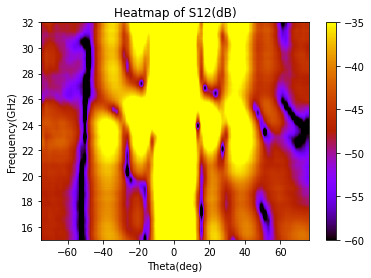

In [7]:
S21_HM(rawdatapath,deg_res,theta_min=-75,theta_max=76)

In [3]:
rawdatapath="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 RX inphase cal20230831141917"
deg_res=2;theta_min=-75;theta_max=76;fre=20
S21_S31_rect(rawdatapath,fre=fre,deg_res=deg_res,theta_min=theta_min,theta_max=theta_max)
# AR_rect(rawdatapath,theta_mark=-30,fre=fre,deg_res=deg_res,theta_min=theta_min,theta_max=theta_max)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 RX inphase cal20230831141917/Phi90_theta_-75_g-20.csv'

c:\Users\tronfuture\Downloads\3ea1050014\Analysis\../Src\array_process.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
c:\Users\tronfuture\Downloads\3ea1050014\Analysis\../Src\array_process.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
c:\Users\tronfuture\Downloads\3ea1050014\Analysis\../Src\array_process.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
c:\Users\tronfuture\Downloads\3ea1050014\Analysis\../Src\array_process.py:233: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['

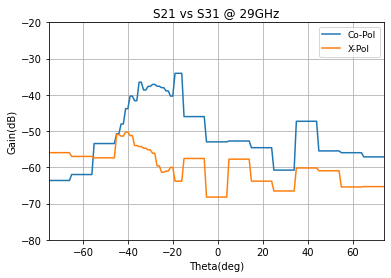

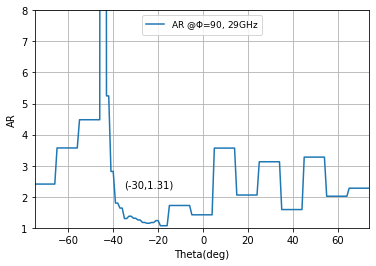

In [51]:
# rawdatapath1="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield20230823212536"
# rawdatapath2="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield20230825134420"
# phi_check(29,rawdatapath1,rawdatapath2)
deg_res=1;theta_min=-75;theta_max=75
# rawdatapath="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield_p90t45_20230827011107"

rawdatapath="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield_p90t-30_20230827054620"
fre=29
# for fre in a:
S21_S31_rect(rawdatapath,fre,deg_res,theta_min,theta_max)
# S21_HM(rawdatapath,deg_res,theta_min,theta_max)
# S31_HM(rawdatapath,deg_res,theta_min,theta_max)
# AR_HM(rawdatapath,deg_res,theta_min,theta_max)
AR_rect(rawdatapath,-30,fre,deg_res,theta_min,theta_max)
# S21_HM(rawdatapath,5)

C:\Users\TRONFU~1\AppData\Local\Temp/ipykernel_9324/3637530500.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
C:\Users\TRONFU~1\AppData\Local\Temp/ipykernel_9324/3637530500.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
C:\Users\TRONFU~1\AppData\Local\Temp/ipykernel_9324/3637530500.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
C:\Users\TRONFU~1\AppData\Local\Temp/ipykernel_9324/3637530500.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
C:\Users\TRONFU~1\AppDat

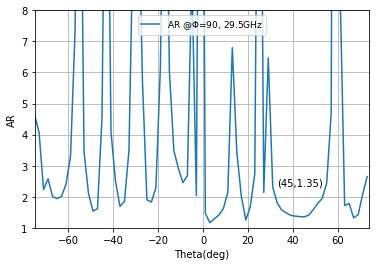

In [62]:
# def AR_rect(rawdatapath1,fre=29,deg_res=1,theta_min=-60,theta_max=61):
#     # rawdatapath1="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield20230823212536"
#     # rawdatapath2="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield20230823221549"
#     # for fre in range(28):
fre = 29.5;deg_res=2;theta_min=-75;theta_max=75;theta_mark=45
rawdatapath1="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield_p90t45_20230827011107"
fre_shift = (fre-15)/0.01
# deg_res=1
theta_series = []
dfr_0 = pd.DataFrame()
dfl_0 = pd.DataFrame()
dfr_90 = pd.DataFrame()
dfl_90 = pd.DataFrame()
for i in range(theta_min,theta_max,deg_res):
    theta_series.append(i)
#phi90
for theta in range(theta_min,theta_max,deg_res):
    file_path = f"{rawdatapath1}/Phi90_theta_{theta}_g-20.csv"
    #file_path = f"{rawdatapath}/Phi0_theta_{theta}_g-15.csv"

    df = pd.read_csv(file_path)
    dfr_90 = dfr_90.append(df['S21_LogM'])

for theta in range(theta_min,theta_max,deg_res):
    file_path = f"{rawdatapath1}/Phi90_theta_{theta}_g-20.csv"
#     file_path = f"{rawdatapath1}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfl_90 = dfl_90.append(df['S31_LogM'])


# dfs_np_rhcp_0 = dfr_0[fre_shift].to_numpy()
# dfs_np_lhcp_0 = dfl_0[fre_shift].to_numpy()
dfs_np_rhcp_90 = dfr_90[fre_shift].to_numpy()
dfs_np_lhcp_90 = dfl_90[fre_shift].to_numpy()

# AR_0 = (abs(10**(dfs_np_rhcp_0/20) ) + abs(10**(dfs_np_lhcp_0/20) )) / (abs(10**(dfs_np_rhcp_0/20) ) - abs(10**(dfs_np_lhcp_0/20) )) 
AR_90 = (abs(10**(dfs_np_rhcp_90/20) ) + abs(10**(dfs_np_lhcp_90/20) )) / (abs(10**(dfs_np_rhcp_90/20) ) - abs(10**(dfs_np_lhcp_90/20) )) 
# fig = plt.figure()
# ax = fig.add_subplot(111)
# for i, v in enumerate(AR_90[60]):



plt.figure()
plt.plot(theta_series,abs(AR_90), label='AR @$\\Phi$=90, '+str(fre)+'GHz')
a=(theta_max-theta_min)/deg_res;i=int((theta_mark-theta_min)/deg_res)
label="("+str(theta_mark)+","+str(round(AR_90[i],2))+")"

plt.annotate(text=label, xy =(theta_series[i], AR_90[i]), xytext=(theta_series[i]-12, AR_90[i]+1))
# plt.plot(theta_series,abs(AR_0), label='AR @$\\Phi$=0, '+str(fre)+'GHz')
plt.ylim([1, 8])
plt.xlim([theta_min,theta_max-1])
plt.xlabel('Theta(deg)')
plt.ylabel('AR')
plt.legend(fontsize=9,loc='upper center')
plt.grid()

# AR_rect(rawdatapath1,29,deg_res,theta_min,theta_max)

In [29]:
AR_90[60]

1.3545759338179635

C:\Users\TRONFU~1\AppData\Local\Temp/ipykernel_11672/1148690393.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
C:\Users\TRONFU~1\AppData\Local\Temp/ipykernel_11672/1148690393.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
C:\Users\TRONFU~1\AppData\Local\Temp/ipykernel_11672/1148690393.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
C:\Users\TRONFU~1\AppData\Local\Temp/ipykernel_11672/1148690393.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
C:\Users\TRONFU~1\Ap

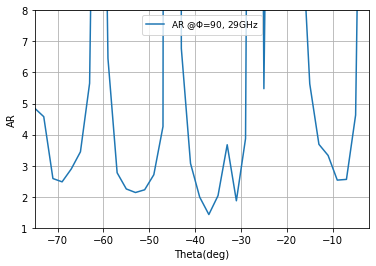

In [13]:
# def AR_rect(rawdatapath1,fre=29,deg_res=1,theta_min=-60,theta_max=61):
    # rawdatapath1="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield20230823212536"
    # rawdatapath2="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield20230823221549"
    # for fre in range(28):
#     fre = 28
fre=29;rawdatapath1=rawdatapath;deg_res=2;theta_min=-75;theta_max=-1
fre_shift = (fre-15)/0.01
# deg_res=1
theta_series = []
dfr_0 = pd.DataFrame()
dfl_0 = pd.DataFrame()
dfr_90 = pd.DataFrame()
dfl_90 = pd.DataFrame()
for i in range(theta_min,theta_max,deg_res):
    theta_series.append(i)
#phi90
for theta in range(theta_min,theta_max,deg_res):
    file_path = f"{rawdatapath1}/Phi90_theta_{theta}_g-20.csv"
    #file_path = f"{rawdatapath}/Phi0_theta_{theta}_g-15.csv"

    df = pd.read_csv(file_path)
    dfr_90 = dfr_90.append(df['S21_LogM'])

for theta in range(theta_min,theta_max,deg_res):
    file_path = f"{rawdatapath1}/Phi90_theta_{theta}_g-20.csv"
#     file_path = f"{rawdatapath1}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfl_90 = dfl_90.append(df['S31_LogM'])


# dfs_np_rhcp_0 = dfr_0[fre_shift].to_numpy()
# dfs_np_lhcp_0 = dfl_0[fre_shift].to_numpy()
dfs_np_rhcp_90 = dfr_90[fre_shift].to_numpy()
dfs_np_lhcp_90 = dfl_90[fre_shift].to_numpy()

# AR_0 = (abs(10**(dfs_np_rhcp_0/20) ) + abs(10**(dfs_np_lhcp_0/20) )) / (abs(10**(dfs_np_rhcp_0/20) ) - abs(10**(dfs_np_lhcp_0/20) )) 
AR_90 = (abs(10**(dfs_np_rhcp_90/20) ) + abs(10**(dfs_np_lhcp_90/20) )) / (abs(10**(dfs_np_rhcp_90/20) ) - abs(10**(dfs_np_lhcp_90/20) )) 


plt.figure()
plt.plot(theta_series,abs(AR_90), label='AR @$\\Phi$=90, '+str(fre)+'GHz')
# plt.plot(theta_series,abs(AR_0), label='AR @$\\Phi$=0, '+str(fre)+'GHz')
plt.ylim([1, 8])
plt.xlim([theta_min,theta_max-1])
plt.xlabel('Theta(deg)')
plt.ylabel('AR')
plt.legend(fontsize=9,loc='upper center')
plt.grid()


# AR_rect(rawdatapath,29,2,theta_min,theta_max)

In [ ]:
rawdatapath="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield_p90t45_20230827000811"
dfs = pd.DataFrame()
for theta in range(-60,61,10):
    file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-20.csv"
    df = pd.read_csv(file_path)
    dfs = pd.concat([dfs, df['S31_LogM']], axis=1)
dfs_np_lhcp = dfs.to_numpy()
print(dfs.shape)
plt.imshow(np.flip(dfs_np_lhcp, axis = 0), cmap='gnuplot', aspect='auto',vmin=-60,vmax = -30, extent=[-60, 60, 15, 32])
colorbar= plt.colorbar()
plt.xlabel('Theta(deg)')
plt.ylabel('Frequency(GHz)')
plt.title('Heatmap of S31(dB)')
plt.show()

In [ ]:
dfs = pd.DataFrame()
deg_res=10


for theta in range(-60,61,deg_res):
#     file_path = f"{rawdatapath}/Phi90_theta_{theta}.csv"
    file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-20.csv"
    df = pd.read_csv(file_path)
    dfs = pd.concat([dfs, df['S21_LogM']], axis=1)
   
dfs_np_rhcp = dfs.to_numpy()

# print(dfs.shape)
# dfT
# dfs
plt.imshow(np.flip(dfs_np_rhcp, axis = 0), cmap='gnuplot', aspect='auto',vmin=-60,vmax = -30, extent=[-60, 60, 15, 32])
colorbar= plt.colorbar()
# colorbar.set_lim(-60, -20)


# Add labels and title
plt.xlabel('Theta(deg)')
plt.ylabel('Frequency(GHz)')
plt.title('Heatmap of S21(dB)')

In [ ]:
dir = os.getcwd()
# Get a list of CSV file paths
dfs = pd.DataFrame()
deg_res=10


for theta in range(-60,61,deg_res):
    # file_path = f"{rawdatapath}/Phi90_theta_{theta}.csv"
    file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-20.csv"
    df = pd.read_csv(file_path)
    dfs = pd.concat([dfs, df['S31_LogM']], axis=1)
   
dfs_np_lhcp = dfs.to_numpy()

print(dfs.shape)
# dfT
# dfs
plt.imshow(np.flip(dfs_np_lhcp, axis = 0), cmap='gnuplot', aspect='auto',vmin=-60,vmax = -30, extent=[-60, 60, 15, 32])
colorbar= plt.colorbar()
# colorbar.set_lim(-60, -20)


# Add labels and title
plt.xlabel('Theta(deg)')
plt.ylabel('Frequency(GHz)')
plt.title('Heatmap of S31(dB)')

plt.show()

In [ ]:
AR_dis = (abs(10**(dfs_np_lhcp/20)) + abs(10**(dfs_np_rhcp/20))) / (abs(10**(dfs_np_rhcp/20)) - abs(10**(dfs_np_lhcp/20)))
plt.imshow(np.flip(abs(AR_dis), axis = 0), cmap='gnuplot', aspect='auto',vmin=1,vmax = 3, extent=[1, 16, 15, 32])
colorbar= plt.colorbar() 

In [11]:
rawdatapath="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 RX inphase cal20230827233847"
dfs = pd.DataFrame()
for ic_id in range(16):    
    file_path = f"{rawdatapath}/{ic_id}_27.csv";df = pd.read_csv(file_path)
    dfs = pd.concat([dfs, df['S12_LogM']], axis=1)
dfs_np_rhcp = dfs.to_numpy()

dfs = pd.DataFrame()
for ic_id in range(16):    
    file_path = f"{rawdatapath}/{ic_id}_27.csv";df = pd.read_csv(file_path)
    dfs = pd.concat([dfs, df['S13_LogM']], axis=1)
dfs_np_lhcp = dfs.to_numpy()
# dfs_np_lhcp[0][15]
AR = (abs(10**(dfs_np_rhcp/20) ) + abs(10**(dfs_np_lhcp/20) )) / (abs(10**(dfs_np_rhcp/20) ) - abs(10**(dfs_np_lhcp/20) ))
AR_dis = (abs(10**(dfs_np_lhcp/20)) + abs(10**(dfs_np_rhcp/20))) / (abs(10**(dfs_np_rhcp/20)) - abs(10**(dfs_np_lhcp/20)))


<function matplotlib.pyplot.show(close=None, block=None)>

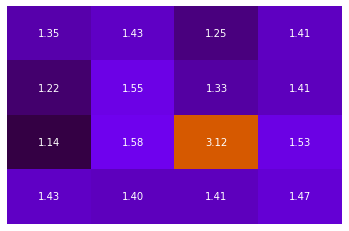

In [19]:
array_2d = np.array([[1.12, 2.24, 3.14,4.12132],
                     [5.14, 6.14, 7.14,8.14],
                     [9.14, 10.14,11.14,12.14],
                     [13.14,14.14,15.14,16.14]])
freq_GHz=18;freq_index=int((freq_GHz-18)*100)
#TX
# array_2d[0][0]=AR_dis[freq_index][13]
# array_2d[0][1]=AR_dis[freq_index][14]
# array_2d[0][2]=AR_dis[freq_index][3]
# array_2d[0][3]=AR_dis[freq_index][0]
# array_2d[1][0]=AR_dis[freq_index][12]
# array_2d[1][1]=AR_dis[freq_index][15]
# array_2d[1][2]=AR_dis[freq_index][2]
# array_2d[1][3]=AR_dis[freq_index][1]
# array_2d[2][0]=AR_dis[freq_index][11]
# array_2d[2][1]=AR_dis[freq_index][8]
# array_2d[2][2]=AR_dis[freq_index][7]
# array_2d[2][3]=AR_dis[freq_index][4]
# array_2d[3][0]=AR_dis[freq_index][10]
# array_2d[3][1]=AR_dis[freq_index][9]
# array_2d[3][2]=AR_dis[freq_index][6]
# array_2d[3][3]=AR_dis[freq_index][5]
#RX
array_2d[0][0]=AR_dis[freq_index][5]
array_2d[0][1]=AR_dis[freq_index][4]
array_2d[0][2]=AR_dis[freq_index][3]
array_2d[0][3]=AR_dis[freq_index][2]
array_2d[1][0]=AR_dis[freq_index][6]
array_2d[1][1]=AR_dis[freq_index][7]
array_2d[1][2]=AR_dis[freq_index][0]
array_2d[1][3]=AR_dis[freq_index][1]
array_2d[2][0]=AR_dis[freq_index][9]
array_2d[2][1]=AR_dis[freq_index][8]
array_2d[2][2]=AR_dis[freq_index][15]
array_2d[2][3]=AR_dis[freq_index][14]
array_2d[3][0]=AR_dis[freq_index][10]
array_2d[3][1]=AR_dis[freq_index][11]
array_2d[3][2]=AR_dis[freq_index][12]
array_2d[3][3]=AR_dis[freq_index][13]
plt.imshow(array_2d, cmap='gnuplot', aspect='auto',vmin=1,vmax = 4, interpolation='nearest')
for i in range(4):
    for j in range(4):
        plt.annotate(f'{array_2d[i, j]:.2f}', xy=(j, i), ha='center', va='center', color='white')

plt.axis('off')
# colorbar= plt.colorbar()
plt.show






Text(0, 0.5, 'y-elements')

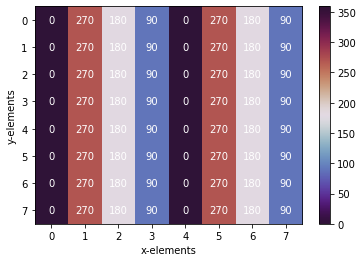

In [30]:
# 0811
# ant_scan={
#  0: [-164.74118042, 155.040252686, 173.652954102, 124.795028687],
#  1: [51.8925209045, 43.1874313354, 86.2739486694, 10.2330026627],
#  2: [37.9257774353, -11.5386343002, 39.5349502563, -46.661315918],
#  3: [-141.788421631, -172.501693726, -159.403671265, 126.145767212],
#  4: [-121.128105164, -173.918014526, -148.280776978, 156.303237915],
#  5: [74.0551071167, -4.51716327667, 110.450630188, 110.032119751],
#  6: [76.429725647, 15.4169445038, 77.1085662842, 8.65240287781],
#  7: [-126.91569519, -157.79548645, -119.139411926, 170.685745239],
#  8: [-130.422576904, 169.653884888, -167.452072144, 142.780212402],
#  9: [71.9919662476, 47.0213699341, 99.4498062134, 36.5730056763],
#  10: [76.9913253784, 6.79789924622, 46.3785629272, 5.27346324921],
#  11: [-159.595779419, 176.483306885, -145.017974854, 124.904335022],
#  12: [64.8651046753, 54.9465522766, 80.6042633057, 83.8004455566],
#  13: [-173.626861572, 150.32925415, -174.550186157, 104.609390259],
#  14: [-114.606842041, -158.42755127, -143.545700073, 142.54737854],
#  15: [78.5109939575, 83.9232788086, 128.3959198, 120.61051178]}
ant_scan={
0: [39.3887367249, 3.55017471313, 32.8607215881, -12.7127094269],
 1: [-64.7700042725, -81.4843215942, -60.4848213196, -97.5462417603],
 2: [-62.8879814148, -122.872467041, -85.7126541138, -110.716506958],
 3: [73.2451248169, 13.0377244949, 59.9247589111, -3.64697694778],
 4: [133.920547485, 58.07188797, 102.749443054, 43.1051521301],
 5: [-49.5219230652, -130.561859131, -25.1052074432, 1.44330251217],
 6: [-46.1551780701, -97.3231506348, -57.4795799255, -93.3128585815],
 7: [137.946502686, 86.073097229, 110.698051453, 37.8333282471],
 8: [117.106697083, 49.1458702087, 90.6722869873, 23.0840320587],
 9: [-58.8065986633, -90.1633834839, -47.9220848083, -69.7879867554],
 10: [-54.3172416687, -104.240020752, -77.7809448242, -106.08946991],
 11: [84.0037231445, 27.1772422791, 86.0554428101, 23.7990570068],
 12: [-51.1785430908, -63.6898460388, -27.1518917084, -28.626335144],
 13: [57.7250709534, 2.07697820663, 46.3771781921, -14.6926250458],
 14: [122.008773804, 50.789440155, 90.1809921265, 39.4151420593],
 15: [-14.9249572754, -39.4377441406, -151.384536743, 12.692527771]}
# phase_h={#0815 h
#  0: [-14.4193458557, -18.0543651581, -129.658203125, 173.007049561],
#  1: [-116.100364685, -152.955673218, 33.1842346191, 22.475107193],
#  2: [-109.234451294, -137.54006958, 62.128200531, 38.3718795776],
#  3: [7.78056144714, -32.1128463745, -130.085479736, 177.811965942],
#  4: [55.3971595764, 8.40690517426, -102.381790161, -124.639205933],
#  5: [-104.736999512, -125.704711914, 12.0429258347, 17.1187744141],
#  6: [-90.9315109253, -113.817955017, 97.9278488159, 54.308052063],
#  7: [70.1000137329, 55.7853507996, -105.337654114, -149.760787964],
#  8: [47.2154541016, 31.7546043396, -111.924911499, -151.67678833],
#  9: [-121.701393127, -158.145309448, 44.8032951355, 12.6381912231],
#  10: [-102.411750793, -126.893211365, 59.5781021118, 29.8110675812],
#  11: [40.0960845947, -8.36920833588, -117.682754517, -150.532562256],
#  12: [-91.572052002, -123.170219421, 47.9969520569, -92.9176940918],
#  13: [-1.24834442139, 21.2864322662, -144.612472534, 163.757446289],
#  14: [70.8506622314, 16.8229160309, -92.1096420288, -125.157974243],
#  15: [-82.3230438232, -110.636184692, -124.848564148, -54.5651893616]}
# phase_v={#0815 v
#  0: [-136.668899536, 176.617935181, -84.2720184326, -93.9997940063],
#  1: [-77.2966690063, -95.1890411377, 144.531707764, -109.031051636],
#  2: [-52.5847854614, 132.063476563, 159.604232788, -91.2199249268],
#  3: [74.6214675903, -110.375137329, -70.7661972046, 27.8098602295],
#  4: [133.457641602, -81.4487991333, -43.3092460632, 70.0319061279],
#  5: [-59.4428291321, -147.05015564, 156.500335693, -81.4511947632],
#  6: [-44.613697052, -100.460525513, -170.983627319, -73.8380966187],
#  7: [159.185287476, -72.5970687866, -18.1936130524, 85.5965118408],
#  8: [114.675964355, -90.9892959595, -47.7075004578, 58.4759750366],
#  9: [-59.1017570496, 169.569274902, 140.373703003, -33.1505737305],
#  10: [-54.0309028625, -47.580581665, 128.182952881, -82.1581726074],
#  11: [46.7335395813, -104.533729553, -48.7527084351, 52.9498672485],
#  12: [-52.0724754333, -99.0798950195, 72.2462310791, -87.2367095947],
#  13: [44.5966567993, -122.394721985, -82.7901611328, 20.4368114471],
#  14: [114.469459534, -80.8755187988, -53.5337753296, -113.376976013],
#  15: [-36.7522277832, -107.180732727, -127.935752869, -73.742729187]}
# for i in range(16):
#     for j in range(4):
#         ant_scan[i][j]=phase_h[i][j]-phase_v[i][j]
# phase_meas = np.array(
#  [[164.74118042, 155.040252686, 173.652954102, 124.795028687],
#  [51.8925209045, 43.1874313354, 86.2739486694, 10.2330026627],
#  [37.9257774353, -11.5386343002, 39.5349502563, -46.661315918],
#  [-141.788421631, -172.501693726, -159.403671265, 126.145767212],
#  [-121.128105164, -173.918014526, -148.280776978, 156.303237915],
#  [74.0551071167, -4.51716327667, 110.450630188, 110.032119751],
#  [76.429725647, 15.4169445038, 77.1085662842, 8.65240287781],
#  [-126.91569519, -157.79548645, -119.139411926, 170.685745239],
#  [-130.422576904, 169.653884888, -167.452072144, 142.780212402],
#  [71.9919662476, 47.0213699341, 99.4498062134, 36.5730056763],
#   [76.9913253784, 6.79789924622, 46.3785629272, 5.27346324921],
#   [-159.595779419, 176.483306885, -145.017974854, 124.904335022],
#   [64.8651046753, 54.9465522766, 80.6042633057, 83.8004455566],
#   [-173.626861572, 150.32925415, -174.550186157, 104.609390259],
#   [-114.606842041, -158.42755127, -143.545700073, 142.54737854],
#   [78.5109939575, 83.9232788086, 128.3959198, 120.61051178]])
# phase_meas = phase_meas % 360
# phase_h = {0: [-12.0768318176, -10.2271947861, -122.29209137, 179.489837646], 1: [-108.932128906, -145.614273071, 41.1992492676, 29.0467395782], 2: [-98.1457824707, -133.249206543, 64.0086746216, 44.3922424316], 3: [108.592437744, 128.333984375, 169.923065186, 157.431427002], 4: [125.880249023, 126.897705078, 176.320510864, 162.747528076], 5: [-170.040740967, 168.361404419, 118.562164307, 115.628097534], 6: [-172.568496704, 172.831619263, 130.436950684, 131.659881592], 7: [121.726142883, 123.94052887, -171.914657593, 162.122833252], 8: [117.531929016, 128.963912964, 175.755187988, 156.269882202], 9: [-179.546951294, 166.947494507, 117.911819458, 121.740539551], 10: [178.716262817, 168.691314697, 122.547584534, 127.84879303], 11: [179.940246582, -166.719772339, -146.884521484, -161.544372559], 12: [169.187210083, 164.376144409, 145.910720825, 152.758575439], 13: [148.953201294, 157.389709473, 167.185394287, 159.277618408], 14: [149.85534668, 154.72328186, 172.557525635, 167.133178711], 15: [-172.936035156, 175.18989563, 168.630233765, 153.80178833]}
# phase_v = {0: [34.7981300354, -101.71270752, -81.5298995972, 6.693608284], 1: [-76.0963821411, 36.1504249573, 103.147209167, -102.824737549], 2: [-56.0580787659, 24.7483901978, 110.712226868, -88.5535049438], 3: [127.530235291, 171.556838989, 147.314865112, 118.52935791], 4: [139.954589844, 161.088684082, 156.934127808, 128.055480957], 5: [174.419677734, 134.610900879, 141.408935547, -177.012954712], 6: [141.468353271, 139.441986084, 150.45350647, 171.003677368], 7: [145.461624146, 160.317077637, 111.584533691, 131.190353394], 8: [135.640975952, 158.371871948, 146.044631958, 123.5496521], 9: [166.579376221, 135.136825562, 140.440841675, 179.951309204], 10: [152.145431519, 138.997787476, 139.873306274, 173.016372681], 11: [-178.23890686, -148.422637939, -143.490478516, 178.725219727], 12: [164.382507324, 156.15071106, 157.573577881, 170.702011108], 13: [145.658721924, 166.634933472, 169.448074341, 146.729202271], 14: [153.26260376, 165.104248047, 163.793075562, 150.662460327], 15: [171.201324463, 161.681625366, 171.064926147, 178.303619385]}

# phase_h = {0: [-15.6292381287, -18.5820045471, -122.347877502, -159.472366333], 1: [-108.783348083, -145.134414673, 33.6360931396, 27.8339385986], 2: [-101.754020691, -132.189910889, 61.7456474304, 47.4491958618], 3: [12.766992569, -6.51723861694, -127.00113678, -175.34211731], 4: [48.239200592, 6.2926530838, -97.609046936, -121.15826416], 5: [-96.9421005249, -115.520996094, 53.9072914124, 7.40326929092], 6: [-86.1137084961, -101.536552429, 87.5492019653, 48.0665245056], 7: [80.295463562, 59.6714019775, -103.762367249, -142.179977417], 8: [56.283908844, 36.6426315308, -101.621437073, -143.76348877], 9: [-116.319786072, -146.009643555, 42.043384552, 19.1076660156], 10: [-96.3300170898, -126.663169861, 62.2510871887, 37.3524856567], 11: [31.3929634094, -2.01545953751, -113.340698242, -143.288101196], 12: [-90.3965530396, -114.407684326, 53.2697296143, 24.9946613312], 13: [1.90431177616, -16.5464267731, -129.489807129, 165.396972656], 14: [60.8105201721, 13.3537082672, -85.0493621826, -123.999664307], 15: [-81.2400665283, -111.664001465, -43.4013137817, 68.843421936]}
# phase_v = {0: [34.1758232117, -99.960647583, -81.3501434326, 1.27869260311], 1: [-74.6284484863, 43.4823265076, 125.806236267, -104.54662323], 2: [-56.0364646912, 33.6572914124, -173.87322998, -91.1293563843], 3: [67.8257827759, -110.002166748, -70.8166122437, 28.1365089417], 4: [137.458435059, -79.4094696045, -47.2951469421, 69.1322937012], 5: [-59.2424507141, 71.9769744873, 163.904724121, -96.8999557495], 6: [-42.0542106628, -123.650985718, -173.193054199, -70.8363494873], 7: [165.701583862, -72.2506790161, -16.4340438843, 90.8644104004], 8: [111.683517456, -89.049911499, -47.3970069885, 58.3479690552], 9: [-56.8132667542, 11.0093851089, 162.960205078, -83.8428421021], 10: [-53.9638519287, 127.610374451, 138.902664185, -80.42162323], 11: [93.4469604492, -98.1849594116, -51.410484314, 61.7802009583], 12: [-52.7371864319, 56.3327827454, -172.027587891, -90.2531433105], 13: [54.6464958191, -122.810760498, -79.9174499512, 19.4774646759], 14: [134.46496582, -90.2214660645, -47.1617431641, 82.5879592896], 15: [-20.7929897308, -44.5412597656, -115.915847778, -54.3883018494]}
# phase_h = {0: [-12.2034263611, -21.5869560242, -129.511032104, -168.800018311], 1: [-108.748420715, -138.993041992, 37.6353797913, 28.496931076], 2: [-103.909080505, -135.309814453, 72.6155471802, 51.3999443054], 3: [12.858335495, 8.59027004242, -123.149185181, -175.701980591], 4: [54.4921684265, 8.9481344223, -94.3221130371, -122.243637085], 5: [-96.8086471558, -116.40851593, 58.935333252, 15.558098793], 6: [-84.6638793945, -103.196983337, 102.256752014, 61.1204719543], 7: [83.7713088989, 66.2853240967, -100.69480896, -141.444946289], 8: [55.4638595581, 32.3967514038, -106.622947693, -147.308990479], 9: [-115.32900238, -149.208465576, 47.7785568237, 18.5978355408], 10: [-97.9100341797, -122.682014465, 60.3614273071, 35.1719284058], 11: [29.1294212341, 6.81632137299, -112.497085571, -144.819793701], 12: [-83.9424133301, -110.450012207, 59.8247108459, 28.6694927216], 13: [0.996401846409, -21.9606246948, -130.920837402, -179.127670288], 14: [54.4375343323, 22.1972332001, -83.5653076172, -127.295890808], 15: [-79.4253540039, -101.720932007, -61.7837677002, -68.1537857056]}
# phase_v = {0: [36.47082901, -105.088859558, -85.1843948364, 5.48493051529], 1: [-76.3725662231, 56.5073623657, 124.613098145, -104.869018555], 2: [-57.0932807922, 18.3488101959, 125.313751221, -92.4999465942], 3: [69.9939651489, -111.703567505, -69.7588653564, 27.0995597839], 4: [148.900726318, -82.1331863403, -51.4645652771, 65.0718307495], 5: [-55.4111747742, 116.925285339, 157.859848022, -95.9856338501], 6: [-44.7665405273, 51.3386116028, -167.955490112, -71.8282775879], 7: [160.175323486, -69.9232177734, -14.1300487518, 83.8913879395], 8: [114.77191925, -85.2850723267, -40.9802398682, 68.7493515015], 9: [-55.7191467285, 84.7180633545, 157.440734863, -87.6098632813], 10: [-47.5266952515, 122.500823975, 140.317459106, -79.2983627319], 11: [87.8729705811, -103.711090088, -45.7974243164, 61.5044250488], 12: [-53.5763435364, 115.859352112, -170.104934692, -89.7740707397], 13: [55.1696128845, -119.621871948, -81.5362701416, 27.3519096375], 14: [134.143264771, -80.6177597046, -49.9261779785, 64.3970718384], 15: [-21.6411552429, -18.2999458313, -120.061882019, -59.2753944397]}
# phase_h = {0: [-8.62699222565, -15.1002607346, -121.920845032, -160.920684814], 1: [-103.930671692, -145.897537231, 39.701839447, 24.336769104], 2: [-103.11907196, -130.93927002, 71.3516693115, 48.9368438721], 3: [18.4672279358, 7.74405384064, -125.236694336, -173.92855835], 4: [62.1244621277, 8.82237911224, -94.6949768066, -122.810256958], 5: [-98.0167770386, -112.221893311, 54.7685432434, 10.8718204498], 6: [-85.7783813477, -104.354537964, 98.7164230347, 50.6465072632], 7: [82.2932510376, 75.1087112427, -101.782623291, -142.03137207], 8: [61.8414077759, 30.4698009491, -105.211425781, -146.707977295], 9: [-114.822731018, -147.473953247, 56.1472549438, 20.2476577759], 10: [-96.4126205444, -118.129119873, 60.5942573547, 32.8334960938], 11: [33.2973060608, -6.43378353119, -111.79624176, -144.969192505], 12: [-85.3602981567, -108.232414246, 63.8155899048, 32.2942733765], 13: [3.40821552277, -19.0378475189, -69.1877212524, 178.487228394], 14: [62.0290603638, 20.4028644562, -87.049118042, -121.336837769], 15: [-78.8229370117, -99.8619766235, -72.4997329712, 77.2988739014]}
# phase_v = {0: [39.2682952881, -110.305297852, -81.1162490845, -2.47305202484], 1: [-77.5115661621, 47.4784088135, 131.576416016, -101.793357849], 2: [-55.4103927612, 41.4183959961, 120.16305542, -86.7741012573], 3: [70.8783187866, -109.080223083, -72.0674743652, 35.0936546326], 4: [163.125045776, -85.306312561, -48.2439727783, 73.6042785645], 5: [-57.852596283, 98.1022949219, 164.47277832, -94.1574172974], 6: [-44.1489448547, 122.099014282, -172.197921753, -70.0091705322], 7: [166.085250854, -72.9491424561, -20.7078456879, 94.7205657959], 8: [121.734977722, -84.5003356934, -42.2512207031, 58.4259147644], 9: [-60.3085632324, 85.2467269897, 159.609298706, -83.1140213013], 10: [-51.5966072083, 125.66444397, 146.279785156, -79.0757751465], 11: [100.717658997, -97.0503311157, -47.4703216553, 52.0397605896], 12: [-49.2341651917, 16.5895519257, 139.346832275, -94.9049835205], 13: [55.7940864563, -126.009506226, -77.2780532837, 22.2067222595], 14: [126.831680298, -81.2793121338, -49.8396759033, 68.4839553833], 15: [-24.9325256348, -174.187683105, -121.975486755, -56.722946167]}
# phase_h = {0: [-16.0893344879, -18.9396743774, -0.849821865559, -21.9988994598], 1: [-105.964698792, -145.941238403, -111.446731567, -109.814437866], 2: [-104.185646057, -129.999176025, -104.617256165, -95.7536239624], 3: [14.8824615479, 9.9003162384, 21.1089038849, -20.3894386292], 4: [60.626625061, 9.12516498566, 52.0603713989, 21.9000396729], 5: [-100.734054565, -117.911361694, -118.759284973, -120.131416321], 6: [-82.5006942749, -99.9741592407, -72.263999939, -86.4195327759], 7: [83.257850647, 68.6070785522, 70.8327941895, 13.4539489746], 8: [57.6469726563, 34.9238204956, 38.6860961914, -5.365899086], 9: [-113.362625122, -147.80859375, -105.467391968, -111.218139648], 10: [-95.5780181885, -124.042228699, -82.493812561, -93.9591522217], 11: [25.6207370758, -5.88815689087, 49.740562439, -0.380727887154], 12: [-84.0363082886, -109.794975281, -103.011550903, -98.2294921875], 13: [2.62584328651, -19.9593677521, 3.6781039238, -37.5855522156], 14: [67.2040100098, 27.9013462067, 57.1718292236, 7.08599328995], 15: [-77.3373413086, -98.9515533447, -74.4662475586, -75.5853652954]}
# phase_v = {0: [-176.755142212, 174.884384155, -160.914611816, 124.707504272], 1: [0.793359160423, -34.6710281372, 1.34331333637, -31.3234558105], 2: [24.924911499, -30.1913833618, 0.670320093632, -17.7867298126], 3: [-168.256988525, 145.474472046, -154.75769043, 142.427749634], 4: [-117.119415283, -147.004943848, -126.046195984, -171.522094727], 5: [21.1881523132, -4.72654294968, 28.8261585236, -11.5281772614], 6: [25.9858188629, -5.67446184158, 52.1246528625, 3.56540822983], 7: [-105.102737427, -137.613098145, -100.783248901, -155.232406616], 8: [-135.504165649, -165.481994629, -112.667518616, -175.294006348], 9: [25.1266326904, -17.7799701691, 24.9610347748, -14.4150476456], 10: [25.2198104858, 10.2262372971, 19.9915676117, 4.65445184708], 11: [-153.838439941, -177.106292725, -120.531173706, 176.773635864], 12: [11.405962944, -32.137966156, 4.84138822556, -27.1569538116], 13: [-176.756561279, 130.894790649, -162.758010864, 146.842391968], 14: [-121.795684814, -141.613586426, -120.829063416, -152.675247192], 15: [44.3395462036, -19.9904251099, 80.9309539795, -4.58832836151]}

# phase_h = {0: [-9.8841753006, -10.8879537582, 7.68820714951, -17.8587665558], 1: [58.3392753601, 4.03846502304, 39.3374710083, 22.6767101288], 2: [59.0942993164, 9.3792886734, 74.228012085, 50.846282959], 3: [19.0316200256, 8.4134721756, 29.0725765228, -19.5917415619], 4: [69.8917388916, 7.40354156494, 51.3430633545, 32.7881546021], 5: [76.3606719971, 38.9937896729, 58.2181091309, 13.5427684784], 6: [89.5201721191, 52.2371253967, 99.1153030396, 60.3749313354], 7: [84.996131897, 77.5030136108, 68.8215179443, 17.6128578186], 8: [58.4925918579, 36.0642623901, 43.6303482056, -1.20182514191], 9: [37.2305145264, 9.17256450653, 57.9195137024, 36.9032287598], 10: [80.4375, 21.5322551727, 62.2174377441, 34.2052192688], 11: [31.5496959686, 4.10770177841, 47.4689331055, -2.96687722206], 12: [63.1632881165, -19.5688247681, 68.9229125977, 43.2326545715], 13: [2.05181121826, -12.1015892029, 2.69358730316, -28.8326663971], 14: [63.7746086121, 19.2548332214, 55.215637207, 19.3391609192], 15: [74.4894866943, 12.9174919128, -70.8827514648, 88.0569381714]}
# phase_v = {0: [-178.286819458, -179.85244751, -175.529403687, 122.509086609], 1: [-143.080581665, -160.357177734, -131.051559448, 167.291397095], 2: [-121.996505737, -138.095779419, -137.567611694, -175.386688232], 3: [-166.687973022, 143.933120728, -154.076477051, 149.920455933], 4: [-116.203430176, -137.327758789, -125.02797699, -167.586502075], 5: [-129.973709106, -145.312759399, -108.965919495, -171.147827148], 6: [-112.013435364, -110.179580688, -95.7178421021, -145.984558105], 7: [-108.830764771, -138.848175049, -100.022346497, -150.25730896], 8: [-133.124282837, -164.818725586, -113.119422913, -177.254302979], 9: [-131.468521118, -131.003952026, -117.893791199, -161.515594482], 10: [-123.022720337, -122.714332581, -122.236824036, -149.47845459], 11: [-156.325393677, -175.416427612, -123.988220215, 175.898406982], 12: [-105.199745178, -116.488632202, -109.469337463, -146.564956665], 13: [175.469192505, 130.607528687, -165.008255005, 131.533752441], 14: [-125.919143677, -144.581741333, -121.994873047, -149.598403931], 15: [-70.3596801758, -131.980041504, -71.5309906006, -118.4688797]}
phase_h = {0: [-13.548661232, -15.2671737671, 5.94541549683, -27.6760673523], 1: [48.6763076782, 14.1120300293, 43.8376426697, 30.6158542633], 2: [56.5810585022, 14.6079015732, 67.2885894775, 42.3713188171], 3: [20.9643115997, 15.897726059, 21.8067817688, -22.217912674], 4: [67.5837631226, 10.8378400803, 55.8606376648, 28.8728351593], 5: [73.8674163818, 41.1709060669, 57.7764625549, 13.7094736099], 6: [87.339012146, 51.9731140137, 103.919624329, 61.745464325], 7: [81.7443237305, 74.4675445557, 69.785774231, 16.7402458191], 8: [63.2308387756, 32.3191871643, 51.9183044434, -2.99501013756], 9: [35.1512680054, 14.8573074341, 52.063293457, 24.8718395233], 10: [79.6496124268, 15.7197217941, 64.6113739014, 40.8412971497], 11: [34.0791549683, -3.42454576492, 46.1657104492, -2.97371912003], 12: [67.4590682983, 0.0308868754655, 61.1562843323, 31.508605957], 13: [4.85359239578, -20.465669632, 2.70969176292, -32.1736793518], 14: [56.1855964661, 28.3129196167, 57.1552467346, 11.4939651489], 15: [75.9729690552, 8.11176872253, -48.2960205078, 87.8891296387]}
phase_v = {0: [176.125869751, -171.118637085, -164.504577637, 125.189788818], 1: [-153.354660034, -150.582107544, -121.312545776, 173.457641602], 2: [-126.425491333, 36.5038452148, -139.396148682, -169.95161438], 3: [-165.780578613, 142.971038818, -151.446899414, 143.152603149], 4: [-117.370887756, -139.278656006, -124.251152039, -167.865280151], 5: [-131.406448364, -149.660888672, -105.417160034, -165.137985229], 6: [-113.501556396, -112.927482605, -89.0122070313, -145.505111694], 7: [-108.524581909, -138.628646851, -98.4137420654, -154.512878418], 8: [-141.385620117, -168.213439941, -114.321472168, -178.573730469], 9: [-133.137908936, -148.207794189, -116.354690552, -160.508071899], 10: [-118.650764465, -120.394966125, -120.520820618, -153.427825928], 11: [-153.20098877, 179.360046387, -119.602912903, 171.594848633], 12: [-102.810371399, -113.782157898, -106.706359863, -150.030670166], 13: [-175.997589111, 137.57258606, -156.510391235, 136.308166504], 14: [-131.707748413, -135.791793823, -117.971054077, -150.081176758], 15: [-78.1170272827, -114.109153748, -69.2457885742, -124.196731567]}
# phase_h = {0: [-8.14726734161, -12.8529233932, -0.50199007988, -13.1789340973], 1: [50.5426712036, 14.3337802887, 44.1964073181, 38.1019935608], 2: [55.6334228516, 15.8767814636, 68.752243042, 45.0228500366], 3: [15.8249578476, 14.7941484451, 21.979757309, -19.3854980469], 4: [63.9512443542, 20.4854679108, 57.3164215088, 31.9188194275], 5: [75.0489273071, 41.7183418274, 55.1282577515, 10.1474456787], 6: [90.7965393066, 59.3585662842, 94.8083648682, 78.4331283569], 7: [89.7623291016, 72.5149765015, 72.4933242798, 13.7180223465], 8: [54.0108604431, 43.2273025513, 37.6653442383, -2.64040756226], 9: [35.4376564026, 16.3551311493, 49.7732582092, 23.032327652], 10: [81.9161834717, 18.6880607605, 58.3838500977, 31.3909683228], 11: [35.0824546814, -1.78665733337, 48.340965271, -2.05019068718], 12: [66.0525970459, -2.60272574425, 64.6608276367, 31.0004673004], 13: [8.70784473419, -18.8168544769, 6.43867397308, -29.6764068604], 14: [64.619644165, 34.5864715576, 54.9160652161, 19.8481254578], 15: [69.1537322998, 19.9763793945, -57.8714904785, 93.128326416]}
# phase_v = {0: [173.271011353, 150.20930481, -171.737579346, 113.005775452], 1: [-149.281524658, -147.174102783, -124.209709167, 172.263839722], 2: [-125.108436584, -129.534133911, -138.820419312, -179.374954224], 3: [-163.218048096, 145.933197021, -152.141662598, 152.850158691], 4: [-118.030601501, -150.907119751, -126.062942505, -167.307220459], 5: [-135.955184937, -145.261917114, -108.490989685, -166.611999512], 6: [-113.488037109, -116.274543762, -95.3510665894, -144.720947266], 7: [-105.491149902, -134.205383301, -97.7582778931, -156.153762817], 8: [-142.743011475, -162.852127075, -111.64389801, -175.610839844], 9: [-131.518615723, -146.647384644, -120.012382507, -161.931274414], 10: [-122.88520813, -128.578308105, -129.011489868, -152.920852661], 11: [-151.450576782, -175.904846191, -130.390380859, 171.508743286], 12: [-101.449638367, -104.882263184, -105.199127197, -164.139129639], 13: [179.296005249, 119.896347046, -159.597167969, 136.530502319], 14: [-127.644927979, -153.929611206, -117.229118347, -142.616882324], 15: [-75.3961410522, -109.771186829, -58.2622299194, -121.675819397]}

# phase_h = {0: [0.009408206    67893, -29.4913387299, 7.6219420433, -54.5915679932], 1: [-47.5559539795, -131.704040527, -80.6012496948, -104.910858154], 2: [-29.2063026428, -118.882026672, -43.8215713501, -83.7576293945], 3: [15.8249578476, 14.7941484451, 21.979757309, -19.3854980469], 4: [63.9512443542, 20.4854679108, 57.3164215088, 31.9188194275], 5: [75.0489273071, 41.7183418274, 55.1282577515, 10.1474456787], 6: [90.7965393066, 59.3585662842, 94.8083648682, 78.4331283569], 7: [89.7623291016, 72.5149765015, 72.4933242798, 13.7180223465], 8: [54.0108604431, 43.2273025513, 37.6653442383, -2.64040756226], 9: [35.4376564026, 16.3551311493, 49.7732582092, 23.032327652], 10: [81.9161834717, 18.6880607605, 58.3838500977, 31.3909683228], 11: [35.0824546814, -1.78665733337, 48.340965271, -2.05019068718], 12: [66.0525970459, -2.60272574425, 64.6608276367, 31.0004673004], 13: [8.70784473419, -18.8168544769, 6.43867397308, -29.6764068604], 14: [64.619644165, 34.5864715576, 54.9160652161, 19.8481254578], 15: [69.1537322998, 19.9763793945, -57.8714904785, 93.128326416]}
# phase_v = {0: [8.34597110748, -25.534740448, 22.9721622467, -72.0660552979], 1: [-76.2110519409, -92.419418335, -67.5505828857, -152.674987793], 2: [-38.0953063965, 31.6809310913, -68.9035263062, -127.654418945], 3: [-163.218048096, 145.933197021, -152.141662598, 152.850158691], 4: [-118.030601501, -150.907119751, -126.062942505, -167.307220459], 5: [-135.955184937, -145.261917114, -108.490989685, -166.611999512], 6: [-113.488037109, -116.274543762, -95.3510665894, -144.720947266], 7: [-105.491149902, -134.205383301, -97.7582778931, -156.153762817], 8: [-142.743011475, -162.852127075, -111.64389801, -175.610839844], 9: [-131.518615723, -146.647384644, -120.012382507, -161.931274414], 10: [-122.88520813, -128.578308105, -129.011489868, -152.920852661], 11: [-151.450576782, -175.904846191, -130.390380859, 171.508743286], 12: [-101.449638367, -104.882263184, -105.199127197, -164.139129639], 13: [179.296005249, 119.896347046, -159.597167969, 136.530502319], 14: [-127.644927979, -153.929611206, -117.229118347, -142.616882324], 15: [-75.3961410522, -109.771186829, -58.2622299194, -121.675819397]}

# phase_h = {0: [-49.1379318237, -49.2561302185, -15.5276784897, -68.6430130005], 1: [69.0775604248, -1.1419121027, 56.1439247131, 27.3505325317], 2: [84.2381057739, 0.817018568516, 109.234016418, 56.8895568848], 3: [6.74227523804, 0.798550665379, 16.0883274078, -60.2511901855], 4: [117.533401489, -3.74185037613, 86.6452789307, 18.3173847198], 5: [118.251991272, 50.0787849426, 84.2181777954, -1.12121069431], 6: [162.277801514, 81.2647094727, -145.309707642, 106.996856689], 7: [140.445632935, 127.284698486, 118.193145752, -3.12203264236], 8: [90.864364624, 25.6939105988, 57.4122886658, -30.3990859985], 9: [36.8658752441, 0.328619867563, 70.236328125, 19.0447292328], 10: [135.731323242, 17.139289856, 104.652069092, 46.5328216553], 11: [31.1380367279, -22.0967636108, 68.3944854736, -27.9532146454], 12: [127.048400879, -27.5946712494, 97.0687179565, 25.0958328247], 13: [-22.4880580902, -57.366104126, -18.2861175537, -85.7381820679], 14: [95.9104766846, 17.9577388763, 77.1246490479, -2.16562318802], 15: [138.483444214, 13.5868854523, 171.870513916, -165.404388428]}
# phase_v = {0: [102.714431763, 106.119384766, 168.692428589, 10.8967237473], 1: [-156.77255249, -138.842971802, -118.324897766, 128.925140381], 2: [-110.193809509, -38.1524124146, -126.111846924, 158.437332153], 3: [175.826049805, 45.7877082825, -154.213607788, 60.2911376953], 4: [-90.2309265137, -131.117752075, -104.818969727, 164.861328125], 5: [-113.115966797, -148.622879028, -72.6160354614, 176.732833862], 6: [-87.8331375122, -99.6848526001, -54.6034927368, -145.248184204], 7: [-72.2287979126, -125.19493866, -53.6872901917, -165.626876831], 8: [-133.797012329, 163.156097412, -90.041267395, 138.823989868], 9: [-118.739219666, -143.348632813, -93.0796585083, -177.662002563], 10: [-98.9087677002, -104.277259827, -105.524101257, -154.837295532], 11: [-160.011459351, 124.97467804, -94.1117935181, 125.281349182], 12: [-72.1279144287, -86.8486251831, -89.3711547852, -160.461791992], 13: [142.163864136, 18.197271347, -171.808547974, 33.0857086182], 14: [-116.570075989, -132.458572388, -90.196472168, -145.761322021], 15: [-32.6278305054, -106.591567993, -23.8487052917, -105.843635559]}

# phase_h = {0: [-5.94052648544, -19.8435745239, 0.449763476849, -19.9079093933], 1: [50.6642341614, 10.14341259, 43.1916885376, 31.9016456604], 2: [53.047794342, 9.95073413849, 68.1249389648, 48.5315322876], 3: [20.8572120667, 13.4485445023, 23.5853843689, -14.1165103912], 4: [58.9292259216, 16.2577495575, 55.6537437439, 26.96134758], 5: [69.5926055908, 39.7835159302, 55.6648483276, 15.1982727051], 6: [90.5716323853, 48.0736579895, 93.5862426758, 47.3816986084], 7: [80.3559112549, 64.8733520508, 68.8116149902, 15.6552906036], 8: [58.844997406, 29.3037834167, 42.3892707825, 4.28015518188], 9: [42.1089324951, 13.1038093567, 49.261516571, 25.4980430603], 10: [77.0615844727, 16.7672424316, 58.7242164612, 37.6940078735], 11: [29.1031360626, 0.113753013313, 46.3113479614, -1.80280578136], 12: [50.8874473572, -9.97604942322, 60.7530517578, 34.9405822754], 13: [5.9149723053, -13.1693544388, 7.86695289612, -25.7816543579], 14: [50.975856781, 6.06723928452, 55.6380996704, 17.9801120758], 15: [72.5339279175, 23.3229408264, -66.7757034302, 61.309513092]}
# phase_v = {0: [-30.9049491882, -45.0202636719, -19.7395114899, -56.8864707947], 1: [7.11893606186, -20.3887691498, 14.934928894, -26.7787513733], 2: [33.4698867798, -25.2799034119, 11.6288175583, -15.0715837479], 3: [-11.9239187241, -40.5757827759, 9.61609268188, -40.504825592], 4: [47.4638824463, -2.55165028572, 33.6838035583, -6.75283050537], 5: [27.1563529968, -3.06513977051, 43.4541778564, -6.46899366379], 6: [38.2963752747, 17.8944015503, 56.6333961487, 13.1680364609], 7: [58.8606185913, 4.10597610474, 64.0300598145, 0.779888689518], 8: [20.4089069366, -17.8230514526, 36.3358573914, -18.2333621979], 9: [29.9105834961, -11.3969516754, 35.8363761902, -3.63833975792], 10: [37.1396522522, 18.6409263611, 30.0789890289, 7.93200969696], 11: [2.47517704964, -28.7917404175, 18.7171916962, -12.4579334259], 12: [28.7517185211, -7.88663673401, 16.8825740814, -13.3004407883], 13: [-17.8109359741, -54.3737983704, -11.2551593781, -50.9292144775], 14: [15.9368619919, -28.1990680695, 18.3231925964, -8.49083709717], 15: [75.5436553955, 1.23583495617, 92.9841156006, 22.2395801544]}

# phase_h = {0: [30.8882465363, 22.4151725769, 40.8330192566, 17.1327857971], 1: [34.1052093506, 33.0572624207, 31.48295784, 30.9049434662], 2: [37.5873603821, 28.9815063477, 35.7279510498, 25.4994258881], 3: [27.6367855072, 27.5138607025, 32.4673843384, 20.4417991638], 4: [32.5352745056, 33.3852081299, 33.0924949646, 30.0646038055], 5: [31.3711891174, 29.9663352966, 27.5682067871, 32.2214851379], 6: [25.1365566254, 37.4587898254, 15.717130661, 49.1751022339], 7: [29.1371707916, 31.6339797974, 35.4808387756, 32.8679046631], 8: [28.1393451691, 37.4350967407, 32.0031433105, 31.6226558685], 9: [26.8290061951, 32.0101737976, 34.6123847961, 21.6918964386], 10: [28.9911231995, 24.1765823364, 28.6763401031, 31.3031158447], 11: [35.8571853638, 31.2609996796, 40.1521835327, 25.7096118927], 12: [52.6115608215, 23.135717392, 30.287361145, 17.2295322418], 13: [35.2713432312, 25.4681034088, 31.7307605743, 20.621088028], 14: [39.1708068848, 59.9147872925, 31.9202880859, 35.3226585388], 15: [28.9406795502, 45.3094139099, -52.2772636414, 34.524230957]}
# phase_v = {0: [2.41046500206, -11.6631393433, 3.78239941597, -5.57029771805], 1: [7.18775892258, -4.85688352585, 2.1793820858, 4.2717218399], 2: [3.25717806816, -6.62803077698, 2.78730893135, 4.25465679169], 3: [3.25400352478, -11.0499992371, 3.23963356018, 3.27429413795], 4: [5.52342224121, 10.7039394379, 10.9303178787, 0.795591294765], 5: [9.76596641541, 11.4175338745, 9.85518264771, 7.60678243637], 6: [5.14551258087, 2.12559318542, 1.58269429207, 14.7256603241], 7: [9.03167438507, 2.44266033173, 19.0051002502, 5.31585931778], 8: [17.8767642975, -2.9881966114, 5.64641523361, 7.31363010406], 9: [9.27536964417, -1.80737280846, 8.29145908356, 6.51565074921], 10: [4.08562803268, 3.46128439903, 3.28675341606, 7.37134170532], 11: [7.8149805069, -3.48265910149, 7.89037179947, -1.0487998724], 12: [15.8127603531, -7.83774614334, 9.42621803284, 3.79931020737], 13: [-3.1471247673, -7.03704118729, 0.326432973146, -3.50146007538], 14: [7.39756250381, 2.12642216682, 18.4623069763, 0.944417059422], 15: [13.9524564743, 4.44924688339, 2.40139770508, -1.37405407429]}

TX_ideal={
 0:  [270,0,90,0,90,180,270,180],
 1:  [90,180, 270, 180, 270, 0, 90,0],
 2:  [90,180, 270, 180, 270, 0, 90,0],
 3:  [270,0,90,0,90,180,270,180],
 4:  [270,0,90,0,90,180,270,180],
 5:  [90,180, 270, 180, 270, 0, 90,0],
 6:  [90,180, 270, 180, 270, 0, 90,0],
 7:  [270,0,90,0,90,180,270,180],
 8:  [270,0,90,0,90,180,270,180],
 9:  [90,180, 270, 180, 270, 0, 90,0],
 10: [90,180, 270, 180, 270, 0, 90,0],
 11: [270,0,90,0,90,180,270,180],
 12: [90,180, 270, 180, 270, 0, 90,0],
 13: [270,0,90,0,90,180,270,180],
 14: [270,0,90,0,90,180,270,180],
 15: [90,180, 270, 180, 270, 0, 90,0]}

shift_h={
 0: [38.0, 52.0, 32.0, 52.0],
 1: [-19.0, 22.0, -11.0, 0.0],
 2: [-21.0, 22.0, -36.0, -17.0],
 3: [11.0, 19.0, 8.0, 46.0],
 4: [-27.0, 16.0, -24.0, 5.0],
 5: [-38.0, -8.0, -24.0, 17.0],
 6: [-59.0, -16.0, -62.0, -15.0],
 7: [-48.0, -33.0, -37.0, 16.0],
 8: [-27.0, 3.0, -10.0, 28.0],
 9: [-10.0, 19.0, -17.0, 7.0],
 10: [-45.0, 15.0, -27.0, -6.0],
 11: [3.0, 32.0, -14.0, 34.0],
 12: [-19.0, 42.0, -29.0, -3.0],
 13: [26.0, 45.0, 24.0, 58.0],
 14: [-19.0, 26.0, -24.0, 14.0],
 15: [-41.0, 9.0, 99.0, -29.0]}
shift_v={
 0: [38.0, 52.0, 32.0, 52.0],
 1: [-19.0, 22.0, -11.0, 0.0],
 2: [-21.0, 22.0, -36.0, -17.0],
 3: [11.0, 19.0, 8.0, 46.0],
 4: [-27.0, 16.0, -24.0, 5.0],
 5: [-38.0, -8.0, -24.0, 17.0],
 6: [-59.0, -16.0, -62.0, -15.0],
 7: [-48.0, -33.0, -37.0, 16.0],
 8: [-27.0, 3.0, -10.0, 28.0],
 9: [-10.0, 19.0, -17.0, 7.0],
 10: [-45.0, 15.0, -27.0, -6.0],
 11: [3.0, 32.0, -14.0, 34.0],
 12: [-19.0, 42.0, -29.0, -3.0],
 13: [26.0, 45.0, 24.0, 58.0],
 14: [-19.0, 26.0, -24.0, 14.0],
15: [-70.0, 5.0, -87.0, -16.0]}

for i in range(16):
    for j in range(4):
        shift_v[i][j]= TX_ideal[i][2*j]-phase_v[i][j]
        shift_h[i][j]= TX_ideal[i][2*j+1]-phase_h[i][j]
# ant_scan= phase_v
# h_avg = 32;v_avg=6

ant_scan_h={
 0: [38.0, 52.0, 32.0, 52.0],
 1: [-19.0, 22.0, -11.0, 0.0],
 2: [-21.0, 22.0, -36.0, -17.0],
 3: [11.0, 19.0, 8.0, 46.0],
 4: [-27.0, 16.0, -24.0, 5.0],
 5: [-38.0, -8.0, -24.0, 17.0],
 6: [-59.0, -16.0, -62.0, -15.0],
 7: [-48.0, -33.0, -37.0, 16.0],
 8: [-27.0, 3.0, -10.0, 28.0],
 9: [-10.0, 19.0, -17.0, 7.0],
 10: [-45.0, 15.0, -27.0, -6.0],
 11: [3.0, 32.0, -14.0, 34.0],
 12: [-19.0, 42.0, -29.0, -3.0],
 13: [26.0, 45.0, 24.0, 58.0],
 14: [-19.0, 26.0, -24.0, 14.0],
 15: [-41.0, 9.0, 99.0, -29.0]}

ant_scan_v ={
 0: [37.0, 51.0, 26.0, 63.0],
 1: [-1.0, 26.0, -9.0, 33.0],
 2: [-27.0, 31.0, -6.0, 21.0],
 3: [18.0, 47.0, -4.0, 47.0],
 4: [-41.0, 9.0, -28.0, 13.0],
 5: [-21.0, 9.0, -37.0, 12.0],
 6: [-32.0, -12.0, -51.0, -7.0],
 7: [-53.0, 2.0, -58.0, 5.0],
 8: [-14.0, 24.0, -30.0, 24.0],
 9: [-24.0, 17.0, -30.0, 10.0],
 10: [-31.0, -13.0, -24.0, -2.0],
 11: [4.0, 35.0, -13.0, 18.0],
 12: [-23.0, 14.0, -11.0, 19.0],
 13: [24.0, 60.0, 17.0, 57.0],
 14: [-10.0, 34.0, -12.0, 14.0],
 15: [-70.0, 5.0, -87.0, -16.0]}
TX_ideal={
 0:  [270,0,90,0,90,180,270,180],
 1:  [90,180, 270, 180, 270, 0, 90,0],
 2:  [90,180, 270, 180, 270, 0, 90,0],
 3:  [270,0,90,0,90,180,270,180],
 4:  [270,0,90,0,90,180,270,180],
 5:  [90,180, 270, 180, 270, 0, 90,0],
 6:  [90,180, 270, 180, 270, 0, 90,0],
 7:  [270,0,90,0,90,180,270,180],
 8:  [270,0,90,0,90,180,270,180],
 9:  [90,180, 270, 180, 270, 0, 90,0],
 10: [90,180, 270, 180, 270, 0, 90,0],
 11: [270,0,90,0,90,180,270,180],
 12: [90,180, 270, 180, 270, 0, 90,0],
 13: [270,0,90,0,90,180,270,180],
 14: [270,0,90,0,90,180,270,180],
 15: [90,180, 270, 180, 270, 0, 90,0]}

for i in range(16):
    for j in range(4):
        phase_v[i][j]=(TX_ideal[i][2*j]+ant_scan_v[i][j])%360
        phase_h[i][j]=(TX_ideal[i][2*j+1]+ant_scan_h[i][j])%360
phase_h = {0: [-15.6292381287, -18.5820045471, -122.347877502, -159.472366333], 1: [-108.783348083, -145.134414673, 33.6360931396, 27.8339385986], 2: [-101.754020691, -132.189910889, 61.7456474304, 47.4491958618], 3: [12.766992569, -6.51723861694, -127.00113678, -175.34211731], 4: [48.239200592, 6.2926530838, -97.609046936, -121.15826416], 5: [-96.9421005249, -115.520996094, 53.9072914124, 7.40326929092], 6: [-86.1137084961, -101.536552429, 87.5492019653, 48.0665245056], 7: [80.295463562, 59.6714019775, -103.762367249, -142.179977417], 8: [56.283908844, 36.6426315308, -101.621437073, -143.76348877], 9: [-116.319786072, -146.009643555, 42.043384552, 19.1076660156], 10: [-96.3300170898, -126.663169861, 62.2510871887, 37.3524856567], 11: [31.3929634094, -2.01545953751, -113.340698242, -143.288101196], 12: [-90.3965530396, -114.407684326, 53.2697296143, 24.9946613312], 13: [1.90431177616, -16.5464267731, -129.489807129, 165.396972656], 14: [60.8105201721, 13.3537082672, -85.0493621826, -123.999664307], 15: [-81.2400665283, -111.664001465, -43.4013137817, 68.843421936]}
phase_v = {0: [34.1758232117, -99.960647583, -81.3501434326, 1.27869260311], 1: [-74.6284484863, 43.4823265076, 125.806236267, -104.54662323], 2: [-56.0364646912, 33.6572914124, -173.87322998, -91.1293563843], 3: [67.8257827759, -110.002166748, -70.8166122437, 28.1365089417], 4: [137.458435059, -79.4094696045, -47.2951469421, 69.1322937012], 5: [-59.2424507141, 71.9769744873, 163.904724121, -96.8999557495], 6: [-42.0542106628, -123.650985718, -173.193054199, -70.8363494873], 7: [165.701583862, -72.2506790161, -16.4340438843, 90.8644104004], 8: [111.683517456, -89.049911499, -47.3970069885, 58.3479690552], 9: [-56.8132667542, 11.0093851089, 162.960205078, -83.8428421021], 10: [-53.9638519287, 127.610374451, 138.902664185, -80.42162323], 11: [93.4469604492, -98.1849594116, -51.410484314, 61.7802009583], 12: [-52.7371864319, 56.3327827454, -172.027587891, -90.2531433105], 13: [54.6464958191, -122.810760498, -79.9174499512, 19.4774646759], 14: [134.46496582, -90.2214660645, -47.1617431641, 82.5879592896], 15: [-20.7929897308, -44.5412597656, -115.915847778, -54.3883018494]}
# phase_h = {0: [-162.39604187, -167.188674927, -157.87387085, -177.294204712], 1: [-148.410400391, -171.553253174, -123.810432434, -142.420822144], 2: [-139.404510498, -161.564163208, -120.335914612, -130.494949341], 3: [-161.503723145, -170.752334595, -161.113098145, 165.660369873], 4: [-119.354507446, -136.213378906, -130.034179688, -148.21244812], 5: [-122.103004456, -139.596969604, -106.565818787, -133.477081299], 6: [-110.487442017, -161.641952515, -83.852180481, -129.992492676], 7: [-110.879814148, -116.778556824, -124.692207336, -168.346694946], 8: [-133.932342529, -136.978408813, -130.202713013, -160.505889893], 9: [-143.073135376, 173.087478638, -136.821029663, -143.860305786], 10: [-109.08706665, -132.954406738, -118.120513916, -119.265701294], 11: [-151.952072144, -150.577972412, -137.860580444, -150.958251953], 12: [-135.982009888, -131.35585022, -133.542190552, -137.197677612], 13: [-169.857269287, -173.623519897, -157.55039978, 165.274246216], 14: [-123.073303223, -149.713256836, -120.859436035, -144.07170105], 15: [-100.05783844, -141.598007202, -167.285842896, -112.189346313]}
# phase_v = {0: [-169.683288574, -160.65953064, -148.035873413, 163.718658447], 1: [-133.30128479, -141.315353394, -127.146469116, -171.185638428], 2: [-114.637649536, -152.934326172, -127.326286316, -157.057937622], 3: [-159.88861084, -154.759155273, -133.325866699, 174.687973022], 4: [-105.775154114, -157.889892578, -104.395553589, -152.308959961], 5: [-135.776641846, -133.801681519, -96.7722244263, -168.393280029], 6: [-111.043617249, -129.357498169, -93.9084320068, -157.28503418], 7: [-87.407371521, -128.539276123, -78.9983139038, -141.146957397], 8: [-128.674453735, -147.254669189, -108.401771545, -163.596328735], 9: [-130.456314087, -138.132522583, -117.615135193, -165.897842407], 10: [-109.989273071, -136.144515991, -114.620750427, -152.431838989], 11: [-145.671737671, -164.649765015, -112.793312073, -172.165634155], 12: [-113.592056274, -133.245788574, -115.892463684, -158.566864014], 13: [-165.179595947, -179.22555542, -137.055908203, 165.959243774], 14: [-141.187515259, -131.025177002, -110.950111389, -143.942123413], 15: [-67.1817779541, -157.016738892, -70.1700820923, -127.728973389]}
#all 0 
phase_h = {0: [-140.438949585, -155.957885742, 77.3592529297, 16.7920589447], 1: [71.9655456543, 32.355682373, -102.070045471, -112.5496521], 2: [95.914894104, 30.5523071289, -80.4076843262, -110.238548279], 3: [-139.270965576, -148.637664795, 61.4190216064, -4.90763139725], 4: [-81.5024490356, -97.1079330444, 102.369667053, 69.4663925171], 5: [104.056976318, 77.2211685181, -80.7198562622, -107.27406311], 6: [110.104759216, 77.628616333, -64.4389038086, -82.9901275635], 7: [-74.6355361938, -80.6768341064, 101.571525574, 63.4978179932], 8: [-103.262382507, -103.142860413, 92.5758056641, 61.1847724915], 9: [79.9026412964, 42.5963058472, -98.5006790161, -131.769638062], 10: [108.779380798, 83.2155151367, -84.6832122803, -90.8022994995], 11: [-122.46446991, -124.681648254, 94.362411499, 59.1722984314], 12: [122.401412964, 98.8912353516, -105.250221252, -114.516990662], 13: [-146.848480225, -160.188171387, 65.2174758911, 18.0247211456], 14: [-87.6264266968, -107.735046387, 113.844551086, 79.946182251], 15: [127.893501282, 118.017120361, 160.92640686, -86.1872787476]}
phase_v = {0: [-92.495880127, 109.808105469, 139.963912964, -120.260299683], 1: [153.953399658, -70.1703186035, -20.4124412537, 107.113471985], 2: [170.410140991, -66.0042877197, -29.6119918823, 112.361175537], 3: [-73.8662033081, 113.11504364, 146.321426392, -108.066894531], 4: [-0.0573412664235, 136.894210815, 170.090713501, -58.8383522034], 5: [153.914794922, -19.6874065399, 17.6296787262, 123.650779724], 6: [176.075210571, -13.7653961182, 8.13996124268, 133.654800415], 7: [27.0675811768, 158.382873535, -148.254821777, -34.6324691772], 8: [-12.5922880173, 133.564743042, 178.835067749, -70.8825531006], 9: [159.439178467, -50.4423522949, 4.9991941452, 119.022537231], 10: [177.231750488, -17.2525463104, -2.04678797722, 126.883972168], 11: [-44.8693122864, 114.888221741, 173.296279907, -76.7163467407], 12: [-174.168121338, -26.0995807648, -15.6143655777, 131.108734131], 13: [-79.8478851318, 106.043991089, 144.653991699, -119.5625], 14: [-32.8425369263, 156.640396118, -175.676635742, -42.8337745667], 15: [-148.559936523, -14.349814415, 69.9367218018, 156.844650269]}
# make all zero
phase_h = {0: [35.5211448669, 48.9360771179, -21.0426959991, -1.56332457066], 1: [-14.6932497025, 6.17995071411, 14.5562992096, 36.7508544922], 2: [-8.4191608429, 0.255241751671, 4.88639068604, 12.2872619629], 3: [16.6290931702, 24.8294563293, -8.13941669464, -0.588575720787], 4: [14.0954370499, 13.2856864929, -11.6224117279, -4.34202671051], 5: [-7.23120737076, -7.42345952988, 29.2862701416, 14.0625677109], 6: [4.1309261322, -11.4885454178, 32.3280639648, 17.3143920898], 7: [7.32217645645, 10.1140956879, -0.521732091904, -3.57388997078], 8: [6.11695480347, 16.6404972076, 2.05779671669, -7.89693164825], 9: [-6.35256052017, -11.3688726425, 9.01561069489, 43.3446578979], 10: [9.14679527283, -10.7951841354, 8.68963813782, 19.5362606049], 11: [16.3880329132, 27.9118347168, -1.28736710548, -3.60736823082], 12: [10.8397111893, -27.6929588318, 32.514793396, 39.0548095703], 13: [17.2922515869, 13.6518411636, -3.80286955833, -5.53408765793], 14: [23.4083137512, 30.213136673, -14.6998271942, -3.43015050888], 15: [-8.34760665894, -10.2320919037, 139.657043457, 22.2461338043]}
phase_v = {0: [16.7240180969, -1.73319089413, -19.9030952454, 3.42050099373], 1: [2.78023481369, 13.6979465485, 14.3828163147, -8.17498874664], 2: [4.22878551483, 13.3903875351, 7.64844655991, 11.9241485596], 3: [5.87102508545, 5.738322258, 6.77252721786, 16.7235507965], 4: [0.549637377262, 12.6786937714, 18.6393814087, 6.68875026703], 5: [-6.61516523361, 4.38127470016, 3.39836716652, -2.82993865013], 6: [-9.80779838562, -0.195379152894, -3.39220952988, 9.24650382996], 7: [-2.63612699509, 2.57113027573, 5.65747976303, -2.50958228111], 8: [-2.83435845375, -14.2511072159, -10.8006486893, 8.20435237885], 9: [-0.0791183486581, 17.6445560455, -4.63008594513, 3.55839252472], 10: [-6.22309207916, -0.690332710743, 0.00842230208218, 16.3228397369], 11: [2.32909727097, 7.15917396545, -2.51419329643, 11.7649555206], 12: [1.85381221771, 3.94986128807, 11.9773931503, 1.77357542515], 13: [0.331942081451, -8.07056522369, -3.36106419563, 4.91131019592], 14: [7.15937566757, 6.63652706146, 1.36183536053, -0.86114358902], 15: [21.497926712, 14.292506218, -23.4005794525, 9.99058532715]}

phase_h = {0: [-21.8683109283, -28.7904434204, 0.721414089203, 6.03319787979], 1: [-15.0, 6.0, 15.0, 37.0], 2: [-8.0, 0.0, 5.0, 12.0], 3: [17.0, 25.0, -8.0, -1.0], 4: [14.0, 13.0, -12.0, -4.0], 5: [-7.0, -7.0, 29.0, 14.0], 6: [4.0, -11.0, 32.0, 17.0], 7: [7.0, 10.0, -1.0, -4.0], 8: [6.0, 17.0, 2.0, -8.0], 9: [-6.0, -11.0, 9.0, 43.0], 10: [9.0, -11.0, 9.0, 20.0], 11: [16.0, 28.0, -1.0, -4.0], 12: [11.0, -28.0, 33.0, 39.0], 13: [17.0, 14.0, -4.0, -6.0], 14: [23.0, 30.0, -15.0, -3.0], 15: [-8.0, -10.0, 140.0, 22.0]}
phase_v = {0: [0.457231640816, -8.06587791443, 5.6758389473, 3.69521570206], 1: [3.0, 14.0, 14.0, -8.0], 2: [4.0, 13.0, 8.0, 12.0], 3: [6.0, 6.0, 7.0, 17.0], 4: [1.0, 13.0, 19.0, 7.0], 5: [-7.0, 4.0, 3.0, -3.0], 6: [-10.0, -0.0, -3.0, 9.0], 7: [-3.0, 3.0, 6.0, -3.0], 8: [-3.0, -14.0, -11.0, 8.0], 9: [-0.0, 18.0, -5.0, 4.0], 10: [-6.0, -1.0, 0.0, 16.0], 11: [2.0, 7.0, -3.0, 12.0], 12: [2.0, 4.0, 12.0, 2.0], 13: [0.0, -8.0, -3.0, 5.0], 14: [7.0, 7.0, 1.0, -1.0], 15: [21.0, 14.0, -23.0, 10.0]}

phase_h = {0: [-9.23034477234, -25.322971344, 7.83343791962, 3.26157736778], 1: [7.78371524811, -9.59875011444, -0.0669606104493, -2.71299171448], 2: [10.0518140793, 0.152171730995, 6.96384382248, 1.24674701691], 3: [0.872423350811, -5.78063774109, 5.53709363937, 1.2124556303], 4: [-5.75456142426, -4.57739162445, 1.35013902187, 6.60157442093], 5: [0.345667093992, 2.96583151817, -8.05858802795, -1.70690000057], 6: [-4.59130811691, 10.8882303238, -17.0515708923, -6.33733510971], 7: [-6.4960360527, 5.53680372238, -3.22574996948, 2.82125926018], 8: [1.9154702425, 4.54348087311, -10.8029384613, 7.64865064621], 9: [-3.2264547348, 4.18085050583, -2.75128626823, -26.9793930054], 10: [-5.20757389069, -0.0683506131172, -0.970866560936, -2.71389913559], 11: [0.638527810574, -5.39476060867, 5.03519296646, -6.54603004456], 12: [-5.84799861908, 19.1210536957, -9.85807704926, -5.55011796951], 13: [-3.79111266136, 2.63589262962, -6.59152126312, 3.1050195694], 14: [-9.66595935822, 0.297548055649, 16.0244808197, 4.84648942947], 15: [9.38714504242, 0.104827299714, 0, -6.66605567932]}
phase_v = {0: [5.75808429718, 3.15180659294, 8.66253089905, 8.19791126251], 1: [-4.53293800354, -11.1279392242, -6.30029010773, 5.85545301437], 2: [-2.59552741051, -5.23300457001, -1.36002969742, 1.07812798023], 3: [3.28334593773, -6.41404771805, -1.89718091488, 0.0488220378757], 4: [-4.51249313354, 5.76456546783, 1.40814483166, -5.31206130981], 5: [-0.96639674902, 0.290410250425, -3.13730788231, 5.24593257904], 6: [3.96456241608, 7.6951880455, 0.299836754799, 1.04976212978], 7: [2.0008392334, 0.219783559442, 4.51224994659, 3.27027750015], 8: [3.48184013367, 6.44018650055, 1.37304925919, -7.12172698975], 9: [0.572139024734, -1.71569705009, -2.31831288338, -3.1439538002], 10: [2.12884473801, -1.50055658817, -2.91135501862, -2.91394972801], 11: [-3.25828814507, -4.29481554031, -1.56186103821, -0.274913042784], 12: [10.2560300827, -10.9122924805, 4.44228172302, 6.35808181763], 13: [-0.41858240962, 5.96832990646, -4.98898172379, 5.50795936584], 14: [-4.6797542572, 7.10588979721, 9.41230487823, 0.972228229046], 15: [-1.25744140148, -8.45719528198, 12.5994167328, 1.59684848785]}

phase_h = {0: [-166.551712036, -72.557182312, -143.399047852, 83.8138122559], 1: [-108.501441956, -164.543701172, -123.048469543, 132.031768799], 2: [-170.266738892, 124.251335144, 142.84916687, 79.8610992432], 3: [-170.267120361, -48.7810020447, -151.463821411, 101.958656311], 4: [0.586348772049, 85.9454803467, -96.5493774414, 150.053344727], 5: [-86.1373901367, -178.284103394, 177.442245483, 127.199310303], 6: [-161.758575439, 106.04548645, 127.238716125, 40.1143531799], 7: [-82.8160324097, 6.87139511108, -169.745452881, 73.852180481], 8: [60.5398788452, 132.515426636, 23.764465332, -140.430511475], 9: [-126.947151184, 161.593765259, -165.791564941, 130.257751465], 10: [-172.029891968, 102.353340149, 122.413871765, 20.8827667236], 11: [124.970344543, -149.896621704, 114.644165039, -37.5731544495], 12: [141.512634277, 44.606426239, 42.2184715271, -81.2509765625], 13: [-131.53565979, 26.2988986969, -94.8990859985, 151.431838989], 14: [78.9707794189, 153.037948608, -14.6675615311, -151.178237915], 15: [38.8061523438, -118.912612915, 156.571365356, 151.86151123]}
phase_v = {0: [153.019454956, -31.7393703461, -130.953430176, 85.5634765625], 1: [53.7331085205, -174.240921021, -142.107269287, 159.728561401], 2: [10.9247407913, 116.125167847, 162.246826172, 72.7040710449], 3: [137.063369751, -52.4501457214, -160.445724487, 99.7039413452], 4: [-2.68104362488, 69.6863861084, -92.8094329834, 145.364700317], 5: [79.0694885254, 161.731918335, 177.139282227, 120.617469788], 6: [32.9883880615, 108.733894348, 128.908584595, 44.4107170105], 7: [-53.0483818054, 1.53583371639, -170.523681641, 69.8979568481], 8: [35.6761360168, 147.988372803, 28.7338161469, -136.338302612], 9: [52.0876960754, 160.546585083, -173.979370117, 138.454421997], 10: [22.1103916168, 91.5476074219, 108.089309692, 17.8247127533], 11: [88.225769043, -151.892990112, 121.767189026, -35.4798240662], 12: [-18.7999801636, 24.8010158539, 53.0836982727, -47.82289505], 13: [171.761001587, 18.2339801788, -94.4860916138, 162.90486145], 14: [63.1680412292, 151.626098633, -20.2735729218, -147.931594849], 15: [-128.248016357, -139.198730469, -114.922935486, 149.971511841]}


phase_h = {0: [-21.0673179626, -37.5693969727, -172.409484863, -179.783966064], 1: [-167.496994019, -174.185379028, 3.63034629822, -4.11926317215], 2: [-177.95539856, -159.379562378, 9.60042762756, -0.737526834011], 3: [0.746361255646, -8.87780857086, -174.623962402, -172.448944092], 4: [-1.99724423885, -0.31879106164, -175.299728394, -176.856155396], 5: [-179.66305542, -176.903610229, -10.243768692, -2.98637342453], 6: [168.114440918, 171.201141357, -20.1204299927, -15.5794878006], 7: [-2.42547941208, 5.49412059784, 174.640213013, 168.561126709], 8: [-0.249635308981, 2.40984797478, 171.432754517, -178.314086914], 9: [176.586685181, 177.180679321, -3.57026720047, -27.0401630402], 10: [165.534881592, -175.058517456, 1.0461025238, -0.97207659483], 11: [2.19556522369, -16.25963974, 176.280532837, 179.082580566], 12: [164.687225342, -161.337005615, -13.9136199951, -24.3269996643], 13: [-8.59606742859, 12.8647041321, -175.345291138, 174.836914063], 14: [-18.3247261047, -1.67706143856, -170.528274536, 166.980697632], 15: [-174.361053467, 168.526550293, 66.0866088867, 9.7329158783]}
phase_v = {0: [-109.343780518, 100.200180054, 116.839279175, -96.2928237915], 1: [100.639762878, -99.2497177124, -125.740203857, 105.715316772], 2: [94.3213653564, -101.715263367, -107.2759552, 90.8928756714], 3: [-104.367996216, 96.539855957, 99.1633605957, -102.556365967], 4: [-100.478538513, 93.4293746948, 89.1646499634, -96.9238891602], 5: [101.55039978, -106.171783447, -107.653823853, 104.403686523], 6: [106.669120789, -114.142402649, -93.0857467651, 94.5054626465], 7: [-103.196159363, 99.3726501465, 90.9028625488, -95.4518280029], 8: [-92.6840438843, 109.470748901, 102.874610901, -100.119468689], 9: [97.9094009399, -119.213790894, -108.301872253, 95.3674926758], 10: [110.470588684, -117.08442688, -106.800010681, 86.4085083008], 11: [-97.736541748, 90.3603210449, 98.7411880493, -101.490577698], 12: [107.560997009, -120.824684143, -110.837722778, 100.703582764], 13: [-82.5503463745, 106.163131714, 108.642524719, -103.406944275], 14: [-110.90411377, 108.219856262, 96.1927337646, -100.009643555], 15: [92.6193771362, -140.068939209, -116.198905945, 100.253417969]}

phase_h = {0: [-18.4826183319, -11.858297348, -176.020278931, -176.667053223], 1: [-167.496994019, -174.185379028, 3.63034629822, -4.11926317215], 2: [-177.95539856, -159.379562378, 9.60042762756, -0.737526834011], 3: [0.746361255646, -8.87780857086, -174.623962402, -172.448944092], 4: [-1.99724423885, -0.31879106164, -175.299728394, -176.856155396], 5: [-179.66305542, -176.903610229, -10.243768692, -2.98637342453], 6: [168.114440918, 171.201141357, -20.1204299927, -15.5794878006], 7: [-2.42547941208, 5.49412059784, 174.640213013, 168.561126709], 8: [-0.249635308981, 2.40984797478, 171.432754517, -178.314086914], 9: [176.586685181, 177.180679321, -3.57026720047, -27.0401630402], 10: [165.534881592, -175.058517456, 1.0461025238, -0.97207659483], 11: [2.19556522369, -16.25963974, 176.280532837, 179.082580566], 12: [164.687225342, -161.337005615, -13.9136199951, -24.3269996643], 13: [-8.59606742859, 12.8647041321, -175.345291138, 174.836914063], 14: [-18.3247261047, -1.67706143856, -170.528274536, 166.980697632], 15: [-174.361053467, 168.526550293, 66.0866088867, 9.7329158783]}
phase_v = {0: [-108.127655029, 105.241867065, 114.482841492, -96.1766357422], 1: [100.639762878, -99.2497177124, -125.740203857, 105.715316772], 2: [94.3213653564, -101.715263367, -107.2759552, 90.8928756714], 3: [-104.367996216, 96.539855957, 99.1633605957, -102.556365967], 4: [-100.478538513, 93.4293746948, 89.1646499634, -96.9238891602], 5: [101.55039978, -106.171783447, -107.653823853, 104.403686523], 6: [106.669120789, -114.142402649, -93.0857467651, 94.5054626465], 7: [-103.196159363, 99.3726501465, 90.9028625488, -95.4518280029], 8: [-92.6840438843, 109.470748901, 102.874610901, -100.119468689], 9: [97.9094009399, -119.213790894, -108.301872253, 95.3674926758], 10: [110.470588684, -117.08442688, -106.800010681, 86.4085083008], 11: [-97.736541748, 90.3603210449, 98.7411880493, -101.490577698], 12: [107.560997009, -120.824684143, -110.837722778, 100.703582764], 13: [-82.5503463745, 106.163131714, 108.642524719, -103.406944275], 14: [-110.90411377, 108.219856262, 96.1927337646, -100.009643555], 15: [92.6193771362, -140.068939209, -116.198905945, 100.253417969]}

# phase_h = {0: [12.4694566727, 28.9611740112, -179.437683105, 178.441452026], 1: [-167.496994019, -174.185379028, 3.63034629822, -4.11926317215], 2: [-177.95539856, -159.379562378, 9.60042762756, -0.737526834011], 3: [0.746361255646, -8.87780857086, -174.623962402, -172.448944092], 4: [-1.99724423885, -0.31879106164, -175.299728394, -176.856155396], 5: [-179.66305542, -176.903610229, -10.243768692, -2.98637342453], 6: [168.114440918, 171.201141357, -20.1204299927, -15.5794878006], 7: [-2.42547941208, 5.49412059784, 174.640213013, 168.561126709], 8: [-0.249635308981, 2.40984797478, 171.432754517, -178.314086914], 9: [176.586685181, 177.180679321, -3.57026720047, -27.0401630402], 10: [165.534881592, -175.058517456, 1.0461025238, -0.97207659483], 11: [2.19556522369, -16.25963974, 176.280532837, 179.082580566], 12: [164.687225342, -161.337005615, -13.9136199951, -24.3269996643], 13: [-8.59606742859, 12.8647041321, -175.345291138, 174.836914063], 14: [-18.3247261047, -1.67706143856, -170.528274536, 166.980697632], 15: [-174.361053467, 168.526550293, 66.0866088867, 9.7329158783]}
# phase_v = {0: [-90.0410614014, 86.6103973389, 81.7564468384, -88.2153930664], 1: [100.639762878, -99.2497177124, -125.740203857, 105.715316772], 2: [94.3213653564, -101.715263367, -107.2759552, 90.8928756714], 3: [-104.367996216, 96.539855957, 99.1633605957, -102.556365967], 4: [-100.478538513, 93.4293746948, 89.1646499634, -96.9238891602], 5: [101.55039978, -106.171783447, -107.653823853, 104.403686523], 6: [106.669120789, -114.142402649, -93.0857467651, 94.5054626465], 7: [-103.196159363, 99.3726501465, 90.9028625488, -95.4518280029], 8: [-92.6840438843, 109.470748901, 102.874610901, -100.119468689], 9: [97.9094009399, -119.213790894, -108.301872253, 95.3674926758], 10: [110.470588684, -117.08442688, -106.800010681, 86.4085083008], 11: [-97.736541748, 90.3603210449, 98.7411880493, -101.490577698], 12: [107.560997009, -120.824684143, -110.837722778, 100.703582764], 13: [-82.5503463745, 106.163131714, 108.642524719, -103.406944275], 14: [-110.90411377, 108.219856262, 96.1927337646, -100.009643555], 15: [92.6193771362, -140.068939209, -116.198905945, 100.253417969]}

# phase_h = {0: [-70.4178237915, -121.745513916, -96.4117355347, -150.948242188], 1: [133.110214233, 63.4032058716, 129.826171875, 114.955825806], 2: [146.973632813, 64.8424301147, 124.666702271, 103.395484924], 3: [-69.1900177002, -117.521652222, -92.4258956909, -161.90788269], 4: [-6.89216947556, -71.8541030884, -56.0626449585, -99.9634933472], 5: [160.24848938, 103.797431946, 157.564315796, 116.668197632], 6: [164.721206665, 100.124588013, 173.046554565, 128.580154419], 7: [-9.85086917877, -50.19008255, -45.0747070313, -121.965705872], 8: [-40.3867263794, -70.2088699341, -61.8418388367, -117.459007263], 9: [139.422180176, 69.073097229, 122.463653564, 110.599975586], 10: [165.185897827, 112.164131165, 151.56199646, 126.89503479], 11: [-53.2373046875, -93.2339553833, -49.403263092, -113.176620483], 12: [-178.481445313, 135.625808716, 130.382888794, 108.405784607], 13: [-82.3166885376, -139.492919922, -99.7933731079, -163.8775177], 14: [-9.70101356506, -74.9670257568, -45.8279724121, -105.139022827], 15: [-172.377792358, 143.545959473, -174.331222534, 140.017532349]}
# phase_v = {0: [-91.9997634888, -103.967956543, -79.3984985352, -129.036453247], 1: [157.006195068, 109.605636597, 154.012619019, 93.7577896118], 2: [172.7709198, 121.195465088, 149.125198364, 99.4531784058], 3: [-74.3261947632, -94.5037155151, -54.418510437, -119.04574585], 4: [3.78373432159, -58.8243751526, -10.1652288437, -76.6153945923], 5: [154.968078613, 130.008056641, 167.497146606, 112.972885132], 6: [-179.315063477, 141.244903564, 175.291763306, 118.353515625], 7: [27.4945220947, -40.0320053101, 21.3225097656, -53.6094207764], 8: [-11.8052988052, -79.0785064697, -24.7137546539, -82.914894104], 9: [159.80128479, 133.160629272, 155.039001465, 108.796836853], 10: [177.932952881, 125.6381073, 151.320037842, 113.910942078], 11: [-42.5952606201, -92.8291625977, -24.3300743103, -93.3066177368], 12: [-173.54838562, 131.995269775, 163.812316895, 122.800544739], 13: [-75.4882736206, -113.099334717, -65.1488876343, -128.991836548], 14: [-39.7388305664, -40.7808074951, -6.88356256485, -69.5892868042], 15: [-141.454605103, 146.593780518, -149.852340698, 149.514678955]}
phase_h = {0: [-86.6616592407, -128.147094727, -104.83430481, -159.86831665], 1: [133.110214233, 63.4032058716, 129.826171875, 114.955825806], 2: [146.973632813, 64.8424301147, 124.666702271, 103.395484924], 3: [-69.1900177002, -117.521652222, -92.4258956909, -161.90788269], 4: [-6.89216947556, -71.8541030884, -56.0626449585, -99.9634933472], 5: [160.24848938, 103.797431946, 157.564315796, 116.668197632], 6: [164.721206665, 100.124588013, 173.046554565, 128.580154419], 7: [-9.85086917877, -50.19008255, -45.0747070313, -121.965705872], 8: [-40.3867263794, -70.2088699341, -61.8418388367, -117.459007263], 9: [139.422180176, 69.073097229, 122.463653564, 110.599975586], 10: [165.185897827, 112.164131165, 151.56199646, 126.89503479], 11: [-53.2373046875, -93.2339553833, -49.403263092, -113.176620483], 12: [-178.481445313, 135.625808716, 130.382888794, 108.405784607], 13: [-82.3166885376, -139.492919922, -99.7933731079, -163.8775177], 14: [-9.70101356506, -74.9670257568, -45.8279724121, -105.139022827], 15: [-172.377792358, 143.545959473, -174.331222534, 140.017532349]}
phase_v = {0: [-90.8644485474, -110.323532104, -78.0174713135, -132.78012085], 1: [157.006195068, 109.605636597, 154.012619019, 93.7577896118], 2: [172.7709198, 121.195465088, 149.125198364, 99.4531784058], 3: [-74.3261947632, -94.5037155151, -54.418510437, -119.04574585], 4: [3.78373432159, -58.8243751526, -10.1652288437, -76.6153945923], 5: [154.968078613, 130.008056641, 167.497146606, 112.972885132], 6: [-179.315063477, 141.244903564, 175.291763306, 118.353515625], 7: [27.4945220947, -40.0320053101, 21.3225097656, -53.6094207764], 8: [-11.8052988052, -79.0785064697, -24.7137546539, -82.914894104], 9: [159.80128479, 133.160629272, 155.039001465, 108.796836853], 10: [177.932952881, 125.6381073, 151.320037842, 113.910942078], 11: [-42.5952606201, -92.8291625977, -24.3300743103, -93.3066177368], 12: [-173.54838562, 131.995269775, 163.812316895, 122.800544739], 13: [-75.4882736206, -113.099334717, -65.1488876343, -128.991836548], 14: [-39.7388305664, -40.7808074951, -6.88356256485, -69.5892868042], 15: [-141.454605103, 146.593780518, -149.852340698, 149.514678955]}

phase_h = {0: [-1.00997436047, -24.8104877472, 13.4790077209, 8.72182941437], 1: [133.110214233, 63.4032058716, 129.826171875, 114.955825806], 2: [146.973632813, 64.8424301147, 124.666702271, 103.395484924], 3: [-69.1900177002, -117.521652222, -92.4258956909, -161.90788269], 4: [-6.89216947556, -71.8541030884, -56.0626449585, -99.9634933472], 5: [160.24848938, 103.797431946, 157.564315796, 116.668197632], 6: [164.721206665, 100.124588013, 173.046554565, 128.580154419], 7: [-9.85086917877, -50.19008255, -45.0747070313, -121.965705872], 8: [-40.3867263794, -70.2088699341, -61.8418388367, -117.459007263], 9: [139.422180176, 69.073097229, 122.463653564, 110.599975586], 10: [165.185897827, 112.164131165, 151.56199646, 126.89503479], 11: [-53.2373046875, -93.2339553833, -49.403263092, -113.176620483], 12: [-178.481445313, 135.625808716, 130.382888794, 108.405784607], 13: [-82.3166885376, -139.492919922, -99.7933731079, -163.8775177], 14: [-9.70101356506, -74.9670257568, -45.8279724121, -105.139022827], 15: [-172.377792358, 143.545959473, -174.331222534, 140.017532349]}
phase_v = {0: [24.5694046021, 0.373272538185, 14.0124378204, 10.7627973557], 1: [157.006195068, 109.605636597, 154.012619019, 93.7577896118], 2: [172.7709198, 121.195465088, 149.125198364, 99.4531784058], 3: [-74.3261947632, -94.5037155151, -54.418510437, -119.04574585], 4: [3.78373432159, -58.8243751526, -10.1652288437, -76.6153945923], 5: [154.968078613, 130.008056641, 167.497146606, 112.972885132], 6: [-179.315063477, 141.244903564, 175.291763306, 118.353515625], 7: [27.4945220947, -40.0320053101, 21.3225097656, -53.6094207764], 8: [-11.8052988052, -79.0785064697, -24.7137546539, -82.914894104], 9: [159.80128479, 133.160629272, 155.039001465, 108.796836853], 10: [177.932952881, 125.6381073, 151.320037842, 113.910942078], 11: [-42.5952606201, -92.8291625977, -24.3300743103, -93.3066177368], 12: [-173.54838562, 131.995269775, 163.812316895, 122.800544739], 13: [-75.4882736206, -113.099334717, -65.1488876343, -128.991836548], 14: [-39.7388305664, -40.7808074951, -6.88356256485, -69.5892868042], 15: [-141.454605103, 146.593780518, -149.852340698, 149.514678955]}


phase_h1rx = {0: [-149.96585083, -117.755271912, 20.3027496338, 0.635007321835], 1: [21.9652709961, 62.4672927856, -151.019165039, -156.894744873], 2: [18.0360336304, 3.73356032372, -147.87638855, -179.429046631], 3: [-127.237312317, -67.5246658325, 19.9068698883, 4.91627407074], 4: [40.81457901, 79.5408401489, -105.843940735, -133.405090332], 5: [-115.156822205, -112.945472717, 37.0663337708, 25.4959430695], 6: [-74.4244918823, -69.4849243164, 76.3843460083, 66.9326400757], 7: [50.7709579468, 101.690483093, -96.5825653076, -105.363166809], 8: [39.3756256104, 90.7819213867, -147.844573975, -147.94078064], 9: [-82.0411605835, -84.7908706665, 78.2760696411, 77.3602905273], 10: [-74.6895294189, -87.3760223389, 79.3191223145, 58.1372642517], 11: [53.441532135, 101.906600952, -114.457092285, -121.936813354], 12: [-133.832946777, -101.723922729, 46.1137771606, 51.5965080261], 13: [28.429599762, 61.9270782471, -148.305770874, -161.441925049], 14: [41.7744789124, 64.3201370239, -143.469863892, 157.044799805], 15: [-156.219955444, -63.6063156128, 47.3480224609, 64.3146057129]}
phase_v1rx = {0: [-95.5228042603, 89.4635620117, 114.979934692, -93.2526626587], 1: [94.8927001953, -65.6482162476, -97.2609176636, 105.103019714], 2: [78.0923538208, -91.7216186523, -114.205825806, 84.0234909058], 3: [-116.356071472, 92.1534042358, 108.729759216, -90.9324264526], 4: [86.6951370239, -28.44880867, -44.452922821, 115.008239746], 5: [-87.5430755615, 128.246047974, 117.170471191, -51.3994903564], 6: [-14.27115345, 154.033462524, 154.247711182, -23.3797988892], 7: [119.34576416, -22.7891960144, -15.1032629013, 116.099258423], 8: [83.6734771729, -44.1551094055, -53.6978378296, 84.8850784302], 9: [-40.9998855591, 159.418792725, 163.190170288, -9.13540172577], 10: [-13.5452508926, 144.460067749, 135.745605469, 0.28191074729], 11: [98.1873245239, -13.8269090652, -14.599697113, 105.485900879], 12: [-85.7239379883, 111.950134277, 106.873527527, -43.062084198], 13: [55.811416626, -49.7373161316, -86.4563674927, 109.415237427], 14: [-72.5291366577, -63.2857322693, -72.2981262207, 95.1578598022], 15: [-104.818962097, 97.6162033081, 98.6078643799, -77.6859512329]}
phase_h2x2 = {0: [-82.5345916748, -139.895187378, -83.4865875244, -6.24523353577], 1: [86.5067825317, -123.656272888, 112.555763245, -23.7760372162], 2: [71.1349639893, 179.120574951, 56.518321991, 115.458763123], 3: [-147.10345459, 111.760749817, -93.0666046143, -7.16482400894], 4: [88.8135986328, -115.527801514, 3.35799121857, 153.735031128], 5: [-70.6975479126, 90.5829696655, -86.0736846924, 27.3835487366], 6: [-33.1137046814, 92.4063644409, -71.0354919434, -127.000083923], 7: [83.118057251, -103.503692627, 160.366088867, -84.4883651733], 8: [136.930297852, -92.7041015625, 90.3996124268, -171.856658936], 9: [-29.442489624, 93.9479751587, -28.0678043365, 52.7091407776], 10: [-20.9942264557, 132.195999146, -38.2029304504, 29.083946228], 11: [114.048606873, -91.9815139771, 115.707267761, -121.587287903], 12: [-94.8071594238, 31.9331359863, -80.6929855347, 18.9118118286], 13: [92.0266189575, -154.807388306, 80.5715637207, -96.0142822266], 14: [121.364234924, -128.36366272, 94.1823425293, 131.547515869], 15: [-90.4446868896, 77.1961288452, -84.3310089111, 71.0659561157]}
phase_v2x2 = {0: [-130.471282959, 120.464195251, -137.777633667, 111.059654236], 1: [85.0771255493, -5.79560375214, 51.8940010071, -30.3077659607], 2: [81.0789108276, -48.0190582275, 33.2634925842, 37.2023925781], 3: [-171.018569946, 116.059486389, -105.179946899, 172.194076538], 4: [63.46301651, 49.7041625977, 139.611221313, -20.789018631], 5: [-149.7552948, 85.0835647583, 30.6081886292, -118.548194885], 6: [-31.8671703339, -46.4585533142, -68.5993881226, 51.4349594116], 7: [48.5949668884, 20.0441932678, 160.885757446, -12.8437328339], 8: [65.8337631226, 5.5338010788, 100.800170898, -44.6299057007], 9: [112.376602173, -142.742874146, -64.2897872925, -156.216964722], 10: [-8.0717754364, 177.607879639, -88.2092285156, -90.7437973022], 11: [96.4824295044, 25.7481117249, 145.368652344, -26.2437667847], 12: [-89.4544448853, 174.099380493, -86.8175125122, -161.732254028], 13: [40.6174087524, 170.789291382, 61.3016433716, -25.8328990936], 14: [-163.676696777, -53.4485397339, 52.7902984619, -15.9154167175], 15: [-52.2626075745, 160.770065308, -117.851211548, 157.987442017]}
phase_h2x2 = {0: [-83.5710449219, -69.762588501, -90.9955825806, -108.259368896], 1: [84.9896240234, 110.441772461, 75.5327224731, 85.9247283936], 2: [78.9161758423, 46.3128967285, 85.9468078613, 49.3274650574], 3: [-63.9725952148, -26.5115280151, -97.5464782715, -111.817070007], 4: [104.025840759, 129.752349854, 136.804382324, 113.419540405], 5: [-49.823009491, -65.0042648315, -78.5390167236, -79.6047973633], 6: [-8.27348899841, -24.9359645844, -39.6857528687, -46.2086372375], 7: [117.072669983, 148.620407104, 140.925537109, 140.405303955], 8: [107.070892334, 143.231658936, 87.1729736328, 91.3861541748], 9: [-16.8825321198, -37.0206413269, -38.1977043152, -37.8050384521], 10: [-10.0612506866, -36.5349807739, -46.2871704102, -55.6684837341], 11: [120.500297546, 151.757736206, 128.560928345, 109.017997742], 12: [-69.7111968994, -66.6066360474, -74.1665344238, -67.9223937988], 13: [100.601951599, 108.591468811, 94.8222732544, 58.6065216064], 14: [110.144050598, 110.521339417, 92.3254928589, 31.6898059845], 15: [-93.6512069702, -21.9852027893, -69.2314834595, -43.6371421814]}
phase_v2x2 = {0: [-96.7598648071, -108.214546204, -105.29499054, -102.248802185], 1: [103.926513672, 103.811126709, 52.4263381958, 96.4387893677], 2: [80.4619445801, 70.0278701782, 35.8729820251, 73.6752319336], 3: [-112.623001099, -95.3744354248, -99.9734039307, -99.7301635742], 4: [84.0052032471, 139.386169434, 104.903717041, 101.755432129], 5: [-81.899520874, -61.9289550781, -106.568084717, -60.0434265137], 6: [-20.5319671631, -41.2419013977, -64.0211181641, -27.3670406342], 7: [119.432060242, 143.588378906, 145.029067993, 106.451286316], 8: [87.9012145996, 123.658073425, 85.8534240723, 77.1730804443], 9: [-38.3848381042, -39.1107215881, -56.6632843018, -18.5113754272], 10: [-13.6773500443, -46.922580719, -68.7169265747, -8.95777320862], 11: [100.032363892, 165.541061401, 136.803695679, 92.0738067627], 12: [-82.1589355469, -78.6845932007, -99.7629165649, -53.1012382507], 13: [58.6772537231, 131.419631958, 61.8999137878, 97.4419403076], 14: [-35.1844367981, 104.4817276, 70.4032440186, 79.2629623413], 15: [-104.619400024, -93.5649490356, -104.995658875, -86.1823883057]}
phase_h = {0: [7.86491775513, -7.42141723633, 4.59891271591, 3.23133993149], 1: [2.05004167557, 6.97846841812, -13.7675008774, 5.50977468491], 2: [2.64459705353, 3.48136854172, -5.27780294418, 1.73234140873], 3: [-8.56195735931, -15.364074707, 5.47478866577, 0.968649506569], 4: [5.09627914429, 2.87347912788, -3.80422115326, 16.4703941345], 5: [-1.71159684658, -7.2874455452, 1.91188645363, 6.91074705124], 6: [-0.727902770042, -3.60429048538, -0.36615434289, 3.01191616058], 7: [1.04857122898, -7.83764028549, 0.870718479156, 11.0526065826], 8: [1.45067310333, 1.41413712502, -8.94017982483, 21.3723583221], 9: [3.77769446373, -1.33066141605, -2.95411133766, 3.52833294868], 10: [-4.30070734024, 8.08773136139, -4.39973402023, 4.61766576767], 11: [-2.18050384521, -5.23120355606, -10.8148536682, 13.3184423447], 12: [-0.57853782177, -16.7884292603, -0.175772711635, 2.44276547432], 13: [-2.53339576721, -0.322047501802, -11.3307991028, -4.23819494247], 14: [5.66762876511, 4.47950410843, 1.51877856255, 0.79349386692], 15: [-6.897336483, -6.91781759262, 2.4911634922, 11.9909553528]}
phase_v = {0: [-7.98879480362, 4.48708772659, -2.93923187256, -1.83487904072], 1: [-9.9504442215, -3.16110110283, -4.69881057739, -0.312853038311], 2: [-14.227230072, -10.1753988266, -7.17418718338, -7.84242582321], 3: [-14.7124958038, 8.80647373199, -1.07495772839, -14.6269254684], 4: [-6.01504516602, -3.15071129799, -2.70830011368, -6.44817018509], 5: [-4.45285987854, 7.64745283127, -11.9268856049, -7.22403335571], 6: [-4.89368104935, 0.713297069073, -9.53135585785, -6.1621222496], 7: [-7.12186813354, -2.22370362282, 3.70877766609, -1.12602078915], 8: [0.867920398712, -4.30463790894, -6.62589073181, -2.94133543968], 9: [6.78824853897, -0.975527226925, -7.84357738495, 1.5948843956], 10: [-0.440859675407, -1.35006284714, 20.7840557098, -2.65297627449], 11: [-6.95010042191, -1.25997626781, 2.39895391464, -3.23634910583], 12: [-8.81314182281, 1.75743663311, 4.27358293533, 4.60592126846], 13: [-7.07430315018, -4.50114202499, -7.47403717041, -11.485127449], 14: [2.42071652412, -6.37111997604, -8.10329151154, -7.86855459213], 15: [-4.50189447403, 0.184513017535, -5.62048816681, -7.10484743118]}
phase_h = {0: [-4.40529155731, -0.926823914051, -2.96531939507, 4.52556085587], 1: [1.87916195393, 2.87021398544, -6.51562356949, 4.85816812515], 2: [1.80557119846, -0.867202341557, -3.74090003967, 3.35832571983], 3: [-4.91922283173, 7.25513362885, -1.33811426163, 1.30312871933], 4: [-1.25587260723, 1.15512382984, 3.96253728867, -3.57571864128], 5: [0.208869814873, 4.12164115906, -1.15574073792, -2.87169647217], 6: [-1.50566053391, 2.44649481773, 0.169996082783, 9.274933815], 7: [-2.6832139492, 4.03855133057, 3.1891617775, -3.38476872444], 8: [2.98869538307, 1.88686180115, 5.5344414711, 6.44631719589], 9: [0.107921503484, -0.131574511528, 3.04682421684, 4.84040594101], 10: [4.57360553741, -4.76115989685, -0.462217748165, 4.73173332214], 11: [0.449895977974, 0.260628253222, 0.727855145931, -0.600505232811], 12: [2.12006425858, 4.00828647614, 1.34917867184, 3.017162323], 13: [2.87807035446, 1.31707406044, 8.44613933563, -0.386419594288], 14: [-1.27056384087, 2.54319167137, -3.7031223774, 0.902983367443], 15: [-0.283941447735, 0.385773271322, -4.27342367172, 5.72706031799]}
phase_v = {0: [-5.2325758934, 6.30412054062, -4.54858207703, -2.06370973587], 1: [-5.07376861572, -2.07296872139, 1.37176942825, 1.17311680317], 2: [6.45068502426, 1.4790661335, 7.86583042145, 6.70795106888], 3: [3.28073263168, 1.25920796394, -0.331973046064, 1.75113451481], 4: [-2.49899983406, 6.90822935104, -0.466220498085, 2.12935209274], 5: [-5.46761655807, 0.947724282742, -0.615834593773, -1.22743904591], 6: [2.01935172081, 1.35157752037, 0.162884831429, 5.0529050827], 7: [0.598595499992, -0.438187509775, -2.1997461319, 0.582134604454], 8: [0.00224213930778, 3.5271654129, 2.37721896172, 4.01920366287], 9: [-1.92894697189, 1.36003482342, 6.42185544968, -1.02524375916], 10: [0.568206608295, 6.04965257645, -3.86119484901, 0.192858293653], 11: [2.44465517998, 7.03279876709, -1.92812824249, 3.06439089775], 12: [2.18944311142, 4.2065577507, 6.93922185898, -0.885367870331], 13: [8.44717025757, 2.25907588005, 1.45609402657, 3.23964357376], 14: [-14.2452898026, -0.483220845461, 0.480208396912, 2.24326848984], 15: [3.69531154633, 1.17611610889, 4.26341629028, 1.16256773472]}
#ideal phase shift p90t-30
phase_h = {0: [110.573997498, -56.077545166, -2.8656771183, -154.239639282], 1: [37.6056747437, 63.1892967224, -157.433929443, 3.09621906281], 2: [48.1728973389, 146.623809814, -134.370620728, 21.7654399872], 3: [165.845962524, -40.4817428589, 56.0967140198, -132.18196106], 4: [16.5122680664, -113.474609375, -57.7911109924, -114.873382568], 5: [-32.6094169617, -64.9730911255, 4.37295293808, -96.5837173462], 6: [-92.6724777222, -105.277755737, -1.86528539658, -106.285614014], 7: [-4.43785572052, -126.490333557, -135.420211792, -129.227127075], 8: [-16.9521484375, -164.14175415, -126.479888916, -128.161529541], 9: [-126.791793823, -115.587608337, -1.31807971001, -121.901580811], 10: [-144.306137085, -130.162826538, -62.9150733948, -94.293510437], 11: [-68.2840805054, -145.85244751, -143.427490234, -135.128463745], 12: [-141.61756897, -118.904266357, -90.3171386719, -79.2776489258], 13: [-107.138237, -163.58241272, -106.488380432, -71.4814147949], 14: [-85.3112487793, 168.094497681, -104.347122192, -22.1204433441], 15: [-104.017036438, -144.822509766, -44.9679679871, -144.935775757]}
phase_v = {0: [-178.294219971, -51.8661499023, -99.037147522, 137.810272217], 1: [-19.6278705597, 90.439704895, -147.701080322, 5.482401371], 2: [-30.0879764557, -147.342224121, -140.859817505, 15.699514389], 3: [-158.378814697, -52.0538864136, -55.0942268372, -168.150314331], 4: [-106.002029419, -76.4725494385, -97.8966064453, -130.352859497], 5: [-98.8411178589, -96.0051345825, -46.4848594666, -92.1098937988], 6: [-135.344985962, -88.2783737183, -80.9244308472, -97.564491272], 7: [-144.663467407, -101.747749329, -130.799987793, -116.709106445], 8: [-165.045425415, -126.643226624, -129.957260132, -140.30859375], 9: [-139.548629761, -90.3398284912, -111.335945129, -104.695175171], 10: [-167.155288696, -74.6339874268, -135.00920105, -121.076438904], 11: [-125.876708984, -136.74331665, -169.904266357, -144.107971191], 12: [-99.8814315796, -149.209564209, -142.438766479, -132.619277954], 13: [-103.757987976, -92.8355560303, -89.9108505249, -105.791976929], 14: [14.8451414108, -89.9475708008, -81.1262969971, -65.2196121216], 15: [-76.7264480591, -113.062225342, -144.231750488, -129.416793823]}
#cal phase shift p90t-30
# phase_h = {0: [-133.891403198, -146.070587158, -138.671279907, -151.348388672], 1: [-141.083602905, -147.582061768, -134.972442627, -143.489181519], 2: [-150.816040039, -145.976196289, -143.249649048, -137.606521606], 3: [-128.546676636, -135.589797974, -139.043823242, -139.941574097], 4: [-139.469329834, -143.387741089, -141.072998047, -152.119506836], 5: [-139.247894287, -141.484527588, -133.940155029, -141.280822754], 6: [-137.179016113, -129.160491943, -144.206161499, -143.288345337], 7: [-138.837539673, -146.077941895, -148.33241272, -155.258758545], 8: [-144.198577881, -146.545349121, -149.996170044, -144.361297607], 9: [-139.415100098, -133.090316772, -150.627380371, -147.777557373], 10: [-140.081558228, -138.87147522, -148.551635742, -145.545181274], 11: [-150.565109253, -150.355361938, -148.627502441, -154.091918945], 12: [-151.251098633, -143.081573486, -148.55078125, -152.371704102], 13: [-150.818862915, -162.187637329, -138.182525635, -149.47416687], 14: [-148.015640259, -142.039810181, -152.696395874, -147.062072754], 15: [-147.247756958, -148.761062622, -167.081939697, -143.390884399]}
# phase_v = {0: [-140.62461853, -140.812423706, -139.046356201, -140.376358032], 1: [-142.572189331, -140.870178223, -148.603408813, -140.175384521], 2: [-129.240356445, -143.377853394, -142.09312439, -133.975784302], 3: [-142.839004517, -140.512802124, -141.722473145, -147.970306396], 4: [-141.65953064, -144.784225464, -141.20135498, -137.433227539], 5: [-142.56829834, -144.002075195, -133.992614746, -137.821563721], 6: [-143.848632813, -122.687355042, -146.139938354, -143.688491821], 7: [-138.038772583, -148.149673462, -146.731964111, -148.170974731], 8: [-147.982284546, -147.579269409, -146.422912598, -153.283752441], 9: [-143.670562744, -148.32774353, -147.452056885, -138.019088745], 10: [-145.652709961, -52.180934906, -144.703018188, -152.547805786], 11: [-149.541595459, -145.211303711, -147.264801025, -147.334945679], 12: [-150.631942749, -146.550201416, -151.945205688, -143.61958313], 13: [-140.551177979, -144.081573486, -156.726699829, -146.916900635], 14: [-153.761352539, -150.024719238, -145.205123901, -134.860839844], 15: [-147.01991272, -136.345214844, -146.249176025, -153.615905762]}

RX_cal1={
 0: [104.0, 142.0, 266.0, 125.0, 248.0, 335.0, 95.0, 356.0],
 1: [275.0, 336.0, 69.0, 291.0, 102.0, 165.0, 255.0, 151.0],
 2: [296.0, 339.0, 102.0, 353.0, 121.0, 153.0, 284.0, 178.0],
 3: [131.0, 136.0, 259.0, 83.0, 252.0, 335.0, 106.0, 354.0],
 4: [279.0, 314.0, 32.0, 278.0, 47.0, 110.0, 251.0, 117.0],
 5: [92.0, 117.0, 224.0, 120.0, 255.0, 321.0, 59.0, 328.0],
 6: [19.0, 75.0, 205.0, 73.0, 215.0, 284.0, 30.0, 290.0],
 7: [248.0, 308.0, 25.0, 266.0, 11.0, 96.0, 245.0, 94.0],
 8: [275.0, 319.0, 48.0, 268.0, 60.0, 157.0, 278.0, 127.0],
 9: [34.0, 78.0, 202.0, 86.0, 205.0, 285.0, 8.0, 279.0],
 10: [14.0, 79.0, 217.0, 79.0, 203.0, 285.0, 2.0, 297.0],
 11: [269.0, 309.0, 15.0, 263.0, 12.0, 125.0, 258.0, 109.0],
 12: [95.0, 134.0, 246.0, 119.0, 249.0, 314.0, 38.0, 306.0],
 13: [311.0, 334.0, 54.0, 298.0, 94.0, 160.0, 262.0, 166.0],
 14: [70.0, 313.0, 70.0, 291.0, 80.0, 142.0, 273.0, 202.0],
 15: [109.0, 163.0, 262.0, 71.0, 267.0, 310.0, 85.0, 284.0]}

RX_cal1 = {0: [104.0, 142.0, 266.0, 125.0, 248.0, 335.0, 95.0, 356.0], 1: [275.0, 336.0, 69.0, 291.0, 102.0, 165.0, 255.0, 151.0], 2: [296.0, 339.0, 102.0, 353.0, 121.0, 153.0, 284.0, 178.0], 3: [131.0, 136.0, 259.0, 83.0, 252.0, 335.0, 106.0, 354.0], 4: [279.0, 314.0, 32.0, 278.0, 47.0, 110.0, 251.0, 117.0], 5: [92.0, 117.0, 224.0, 120.0, 255.0, 321.0, 59.0, 328.0], 6: [19.0, 75.0, 205.0, 73.0, 215.0, 284.0, 30.0, 290.0], 7: [248.0, 308.0, 25.0, 266.0, 11.0, 96.0, 245.0, 94.0], 8: [275.0, 319.0, 48.0, 268.0, 60.0, 157.0, 278.0, 127.0], 9: [34.0, 78.0, 202.0, 86.0, 205.0, 285.0, 8.0, 279.0], 10: [14.0, 79.0, 217.0, 79.0, 203.0, 285.0, 2.0, 297.0], 11: [269.0, 309.0, 15.0, 263.0, 12.0, 125.0, 258.0, 109.0], 12: [95.0, 134.0, 246.0, 119.0, 249.0, 314.0, 38.0, 306.0], 13: [311.0, 334.0, 54.0, 298.0, 94.0, 160.0, 262.0, 166.0], 14: [70.0, 313.0, 70.0, 291.0, 80.0, 142.0, 273.0, 202.0], 15: [109.0, 163.0, 262.0, 71.0, 267.0, 310.0, 85.0, 284.0]}
RX_cal1 = {0: [282.0, 25.0, 84.0, 8.0, 66.0, 218.0, 273.0, 239.0], 1: [93.0, 219.0, 247.0, 174.0, 280.0, 48.0, 73.0, 34.0], 2: [114.0, 222.0, 280.0, 236.0, 299.0, 36.0, 102.0, 61.0], 3: [309.0, 19.0, 77.0, 326.0, 70.0, 218.0, 284.0, 237.0], 4: [97.0, 197.0, 210.0, 161.0, 225.0, 353.0, 69.0, 0.0], 5: [270.0, 0.0, 42.0, 3.0, 73.0, 204.0, 237.0, 211.0], 6: [197.0, 318.0, 23.0, 316.0, 33.0, 167.0, 208.0, 173.0], 7: [66.0, 191.0, 203.0, 149.0, 189.0, 339.0, 63.0, 337.0], 8: [93.0, 202.0, 226.0, 151.0, 238.0, 40.0, 96.0, 10.0], 9: [212.0, 321.0, 20.0, 329.0, 23.0, 168.0, 186.0, 162.0], 10: [192.0, 322.0, 35.0, 322.0, 21.0, 168.0, 180.0, 180.0], 11: [87.0, 192.0, 193.0, 146.0, 190.0, 8.0, 76.0, 352.0], 12: [273.0, 17.0, 64.0, 2.0, 67.0, 197.0, 216.0, 189.0], 13: [129.0, 217.0, 232.0, 181.0, 272.0, 43.0, 80.0, 49.0], 14: [248.0, 196.0, 248.0, 174.0, 258.0, 25.0, 91.0, 85.0], 15: [287.0, 46.0, 80.0, 314.0, 85.0, 193.0, 263.0, 167.0]}


for i in range(16):
    for j in range(4):
        phase_v[i][j]=(RX_cal1[i][2*j])%360
        phase_h[i][j]=(RX_cal1[i][2*j+1])%360

RX_cal_p90tn30={0: [140.0, 232.0, 69.0, 292.0, 92.0, 75.0, 162.0, 349.0],
 1: [217.0, 210.0, 332.0, 230.0, 269.0, 354.0, 175.0, 68.0],
 2: [258.0, 198.0, 278.0, 219.0, 292.0, 314.0, 185.0, 72.0],
 3: [136.0, 189.0, 43.0, 236.0, 54.0, 4.0, 116.0, 331.0],
 4: [232.0, 124.0, 221.0, 146.0, 261.0, 275.0, 230.0, 78.0],
 5: [125.0, 55.0, 337.0, 209.0, 305.0, 315.0, 88.0, 356.0],
 6: [86.0, 104.0, 290.0, 205.0, 306.0, 290.0, 52.0, 326.0],
 7: [238.0, 134.0, 240.0, 143.0, 254.0, 341.0, 215.0, 69.0],
 8: [278.0, 166.0, 287.0, 186.0, 303.0, 33.0, 259.0, 107.0],
 9: [109.0, 144.0, 298.0, 228.0, 323.0, 298.0, 52.0, 331.0],
 10: [119.0, 159.0, 266.0, 229.0, 355.0, 357.0, 53.0, 319.0],
 11: [240.0, 219.0, 261.0, 158.0, 290.0, 15.0, 242.0, 86.0],
 12: [118.0, 206.0, 55.0, 257.0, 46.0, 55.0, 104.0, 302.0],
 13: [261.0, 283.0, 254.0, 204.0, 286.0, 14.0, 207.0, 74.0],
 14: [241.0, 235.0, 261.0, 229.0, 272.0, 0.0, 177.0, 17.0],
 15: [115.0, 195.0, 34.0, 235.0, 79.0, 350.0, 136.0, 4.0]}

for i in range(16):
    for j in range(4):
        phase_v[i][j]=(RX_cal_p90tn30[i][2*j])%360
        phase_h[i][j]=(RX_cal_p90tn30[i][2*j+1])%360
# phase_h = {0: [-4.40529155731, -0.926823914051, -2.96531939507, 4.52556085587], 1: [1.87916195393, 2.87021398544, -6.51562356949, 4.85816812515], 2: [1.80557119846, -0.867202341557, -3.74090003967, 3.35832571983], 3: [-4.91922283173, 7.25513362885, -1.33811426163, 1.30312871933], 4: [-1.25587260723, 1.15512382984, 3.96253728867, -3.57571864128], 5: [0.208869814873, 4.12164115906, -1.15574073792, -2.87169647217], 6: [-1.50566053391, 2.44649481773, 0.169996082783, 9.274933815], 7: [-2.6832139492, 4.03855133057, 3.1891617775, -3.38476872444], 8: [2.98869538307, 1.88686180115, 5.5344414711, 6.44631719589], 9: [0.107921503484, -0.131574511528, 3.04682421684, 4.84040594101], 10: [4.57360553741, -4.76115989685, -0.462217748165, 4.73173332214], 11: [0.449895977974, 0.260628253222, 0.727855145931, -0.600505232811], 12: [2.12006425858, 4.00828647614, 1.34917867184, 3.017162323], 13: [2.87807035446, 1.31707406044, 8.44613933563, -0.386419594288], 14: [-1.27056384087, 2.54319167137, -3.7031223774, 0.902983367443], 15: [-0.283941447735, 0.385773271322, -4.27342367172, 5.72706031799]}
# phase_v = {0: [-5.2325758934, 6.30412054062, -4.54858207703, -2.06370973587], 1: [-5.07376861572, -2.07296872139, 1.37176942825, 1.17311680317], 2: [6.45068502426, 1.4790661335, 7.86583042145, 6.70795106888], 3: [3.28073263168, 1.25920796394, -0.331973046064, 1.75113451481], 4: [-2.49899983406, 6.90822935104, -0.466220498085, 2.12935209274], 5: [-5.46761655807, 0.947724282742, -0.615834593773, -1.22743904591], 6: [2.01935172081, 1.35157752037, 0.162884831429, 5.0529050827], 7: [0.598595499992, -0.438187509775, -2.1997461319, 0.582134604454], 8: [0.00224213930778, 3.5271654129, 2.37721896172, 4.01920366287], 9: [-1.92894697189, 1.36003482342, 6.42185544968, -1.02524375916], 10: [0.568206608295, 6.04965257645, -3.86119484901, 0.192858293653], 11: [2.44465517998, 7.03279876709, -1.92812824249, 3.06439089775], 12: [2.18944311142, 4.2065577507, 6.93922185898, -0.885367870331], 13: [8.44717025757, 2.25907588005, 1.45609402657, 3.23964357376], 14: [-14.2452898026, -0.483220845461, 0.480208396912, 2.24326848984], 15: [3.69531154633, 1.17611610889, 4.26341629028, 1.16256773472]}
# phase_h = {0: [98.7955322266, 84.6082458496, 79.9209213257, 84.0979919434], 1: [83.4703063965, 94.1621170044, 87.7703399658, 102.457038879], 2: [89.3829803467, 99.2140884399, 104.688079834, 104.237739563], 3: [101.997192383, 92.8510971069, 91.9369277954, 92.3686904907], 4: [98.2259216309, 87.0802078247, 103.599784851, 81.9815826416], 5: [96.5285110474, 90.1639938354, 95.3825073242, 93.1296844482], 6: [91.825012207, 88.9699325562, 83.2176895142, 91.9582214355], 7: [81.8623886108, 87.1057128906, 104.493270874, 82.6689834595], 8: [79.8160629272, 81.9626998901, 89.7590408325, 86.7653579712], 9: [88.1168899536, 83.0440826416, 86.9471511841, 90.3124389648], 10: [82.4820327759, 69.1546707153, 74.8448410034, 71.6460876465], 11: [78.6535873413, 78.989906311, 75.5316696167, 69.7742996216], 12: [82.7720718384, 82.5702285767, 78.9832839966, 78.299911499], 13: [83.0486831665, 81.5360717773, 87.0289764404, 80.5441055298], 14: [82.0579223633, 80.6349639893, 87.8726043701, 90.4367828369], 15: [88.021270752, 89.3615112305, 76.2358474731, 88.1084518433]}
# phase_v = {0: [90.0679092407, 94.009979248, 87.2854614258, 80.7536621094], 1: [70.1819076538, 85.7417984009, 92.2044372559, 90.4753799438], 2: [89.3381195068, 89.6027832031, 112.205780029, 93.6860961914], 3: [106.180519104, 87.0708312988, 101.175239563, 89.572479248], 4: [96.0201416016, 93.1401672363, 87.1950149536, 89.1026763916], 5: [87.7479934692, 97.9951934814, 101.366943359, 95.1475372314], 6: [96.5699539185, 87.0077362061, 80.8621673584, 89.7056732178], 7: [78.2218093872, 82.1566696167, 91.3166122437, 86.2791595459], 8: [79.1520004272, 75.5887451172, 88.9384765625, 84.9052734375], 9: [85.237411499, 80.323387146, 89.655632019, 76.150932312], 10: [84.5633544922, 81.1292877197, 70.6376419067, 73.3147964478], 11: [70.9715042114, 78.7086257935, 67.3665618896, 80.3787994385], 12: [73.1597824097, 84.0918502808, 80.5603637695, 76.1849822998], 13: [77.3718795776, 76.3276138306, 81.6502304077, 83.0372085571], 14: [110.97870636, 85.1390762329, 82.0670166016, 92.9842529297], 15: [86.0933990479, 88.8619384766, 85.706703186, 80.6932449341]}
# phase_h = {0: [-12.3103866577, -19.0965518951, -19.866809845, -10.0112190247], 1: [-27.8576011658, -16.8329334259, 3.17483234406, -17.0003452301], 2: [-18.9268913269, -6.35314750671, 3.44613575935, -7.07177448273], 3: [8.46945858002, -5.24050760269, -21.8071327209, -9.23040103912], 4: [-15.1110334396, -26.5659179688, 1.84715080261, -40.058883667], 5: [-5.23233795166, -9.90786838531, -15.5903921127, -0.345023036003], 6: [-7.78482675552, -14.4189462662, -14.6693439484, 0.937162280083], 7: [-28.9078578949, -29.6864128113, -3.56251215935, -28.5957717896], 8: [-30.8148765564, -15.4715156555, -12.7552404404, -45.4090881348], 9: [-26.633140564, -20.3500747681, -12.7530202866, -10.0721883774], 10: [-20.9040699005, -36.8839302063, -33.2309799194, -22.9390697479], 11: [-33.4014472961, -23.0875377655, -24.9841270447, -46.6525993347], 12: [-29.797121048, -22.5942001343, -31.7654266357, -16.758102417], 13: [-29.8699531555, -39.2661399841, -12.8905105591, -39.1433944702], 14: [-30.5789794922, -32.6447372437, -20.9223022461, -11.0442857742], 15: [-13.7234945297, -11.1010904312, -28.635843277, -17.8291053772]}
# phase_v = {0: [-86.7981872559, -98.3375015259, -82.675239563, -94.119682312], 1: [-81.0390930176, -73.7370300293, -77.7800827026, -92.6287155151], 2: [-63.5779571533, -67.669380188, -63.5617141724, -69.3545913696], 3: [-51.7088241577, -101.885353088, -73.9411849976, -66.6489181519], 4: [-65.6669006348, -77.8129959106, -82.8338775635, -75.8409194946], 5: [-76.174369812, -85.6704330444, -75.9686584473, -81.7311172485], 6: [-74.4457550049, -96.4745330811, -83.4116897583, -85.3196105957], 7: [-90.693611145, -90.0097045898, -81.5599975586, -91.5240325928], 8: [-86.4591522217, -93.764465332, -84.1140823364, -88.2902526855], 9: [-93.7219619751, -92.6572952271, -88.8539199829, -111.445098877], 10: [-110.560516357, -105.851318359, -129.913787842, -110.159423828], 11: [-106.643943787, -96.1507720947, -105.131202698, -83.2568130493], 12: [-100.506408691, -106.233016968, -116.824485779, -107.499649048], 13: [-86.2514801025, -83.3384094238, -88.3599700928, -78.4485626221], 14: [-116.285705566, -78.4805374146, -80.096321106, -78.7189865112], 15: [-90.7730102539, -94.9593734741, -86.2868881226, -87.0997390747]}
for i in range(16):
    for j in range(4):
        phase_v[i][j]=(RX_phase_table(90,-30)[0][i][j]-RX_phase_table(90,0)[0][i][j])%360
        phase_h[i][j]=(RX_phase_table(90,-30)[1][i][j]-RX_phase_table(90,0)[1][i][j])%360

# for i in range(16):
#     for j in range(4):
#         phase_v[i][j]=(RX_cal_p90tn30[i][2*j]  -RX_phase_table(90,0)[0][i][j])%360
#         phase_h[i][j]=(RX_cal_p90tn30[i][2*j+1]-RX_phase_table(90,0)[1][i][j])%360
# for i in range(16):
#     for j in range(4):
#         phase_v[i][j]=(phase_v[i][j]-RX_phase_table(90,-30)[0][i][j])%360
#         phase_h[i][j]=(phase_h[i][j]-RX_phase_table(90,-30)[1][i][j])%360
# phase_h = {0: [144.750808716, -19.8210582733, 36.4240112305, -113.445884705], 1: [77.6386108398, 99.3868408203, -114.071548462, 40.9289855957], 2: [91.9718170166, -167.330474854, -94.9317474365, 60.9703445435], 3: [-155.220901489, -1.96222388744, 99.5349884033, -88.4111404419], 4: [59.0624542236, -71.829750061, -16.7997875214, -75.5388641357], 5: [9.47158145905, -26.4725151062, 47.0638694763, -55.5962104797], 6: [-60.9152679443, -64.0210266113, 38.2866783142, -67.3353424072], 7: [35.228553772, -86.529586792, -95.3687210083, -90.1511459351], 8: [21.2348327637, -121.500312805, -84.9883117676, -90.7113647461], 9: [-88.9223709106, -76.6961593628, 43.6420440674, -82.8167953491], 10: [-106.88381958, -91.6894683838, -25.5294399261, -55.4705810547], 11: [-28.9860248566, -106.30380249, -108.938568115, -100.228973389], 12: [-103.733978271, -82.9737319946, -47.7864646912, -40.1984519958], 13: [-70.255821228, -125.191299438, -72.9471893311, -32.4806556702], 14: [-48.2314682007, -152.915740967, -63.5979194641, 21.9167518616], 15: [-66.0160064697, -105.630783081, -14.4289655685, -110.433807373]}
# phase_v = {0: [-143.211303711, -15.0834960938, -59.9144821167, 173.768264771], 1: [21.4096336365, 116.032196045, -108.138618469, 46.4174499512], 2: [8.33832454681, -113.660766602, -101.639183044, 52.6364593506], 3: [-118.997123718, -6.36467981339, -12.1057958603, -127.292747498], 4: [-61.8966369629, -31.4254684448, -57.9842147827, -92.961151123], 5: [-56.2985191345, -62.2606773376, -17.1224746704, -56.1996574402], 6: [-94.9664459229, -52.4325141907, -42.0848350525, -60.2915611267], 7: [-103.680740356, -65.2012939453, -91.5843276978, -81.8146972656], 8: [-125.413650513, -84.4331130981, -91.515663147, -102.458152771], 9: [-97.7396621704, -60.5845375061, -74.1641387939, -71.1834030151], 10: [-126.256690979, -33.9370689392, -96.7712173462, -87.1593551636], 11: [-89.734588623, -98.7026443481, -131.253219604, -105.681816101], 12: [-61.648311615, -109.354415894, -105.934486389, -91.4085617065], 13: [-65.2585906982, -53.1425094604, -52.5053939819, -70.883972168], 14: [54.416973114, -48.445274353, -45.8804931641, -26.1022186279], 15: [-41.0597229004, -76.5345993042, -106.24029541, -94.5832977295]}
phase_h2 = {0: [-4.40529155731, -0.926823914051, -2.96531939507, 4.52556085587], 1: [1.87916195393, 2.87021398544, -6.51562356949, 4.85816812515], 2: [1.80557119846, -0.867202341557, -3.74090003967, 3.35832571983], 3: [-4.91922283173, 7.25513362885, -1.33811426163, 1.30312871933], 4: [-1.25587260723, 1.15512382984, 3.96253728867, -3.57571864128], 5: [0.208869814873, 4.12164115906, -1.15574073792, -2.87169647217], 6: [-1.50566053391, 2.44649481773, 0.169996082783, 9.274933815], 7: [-2.6832139492, 4.03855133057, 3.1891617775, -3.38476872444], 8: [2.98869538307, 1.88686180115, 5.5344414711, 6.44631719589], 9: [0.107921503484, -0.131574511528, 3.04682421684, 4.84040594101], 10: [4.57360553741, -4.76115989685, -0.462217748165, 4.73173332214], 11: [0.449895977974, 0.260628253222, 0.727855145931, -0.600505232811], 12: [2.12006425858, 4.00828647614, 1.34917867184, 3.017162323], 13: [2.87807035446, 1.31707406044, 8.44613933563, -0.386419594288], 14: [-1.27056384087, 2.54319167137, -3.7031223774, 0.902983367443], 15: [-0.283941447735, 0.385773271322, -4.27342367172, 5.72706031799]}
phase_v2 = {0: [-5.2325758934, 6.30412054062, -4.54858207703, -2.06370973587], 1: [-5.07376861572, -2.07296872139, 1.37176942825, 1.17311680317], 2: [6.45068502426, 1.4790661335, 7.86583042145, 6.70795106888], 3: [3.28073263168, 1.25920796394, -0.331973046064, 1.75113451481], 4: [-2.49899983406, 6.90822935104, -0.466220498085, 2.12935209274], 5: [-5.46761655807, 0.947724282742, -0.615834593773, -1.22743904591], 6: [2.01935172081, 1.35157752037, 0.162884831429, 5.0529050827], 7: [0.598595499992, -0.438187509775, -2.1997461319, 0.582134604454], 8: [0.00224213930778, 3.5271654129, 2.37721896172, 4.01920366287], 9: [-1.92894697189, 1.36003482342, 6.42185544968, -1.02524375916], 10: [0.568206608295, 6.04965257645, -3.86119484901, 0.192858293653], 11: [2.44465517998, 7.03279876709, -1.92812824249, 3.06439089775], 12: [2.18944311142, 4.2065577507, 6.93922185898, -0.885367870331], 13: [8.44717025757, 2.25907588005, 1.45609402657, 3.23964357376], 14: [-14.2452898026, -0.483220845461, 0.480208396912, 2.24326848984], 15: [3.69531154633, 1.17611610889, 4.26341629028, 1.16256773472]}

ant_scan=phase_v

# ant_scan[5][0]=(RX_phase_table(90,-30)[0][5][0]-RX_phase_table(90,0)[0][5][0])%360
# RHCP_ideal_h = np.array([[0  ,0  ,0  ,0  ,0  ,0  ,0  ,0  ],
#                     [180,180,180,180,180,180,180,180],
#                     [0  ,0  ,0  ,0  ,0  ,0  ,0  ,0  ],
#                     [180,180,180,180,180,180,180,180],
#                     [0  ,0  ,0  ,0  ,0  ,0  ,0  ,0  ],
#                     [180,180,180,180,180,180,180,180],
#                     [0  ,0  ,0  ,0  ,0  ,0  ,0  ,0  ],
#                     [180,180,180,180,180,180,180,180]])
# RHCP_ideal_v = np.array([[270,90,270,90,270,90,270,90],
#                     [270,90,270,90,270,90,270,90],
#                     [270,90,270,90,270,90,270,90],
#                     [270,90,270,90,270,90,270,90],
#                     [270,90,270,90,270,90,270,90],
#                     [270,90,270,90,270,90,270,90],
#                     [270,90,270,90,270,90,270,90],
#                     [270,90,270,90,270,90,270,90]])

# for i in range(16):
#     for j in range(4):
#         ant_scan[i][j]=round(h_avg-phase_h[i][j],0)
# for i in range(16):
#     for j in range(4):
#         ant_scan[i][j]=round(v_avg-phase_v[i][j],0)


array_2d = np.array([
    [0.01,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01],
    [180.01,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ],
    [0.01,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01],
    [180.01,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ],
    [0.01,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01],
    [180.01,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ],
    [0.01,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01 ,0.01],
    [180.01,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ,180.01 ]])


# array_2d[0][0]=ant_scan[13][0];array_2d[0][1]=ant_scan[13][1];array_2d[1][1]=ant_scan[13][2];array_2d[1][0]=ant_scan[13][3]
# array_2d[2][0]=ant_scan[14][0];array_2d[2][1]=ant_scan[14][1];array_2d[3][1]=ant_scan[14][2];array_2d[3][0]=ant_scan[14][3]
# array_2d[4][0]=ant_scan[3][0];array_2d[4][1]=ant_scan[3][1];array_2d[5][1]=ant_scan[3][2];array_2d[5][0]=ant_scan[3][3]
# array_2d[6][0]=ant_scan[0][0];array_2d[6][1]=ant_scan[0][1];array_2d[7][1]=ant_scan[0][2];array_2d[7][0]=ant_scan[0][3]

# array_2d[1][3]=ant_scan[12][0];array_2d[1][2]=ant_scan[12][1];array_2d[0][2]=ant_scan[12][2];array_2d[0][3]=ant_scan[12][3]
# array_2d[3][3]=ant_scan[15][0];array_2d[3][2]=ant_scan[15][1];array_2d[2][2]=ant_scan[15][2];array_2d[2][3]=ant_scan[15][3]
# array_2d[5][3]=ant_scan[ 2][0];array_2d[5][2]=ant_scan[ 2][1];array_2d[4][2]=ant_scan[ 2][2];array_2d[4][3]=ant_scan[ 2][3]
# array_2d[7][3]=ant_scan[ 1][0];array_2d[7][2]=ant_scan[ 1][1];array_2d[6][2]=ant_scan[ 1][2];array_2d[6][3]=ant_scan[ 1][3]

# array_2d[0][4]=ant_scan[11][0];array_2d[0][5]=ant_scan[11][1];array_2d[1][5]=ant_scan[11][2];array_2d[1][4]=ant_scan[11][3]
# array_2d[2][4]=ant_scan[ 8][0];array_2d[2][5]=ant_scan[ 8][1];array_2d[3][5]=ant_scan[ 8][2];array_2d[3][4]=ant_scan[ 8][3]
# array_2d[4][4]=ant_scan[ 7][0];array_2d[4][5]=ant_scan[ 7][1];array_2d[5][5]=ant_scan[ 7][2];array_2d[5][4]=ant_scan[ 7][3]
# array_2d[6][4]=ant_scan[ 4][0];array_2d[6][5]=ant_scan[ 4][1];array_2d[7][5]=ant_scan[ 4][2];array_2d[7][4]=ant_scan[ 4][3]

# array_2d[1][7]=ant_scan[10][0];array_2d[1][6]=ant_scan[10][1];array_2d[0][6]=ant_scan[10][2];array_2d[0][7]=ant_scan[10][3]
# array_2d[3][7]=ant_scan[ 9][0];array_2d[3][6]=ant_scan[ 9][1];array_2d[2][6]=ant_scan[ 9][2];array_2d[2][7]=ant_scan[ 9][3]
# array_2d[5][7]=ant_scan[ 6][0];array_2d[5][6]=ant_scan[ 6][1];array_2d[4][6]=ant_scan[ 6][2];array_2d[4][7]=ant_scan[ 6][3]
# array_2d[7][7]=ant_scan[ 5][0];array_2d[7][6]=ant_scan[ 5][1];array_2d[6][6]=ant_scan[ 5][2];array_2d[6][7]=ant_scan[ 5][3]


array_2d[0][0]=ant_scan[ 5][0];array_2d[0][1]=ant_scan[ 5][1];array_2d[1][1]=ant_scan[ 5][2];array_2d[1][0]=ant_scan[ 5][3]
array_2d[2][0]=ant_scan[ 6][0];array_2d[2][1]=ant_scan[ 6][1];array_2d[3][1]=ant_scan[ 6][2];array_2d[3][0]=ant_scan[ 6][3]
array_2d[4][0]=ant_scan[ 9][0];array_2d[4][1]=ant_scan[ 9][1];array_2d[5][1]=ant_scan[ 9][2];array_2d[5][0]=ant_scan[ 9][3]
array_2d[6][0]=ant_scan[10][0];array_2d[6][1]=ant_scan[10][1];array_2d[7][1]=ant_scan[10][2];array_2d[7][0]=ant_scan[10][3]

array_2d[1][3]=ant_scan[ 4][0];array_2d[1][2]=ant_scan[ 4][1];array_2d[0][2]=ant_scan[ 4][2];array_2d[0][3]=ant_scan[ 4][3]
array_2d[3][3]=ant_scan[ 7][0];array_2d[3][2]=ant_scan[ 7][1];array_2d[2][2]=ant_scan[ 7][2];array_2d[2][3]=ant_scan[ 7][3]
array_2d[5][3]=ant_scan[ 8][0];array_2d[5][2]=ant_scan[ 8][1];array_2d[4][2]=ant_scan[ 8][2];array_2d[4][3]=ant_scan[ 8][3]
array_2d[7][3]=ant_scan[11][0];array_2d[7][2]=ant_scan[11][1];array_2d[6][2]=ant_scan[11][2];array_2d[6][3]=ant_scan[11][3]

array_2d[0][4]=ant_scan[ 3][0];array_2d[0][5]=ant_scan[ 3][1];array_2d[1][5]=ant_scan[ 3][2];array_2d[1][4]=ant_scan[ 3][3]
array_2d[2][4]=ant_scan[ 0][0];array_2d[2][5]=ant_scan[ 0][1];array_2d[3][5]=ant_scan[ 0][2];array_2d[3][4]=ant_scan[ 0][3]
array_2d[4][4]=ant_scan[15][0];array_2d[4][5]=ant_scan[15][1];array_2d[5][5]=ant_scan[15][2];array_2d[5][4]=ant_scan[15][3]
array_2d[6][4]=ant_scan[12][0];array_2d[6][5]=ant_scan[12][1];array_2d[7][5]=ant_scan[12][2];array_2d[7][4]=ant_scan[12][3]

array_2d[1][7]=ant_scan[ 2][0];array_2d[1][6]=ant_scan[ 2][1];array_2d[0][6]=ant_scan[ 2][2];array_2d[0][7]=ant_scan[ 2][3]
array_2d[3][7]=ant_scan[ 1][0];array_2d[3][6]=ant_scan[ 1][1];array_2d[2][6]=ant_scan[ 1][2];array_2d[2][7]=ant_scan[ 1][3]
array_2d[5][7]=ant_scan[14][0];array_2d[5][6]=ant_scan[14][1];array_2d[4][6]=ant_scan[14][2];array_2d[4][7]=ant_scan[14][3]
array_2d[7][7]=ant_scan[13][0];array_2d[7][6]=ant_scan[13][1];array_2d[6][6]=ant_scan[13][2];array_2d[6][7]=ant_scan[13][3]
array_2d = array_2d%360

plt.imshow(array_2d, cmap='twilight_shifted', aspect='auto',vmin=0,vmax = 359, interpolation='nearest')
# plt.imshow(array_2d, cmap='twilight_shifted', aspect='auto',vmin=-100,vmax = 100, interpolation='nearest')
for i in range(8):
    for j in range(8):
        plt.annotate(f'{array_2d[i, j]:.0f}', xy=(j, i), ha='center', va='center', color='white')

# plt.axis('off')
colorbar= plt.colorbar()
plt.xlabel('x-elements')
plt.ylabel('y-elements')

# plt.show
# print(ant_scan[ 5][0])

In [29]:
ant_scan[ 5][0]

0.0

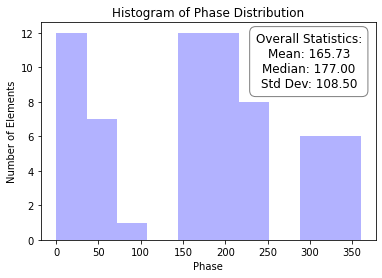

In [6]:
from array_process import*
phase_hist(phase_h,0,360)

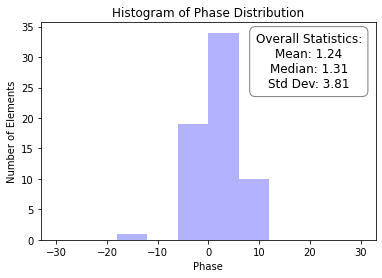

In [7]:
phase_h1rx = {0: [-149.96585083, -117.755271912, 20.3027496338, 0.635007321835], 1: [21.9652709961, 62.4672927856, -151.019165039, -156.894744873], 2: [18.0360336304, 3.73356032372, -147.87638855, -179.429046631], 3: [-127.237312317, -67.5246658325, 19.9068698883, 4.91627407074], 4: [40.81457901, 79.5408401489, -105.843940735, -133.405090332], 5: [-115.156822205, -112.945472717, 37.0663337708, 25.4959430695], 6: [-74.4244918823, -69.4849243164, 76.3843460083, 66.9326400757], 7: [50.7709579468, 101.690483093, -96.5825653076, -105.363166809], 8: [39.3756256104, 90.7819213867, -147.844573975, -147.94078064], 9: [-82.0411605835, -84.7908706665, 78.2760696411, 77.3602905273], 10: [-74.6895294189, -87.3760223389, 79.3191223145, 58.1372642517], 11: [53.441532135, 101.906600952, -114.457092285, -121.936813354], 12: [-133.832946777, -101.723922729, 46.1137771606, 51.5965080261], 13: [28.429599762, 61.9270782471, -148.305770874, -161.441925049], 14: [41.7744789124, 64.3201370239, -143.469863892, 157.044799805], 15: [-156.219955444, -63.6063156128, 47.3480224609, 64.3146057129]}
phase_v1rx = {0: [-95.5228042603, 89.4635620117, 114.979934692, -93.2526626587], 1: [94.8927001953, -65.6482162476, -97.2609176636, 105.103019714], 2: [78.0923538208, -91.7216186523, -114.205825806, 84.0234909058], 3: [-116.356071472, 92.1534042358, 108.729759216, -90.9324264526], 4: [86.6951370239, -28.44880867, -44.452922821, 115.008239746], 5: [-87.5430755615, 128.246047974, 117.170471191, -51.3994903564], 6: [-14.27115345, 154.033462524, 154.247711182, -23.3797988892], 7: [119.34576416, -22.7891960144, -15.1032629013, 116.099258423], 8: [83.6734771729, -44.1551094055, -53.6978378296, 84.8850784302], 9: [-40.9998855591, 159.418792725, 163.190170288, -9.13540172577], 10: [-13.5452508926, 144.460067749, 135.745605469, 0.28191074729], 11: [98.1873245239, -13.8269090652, -14.599697113, 105.485900879], 12: [-85.7239379883, 111.950134277, 106.873527527, -43.062084198], 13: [55.811416626, -49.7373161316, -86.4563674927, 109.415237427], 14: [-72.5291366577, -63.2857322693, -72.2981262207, 95.1578598022], 15: [-104.818962097, 97.6162033081, 98.6078643799, -77.6859512329]}
phase_h2rx = {0: [7.86491775513, -7.42141723633, 4.59891271591, 3.23133993149], 1: [2.05004167557, 6.97846841812, -13.7675008774, 5.50977468491], 2: [2.64459705353, 3.48136854172, -5.27780294418, 1.73234140873], 3: [-8.56195735931, -15.364074707, 5.47478866577, 0.968649506569], 4: [5.09627914429, 2.87347912788, -3.80422115326, 16.4703941345], 5: [-1.71159684658, -7.2874455452, 1.91188645363, 6.91074705124], 6: [-0.727902770042, -3.60429048538, -0.36615434289, 3.01191616058], 7: [1.04857122898, -7.83764028549, 0.870718479156, 11.0526065826], 8: [1.45067310333, 1.41413712502, -8.94017982483, 21.3723583221], 9: [3.77769446373, -1.33066141605, -2.95411133766, 3.52833294868], 10: [-4.30070734024, 8.08773136139, -4.39973402023, 4.61766576767], 11: [-2.18050384521, -5.23120355606, -10.8148536682, 13.3184423447], 12: [-0.57853782177, -16.7884292603, -0.175772711635, 2.44276547432], 13: [-2.53339576721, -0.322047501802, -11.3307991028, -4.23819494247], 14: [5.66762876511, 4.47950410843, 1.51877856255, 0.79349386692], 15: [-6.897336483, -6.91781759262, 2.4911634922, 11.9909553528]}
phase_v2rx = {0: [-7.98879480362, 4.48708772659, -2.93923187256, -1.83487904072], 1: [-9.9504442215, -3.16110110283, -4.69881057739, -0.312853038311], 2: [-14.227230072, -10.1753988266, -7.17418718338, -7.84242582321], 3: [-14.7124958038, 8.80647373199, -1.07495772839, -14.6269254684], 4: [-6.01504516602, -3.15071129799, -2.70830011368, -6.44817018509], 5: [-4.45285987854, 7.64745283127, -11.9268856049, -7.22403335571], 6: [-4.89368104935, 0.713297069073, -9.53135585785, -6.1621222496], 7: [-7.12186813354, -2.22370362282, 3.70877766609, -1.12602078915], 8: [0.867920398712, -4.30463790894, -6.62589073181, -2.94133543968], 9: [6.78824853897, -0.975527226925, -7.84357738495, 1.5948843956], 10: [-0.440859675407, -1.35006284714, 20.7840557098, -2.65297627449], 11: [-6.95010042191, -1.25997626781, 2.39895391464, -3.23634910583], 12: [-8.81314182281, 1.75743663311, 4.27358293533, 4.60592126846], 13: [-7.07430315018, -4.50114202499, -7.47403717041, -11.485127449], 14: [2.42071652412, -6.37111997604, -8.10329151154, -7.86855459213], 15: [-4.50189447403, 0.184513017535, -5.62048816681, -7.10484743118]}
phase_h = {0: [-4.40529155731, -0.926823914051, -2.96531939507, 4.52556085587], 1: [1.87916195393, 2.87021398544, -6.51562356949, 4.85816812515], 2: [1.80557119846, -0.867202341557, -3.74090003967, 3.35832571983], 3: [-4.91922283173, 7.25513362885, -1.33811426163, 1.30312871933], 4: [-1.25587260723, 1.15512382984, 3.96253728867, -3.57571864128], 5: [0.208869814873, 4.12164115906, -1.15574073792, -2.87169647217], 6: [-1.50566053391, 2.44649481773, 0.169996082783, 9.274933815], 7: [-2.6832139492, 4.03855133057, 3.1891617775, -3.38476872444], 8: [2.98869538307, 1.88686180115, 5.5344414711, 6.44631719589], 9: [0.107921503484, -0.131574511528, 3.04682421684, 4.84040594101], 10: [4.57360553741, -4.76115989685, -0.462217748165, 4.73173332214], 11: [0.449895977974, 0.260628253222, 0.727855145931, -0.600505232811], 12: [2.12006425858, 4.00828647614, 1.34917867184, 3.017162323], 13: [2.87807035446, 1.31707406044, 8.44613933563, -0.386419594288], 14: [-1.27056384087, 2.54319167137, -3.7031223774, 0.902983367443], 15: [-0.283941447735, 0.385773271322, -4.27342367172, 5.72706031799]}
phase_v = {0: [-5.2325758934, 6.30412054062, -4.54858207703, -2.06370973587], 1: [-5.07376861572, -2.07296872139, 1.37176942825, 1.17311680317], 2: [6.45068502426, 1.4790661335, 7.86583042145, 6.70795106888], 3: [3.28073263168, 1.25920796394, -0.331973046064, 1.75113451481], 4: [-2.49899983406, 6.90822935104, -0.466220498085, 2.12935209274], 5: [-5.46761655807, 0.947724282742, -0.615834593773, -1.22743904591], 6: [2.01935172081, 1.35157752037, 0.162884831429, 5.0529050827], 7: [0.598595499992, -0.438187509775, -2.1997461319, 0.582134604454], 8: [0.00224213930778, 3.5271654129, 2.37721896172, 4.01920366287], 9: [-1.92894697189, 1.36003482342, 6.42185544968, -1.02524375916], 10: [0.568206608295, 6.04965257645, -3.86119484901, 0.192858293653], 11: [2.44465517998, 7.03279876709, -1.92812824249, 3.06439089775], 12: [2.18944311142, 4.2065577507, 6.93922185898, -0.885367870331], 13: [8.44717025757, 2.25907588005, 1.45609402657, 3.23964357376], 14: [-14.2452898026, -0.483220845461, 0.480208396912, 2.24326848984], 15: [3.69531154633, 1.17611610889, 4.26341629028, 1.16256773472]}


for i in range(16):
    for j in range(4):
        phase_h2rx[i][j]=phase_h2rx[i][j]
        phase_v2rx[i][j]=phase_v2rx[i][j]
phase_hist(phase_v)

In [ ]:
array_2d = (RHCP_ideal_h-array_2d)
for i in range(8):
    for j in range(8):
        if array_2d[i][j] <-180:  array_2d[i][j] =(array_2d[i][j]+360)
plt.imshow(array_2d, cmap='twilight_shifted', aspect='auto',vmin=0,vmax = 359, interpolation='nearest')
# plt.imshow(array_2d, cmap='twilight_shifted', aspect='auto',vmin=-100,vmax = 100, interpolation='nearest')
for i in range(8):
    for j in range(8):
        plt.annotate(f'{array_2d[i, j]:.0f}', xy=(j, i), ha='center', va='center', color='white')

plt.axis('off')
colorbar= plt.colorbar()

plt.show

In [ ]:

phase_h = {0: [-21.8683109283, -28.7904434204, 0.721414089203, 6.03319787979], 1: [-15.0, 6.0, 15.0, 37.0], 2: [-8.0, 0.0, 5.0, 12.0], 3: [17.0, 25.0, -8.0, -1.0], 4: [14.0, 13.0, -12.0, -4.0], 5: [-7.0, -7.0, 29.0, 14.0], 6: [4.0, -11.0, 32.0, 17.0], 7: [7.0, 10.0, -1.0, -4.0], 8: [6.0, 17.0, 2.0, -8.0], 9: [-6.0, -11.0, 9.0, 43.0], 10: [9.0, -11.0, 9.0, 20.0], 11: [16.0, 28.0, -1.0, -4.0], 12: [11.0, -28.0, 33.0, 39.0], 13: [17.0, 14.0, -4.0, -6.0], 14: [23.0, 30.0, -15.0, -3.0], 15: [-8.0, -10.0, 140.0, 22.0]}
phase_v = {0: [0.457231640816, -8.06587791443, 5.6758389473, 3.69521570206], 1: [3.0, 14.0, 14.0, -8.0], 2: [4.0, 13.0, 8.0, 12.0], 3: [6.0, 6.0, 7.0, 17.0], 4: [1.0, 13.0, 19.0, 7.0], 5: [-7.0, 4.0, 3.0, -3.0], 6: [-10.0, -0.0, -3.0, 9.0], 7: [-3.0, 3.0, 6.0, -3.0], 8: [-3.0, -14.0, -11.0, 8.0], 9: [-0.0, 18.0, -5.0, 4.0], 10: [-6.0, -1.0, 0.0, 16.0], 11: [2.0, 7.0, -3.0, 12.0], 12: [2.0, 4.0, 12.0, 2.0], 13: [0.0, -8.0, -3.0, 5.0], 14: [7.0, 7.0, 1.0, -1.0], 15: [21.0, 14.0, -23.0, 10.0]}
phase_hist(phase_h)

In [ ]:
phase_h1 = {0: [-140.438949585, -155.957885742, 77.3592529297, 16.7920589447], 1: [71.9655456543, 32.355682373, -102.070045471, -112.5496521], 2: [95.914894104, 30.5523071289, -80.4076843262, -110.238548279], 3: [-139.270965576, -148.637664795, 61.4190216064, -4.90763139725], 4: [-81.5024490356, -97.1079330444, 102.369667053, 69.4663925171], 5: [104.056976318, 77.2211685181, -80.7198562622, -107.27406311], 6: [110.104759216, 77.628616333, -64.4389038086, -82.9901275635], 7: [-74.6355361938, -80.6768341064, 101.571525574, 63.4978179932], 8: [-103.262382507, -103.142860413, 92.5758056641, 61.1847724915], 9: [79.9026412964, 42.5963058472, -98.5006790161, -131.769638062], 10: [108.779380798, 83.2155151367, -84.6832122803, -90.8022994995], 11: [-122.46446991, -124.681648254, 94.362411499, 59.1722984314], 12: [122.401412964, 98.8912353516, -105.250221252, -114.516990662], 13: [-146.848480225, -160.188171387, 65.2174758911, 18.0247211456], 14: [-87.6264266968, -107.735046387, 113.844551086, 79.946182251], 15: [127.893501282, 118.017120361, 160.92640686, -86.1872787476]}
phase_v1 = {0: [-92.495880127, 109.808105469, 139.963912964, -120.260299683], 1: [153.953399658, -70.1703186035, -20.4124412537, 107.113471985], 2: [170.410140991, -66.0042877197, -29.6119918823, 112.361175537], 3: [-73.8662033081, 113.11504364, 146.321426392, -108.066894531], 4: [-0.0573412664235, 136.894210815, 170.090713501, -58.8383522034], 5: [153.914794922, -19.6874065399, 17.6296787262, 123.650779724], 6: [176.075210571, -13.7653961182, 8.13996124268, 133.654800415], 7: [27.0675811768, 158.382873535, -148.254821777, -34.6324691772], 8: [-12.5922880173, 133.564743042, 178.835067749, -70.8825531006], 9: [159.439178467, -50.4423522949, 4.9991941452, 119.022537231], 10: [177.231750488, -17.2525463104, -2.04678797722, 126.883972168], 11: [-44.8693122864, 114.888221741, 173.296279907, -76.7163467407], 12: [-174.168121338, -26.0995807648, -15.6143655777, 131.108734131], 13: [-79.8478851318, 106.043991089, 144.653991699, -119.5625], 14: [-32.8425369263, 156.640396118, -175.676635742, -42.8337745667], 15: [-148.559936523, -14.349814415, 69.9367218018, 156.844650269]}

phase_h2 = {0: [35.5211448669, 48.9360771179, -21.0426959991, -1.56332457066], 1: [-14.6932497025, 6.17995071411, 14.5562992096, 36.7508544922], 2: [-8.4191608429, 0.255241751671, 4.88639068604, 12.2872619629], 3: [16.6290931702, 24.8294563293, -8.13941669464, -0.588575720787], 4: [14.0954370499, 13.2856864929, -11.6224117279, -4.34202671051], 5: [-7.23120737076, -7.42345952988, 29.2862701416, 14.0625677109], 6: [4.1309261322, -11.4885454178, 32.3280639648, 17.3143920898], 7: [7.32217645645, 10.1140956879, -0.521732091904, -3.57388997078], 8: [6.11695480347, 16.6404972076, 2.05779671669, -7.89693164825], 9: [-6.35256052017, -11.3688726425, 9.01561069489, 43.3446578979], 10: [9.14679527283, -10.7951841354, 8.68963813782, 19.5362606049], 11: [16.3880329132, 27.9118347168, -1.28736710548, -3.60736823082], 12: [10.8397111893, -27.6929588318, 32.514793396, 39.0548095703], 13: [17.2922515869, 13.6518411636, -3.80286955833, -5.53408765793], 14: [23.4083137512, 30.213136673, -14.6998271942, -3.43015050888], 15: [-8.34760665894, -10.2320919037, 139.657043457, 22.2461338043]}
phase_v2 = {0: [16.7240180969, -1.73319089413, -19.9030952454, 3.42050099373], 1: [2.78023481369, 13.6979465485, 14.3828163147, -8.17498874664], 2: [4.22878551483, 13.3903875351, 7.64844655991, 11.9241485596], 3: [5.87102508545, 5.738322258, 6.77252721786, 16.7235507965], 4: [0.549637377262, 12.6786937714, 18.6393814087, 6.68875026703], 5: [-6.61516523361, 4.38127470016, 3.39836716652, -2.82993865013], 6: [-9.80779838562, -0.195379152894, -3.39220952988, 9.24650382996], 7: [-2.63612699509, 2.57113027573, 5.65747976303, -2.50958228111], 8: [-2.83435845375, -14.2511072159, -10.8006486893, 8.20435237885], 9: [-0.0791183486581, 17.6445560455, -4.63008594513, 3.55839252472], 10: [-6.22309207916, -0.690332710743, 0.00842230208218, 16.3228397369], 11: [2.32909727097, 7.15917396545, -2.51419329643, 11.7649555206], 12: [1.85381221771, 3.94986128807, 11.9773931503, 1.77357542515], 13: [0.331942081451, -8.07056522369, -3.36106419563, 4.91131019592], 14: [7.15937566757, 6.63652706146, 1.36183536053, -0.86114358902], 15: [21.497926712, 14.292506218, -23.4005794525, 9.99058532715]}

RHCP_h1G= {0: [-21.0673179626, -37.5693969727, -172.409484863, -179.783966064], 1: [-167.496994019, -174.185379028, 3.63034629822, -4.11926317215], 2: [-177.95539856, -159.379562378, 9.60042762756, -0.737526834011], 3: [0.746361255646, -8.87780857086, -174.623962402, -172.448944092], 4: [-1.99724423885, -0.31879106164, -175.299728394, -176.856155396], 5: [-179.66305542, -176.903610229, -10.243768692, -2.98637342453], 6: [168.114440918, 171.201141357, -20.1204299927, -15.5794878006], 7: [-2.42547941208, 5.49412059784, 174.640213013, 168.561126709], 8: [-0.249635308981, 2.40984797478, 171.432754517, -178.314086914], 9: [176.586685181, 177.180679321, -3.57026720047, -27.0401630402], 10: [165.534881592, -175.058517456, 1.0461025238, -0.97207659483], 11: [2.19556522369, -16.25963974, 176.280532837, 179.082580566], 12: [164.687225342, -161.337005615, -13.9136199951, -24.3269996643], 13: [-8.59606742859, 12.8647041321, -175.345291138, 174.836914063], 14: [-18.3247261047, -1.67706143856, -170.528274536, 166.980697632], 15: [-174.361053467, 168.526550293, 66.0866088867, 9.7329158783]}
RHCP_v1G = {0: [-109.343780518, 100.200180054, 116.839279175, -96.2928237915], 1: [100.639762878, -99.2497177124, -125.740203857, 105.715316772], 2: [94.3213653564, -101.715263367, -107.2759552, 90.8928756714], 3: [-104.367996216, 96.539855957, 99.1633605957, -102.556365967], 4: [-100.478538513, 93.4293746948, 89.1646499634, -96.9238891602], 5: [101.55039978, -106.171783447, -107.653823853, 104.403686523], 6: [106.669120789, -114.142402649, -93.0857467651, 94.5054626465], 7: [-103.196159363, 99.3726501465, 90.9028625488, -95.4518280029], 8: [-92.6840438843, 109.470748901, 102.874610901, -100.119468689], 9: [97.9094009399, -119.213790894, -108.301872253, 95.3674926758], 10: [110.470588684, -117.08442688, -106.800010681, 86.4085083008], 11: [-97.736541748, 90.3603210449, 98.7411880493, -101.490577698], 12: [107.560997009, -120.824684143, -110.837722778, 100.703582764], 13: [-82.5503463745, 106.163131714, 108.642524719, -103.406944275], 14: [-110.90411377, 108.219856262, 96.1927337646, -100.009643555], 15: [92.6193771362, -140.068939209, -116.198905945, 100.253417969]}


TX_cal_0816={
 0:  [0, 60,165,30,165,210,340,195],
 1:  [0, 60,165,30,165,210,340,195],
 2:  [0, 60,165,30,165,210,340,195],
 3:  [0, 60,165,30,165,210,340,195],
 4:  [0, 60,165,30,165,210,340,195],
 5:  [0, 60,165,30,165,210,340,195],
 6:  [0, 60,165,30,165,210,340,195],
 7:  [0, 60,165,30,165,210,340,195],
 8:  [0, 60,165,30,165,210,340,195],
 9:  [0, 60,165,30,165,210,340,195],
 10: [0, 60,165,30,165,210,340,195],
 11: [0, 60,165,30,165,210,340,195],
 12: [0, 60,165,30,165,210,340,195],
 13: [0, 60,165,30,165,210,340,195],
 14: [0, 60,165,30,165,210,340,195],
 15: [0, 60,165,30,165,210,340,195]}
TX_ideal={
 0:  [270,0,90,0,90,180,270,180],
 1:  [90,180, 270, 180, 270, 0, 90,0],
 2:  [90,180, 270, 180, 270, 0, 90,0],
 3:  [270,0,90,0,90,180,270,180],
 4:  [270,0,90,0,90,180,270,180],
 5:  [90,180, 270, 180, 270, 0, 90,0],
 6:  [90,180, 270, 180, 270, 0, 90,0],
 7:  [270,0,90,0,90,180,270,180],
 8:  [270,0,90,0,90,180,270,180],
 9:  [90,180, 270, 180, 270, 0, 90,0],
 10: [90,180, 270, 180, 270, 0, 90,0],
 11: [270,0,90,0,90,180,270,180],
 12: [90,180, 270, 180, 270, 0, 90,0],
 13: [270,0,90,0,90,180,270,180],
 14: [270,0,90,0,90,180,270,180],
 15: [90,180, 270, 180, 270, 0, 90,0]}
# for i in range(16):
#     for j in range(4):
#         TX_cal_0816[i][2*j]=-phase_v[i][j]%360
#         TX_cal_0816[i][2*j+1]=-phase_h[i][j]%360
# for i in range(16):
#     for j in range(4):
#         TX_cal_0816[i][2*j]=(-phase_v1[i][j]-phase_v2[i][j])%360
#         TX_cal_0816[i][2*j+1]=(-phase_h1[i][j]-phase_h2[i][j])%360
for i in range(16):
    for j in range(4):
        TX_cal_0816[i][2*j]=(-phase_v1[i][j]-phase_v2[i][j]+TX_ideal[i][2*j]+TX_ideal[i][2*j]-RHCP_v1G[i][j])%360
        TX_cal_0816[i][2*j+1]=(-phase_h1[i][j]-phase_h2[i][j]+TX_ideal[i][2*j+1]+TX_ideal[i][2*j+1]-RHCP_h1G[i][j])%360

# for i in range(16):
#     for j in range(4):
#         TX_cal_0816[i][2*j]=(TX_ideal[i][2*j]-RHCP_v1G[i][j])%360
#         TX_cal_0816[i][2*j+1]=(TX_ideal[i][2*j+1]-RHCP_h1G[i][j])%360
# for i in range(16):
#     for j in range(4):
#         TX_cal_0816[i][2*j]=0
#         TX_cal_0816[i][2*j+1]=0
for i in range(16):
    for j in range(8):
        TX_cal_0816[i][j] = round(TX_cal_0816[i][j],0)
TX_cal_0816

In [ ]:
0: [307.0, 38.0, 141.0, 52.0, 116.0, 212.0, 333.0, 232.0]#2G+ ideal RHCP
0:  [0, 60,165,30,165,210,340,195] # 2x2 bvh rhcp

In [ ]:
b={0: [346.0, 105.0, -18.0, 107.0, -30.0, 124.0, 387.0, 165.0],
 1: [-67.0, 123.0, 326.0, 141.0, 276.0, 88.0, -9.0, 76.0],
 2: [-85.0, 93.0, 323.0, 149.0, 292.0, 76.0, -34.0, 98.0],
 3: [338.0, 123.0, -29.0, 124.0, -63.0, 127.0, 361.0, 185.0],
 4: [270.0, 67.0, -60.0, 84.0, -99.0, 89.0, 322.0, 115.0],
 5: [-57.0, 83.0, 285.0, 110.0, 249.0, 51.0, -31.0, 93.0],
 6: [-76.0, 66.0, 284.0, 114.0, 265.0, 32.0, -53.0, 66.0],
 7: [246.0, 67.0, -71.0, 71.0, 233.0, 79.0, 307.0, 120.0],
 8: [285.0, 97.0, -29.0, 87.0, -78.0, 85.0, 333.0, 127.0],
 9: [-69.0, 106.0, 303.0, 149.0, 270.0, 89.0, -33.0, 88.0],
 10: [-81.0, 62.0, 288.0, 108.0, 272.0, 76.0, -53.0, 71.0],
 11: [313.0, 106.0, -32.0, 97.0, -81.0, 87.0, 335.0, 124.0],
 12: [262.0, 47.0, 292.0, 109.0, 274.0, 73.0, -43.0, 75.0],
 13: [350.0, 130.0, -8.0, 147.0, -51.0, 119.0, 385.0, 168.0],
 14: [296.0, 64.0, -73.0, 78.0, 264.0, 81.0, 314.0, 103.0],
 15: [217.0, 60.0, 270.0, 72.0, 223.0, -301.0, -77.0, 64.0]}
a={0: [76.0, 105.0, 252.0, 107.0, 240.0, 304.0, 117.0, 345.0],
 1: [203.0, 303.0, 56.0, 321.0, 6.0, 88.0, 261.0, 76.0],
 2: [185.0, 273.0, 53.0, 329.0, 22.0, 76.0, 236.0, 98.0],
 3: [68.0, 123.0, 241.0, 124.0, 207.0, 307.0, 91.0, 5.0],
 4: [360.0, 67.0, 210.0, 84.0, 171.0, 269.0, 52.0, 295.0],
 5: [213.0, 263.0, 15.0, 290.0, 339.0, 51.0, 239.0, 93.0],
 6: [194.0, 246.0, 14.0, 294.0, 355.0, 32.0, 217.0, 66.0],
 7: [336.0, 67.0, 199.0, 71.0, 143.0, 259.0, 37.0, 300.0],
 8: [15.0, 97.0, 241.0, 87.0, 192.0, 265.0, 63.0, 307.0],
 9: [201.0, 286.0, 33.0, 329.0, 360.0, 89.0, 237.0, 88.0],
 10: [189.0, 242.0, 18.0, 288.0, 2.0, 76.0, 217.0, 71.0],
 11: [43.0, 106.0, 238.0, 97.0, 189.0, 267.0, 65.0, 304.0],
 12: [172.0, 227.0, 22.0, 289.0, 4.0, 73.0, 227.0, 75.0],
 13: [80.0, 130.0, 262.0, 147.0, 219.0, 299.0, 115.0, 348.0],
 14: [26.0, 64.0, 197.0, 78.0, 174.0, 261.0, 44.0, 283.0],
 15: [127.0, 240.0, 0.0, 252.0, 313.0, 59.0, 193.0, 64.0]}
for i in range(16):
    for j in range(8):
        a[i][j]=b[i][j]-a[i][j]
a

In [ ]:
dfs = pd.DataFrame()
for ic_id in range(16):
    file_path = f"{rawdatapath}/{ic_id}_-20.csv";df = pd.read_csv(file_path)
    dfs[ic_id]=(abs(10**(df['S21_LogM']/20) ) + abs(10**(dfs_np_lhcp/20) )) / (abs(10**(dfs_np_rhcp/20) ) - abs(10**(dfs_np_lhcp/20) )) 
    dfs_np_rhcp = dfs.to_numpy()


In [ ]:
dfs = pd.DataFrame();dfs[0]=1;dfs[1]=1212313
dfs

In [ ]:
sum =0 
# phase_h = {0: [-9.8841753006, -10.8879537582, 7.68820714951, -17.8587665558], 1: [58.3392753601, 4.03846502304, 39.3374710083, 22.6767101288], 2: [59.0942993164, 9.3792886734, 74.228012085, 50.846282959], 3: [19.0316200256, 8.4134721756, 29.0725765228, -19.5917415619], 4: [69.8917388916, 7.40354156494, 51.3430633545, 32.7881546021], 5: [76.3606719971, 38.9937896729, 58.2181091309, 13.5427684784], 6: [89.5201721191, 52.2371253967, 99.1153030396, 60.3749313354], 7: [84.996131897, 77.5030136108, 68.8215179443, 17.6128578186], 8: [58.4925918579, 36.0642623901, 43.6303482056, -1.20182514191], 9: [37.2305145264, 9.17256450653, 57.9195137024, 36.9032287598], 10: [80.4375, 21.5322551727, 62.2174377441, 34.2052192688], 11: [31.5496959686, 4.10770177841, 47.4689331055, -2.96687722206], 12: [63.1632881165, -19.5688247681, 68.9229125977, 43.2326545715], 13: [2.05181121826, -12.1015892029, 2.69358730316, -28.8326663971], 14: [63.7746086121, 19.2548332214, 55.215637207, 19.3391609192], 15: [74.4894866943, 12.9174919128, -70.8827514648, 88.0569381714]}
# phase_v = {0: [-178.286819458, -179.85244751, -175.529403687, 122.509086609], 1: [-143.080581665, -160.357177734, -131.051559448, 167.291397095], 2: [-121.996505737, -138.095779419, -137.567611694, -175.386688232], 3: [-166.687973022, 143.933120728, -154.076477051, 149.920455933], 4: [-116.203430176, -137.327758789, -125.02797699, -167.586502075], 5: [-129.973709106, -145.312759399, -108.965919495, -171.147827148], 6: [-112.013435364, -110.179580688, -95.7178421021, -145.984558105], 7: [-108.830764771, -138.848175049, -100.022346497, -150.25730896], 8: [-133.124282837, -164.818725586, -113.119422913, -177.254302979], 9: [-131.468521118, -131.003952026, -117.893791199, -161.515594482], 10: [-123.022720337, -122.714332581, -122.236824036, -149.47845459], 11: [-156.325393677, -175.416427612, -123.988220215, 175.898406982], 12: [-105.199745178, -116.488632202, -109.469337463, -146.564956665], 13: [175.469192505, 130.607528687, -165.008255005, 131.533752441], 14: [-125.919143677, -144.581741333, -121.994873047, -149.598403931], 15: [-70.3596801758, -131.980041504, -71.5309906006, -118.4688797]}
# phase_h = {0: [-13.548661232, -15.2671737671, 5.94541549683, -27.6760673523], 1: [48.6763076782, 14.1120300293, 43.8376426697, 30.6158542633], 2: [56.5810585022, 14.6079015732, 67.2885894775, 42.3713188171], 3: [20.9643115997, 15.897726059, 21.8067817688, -22.217912674], 4: [67.5837631226, 10.8378400803, 55.8606376648, 28.8728351593], 5: [73.8674163818, 41.1709060669, 57.7764625549, 13.7094736099], 6: [87.339012146, 51.9731140137, 103.919624329, 61.745464325], 7: [81.7443237305, 74.4675445557, 69.785774231, 16.7402458191], 8: [63.2308387756, 32.3191871643, 51.9183044434, -2.99501013756], 9: [35.1512680054, 14.8573074341, 52.063293457, 24.8718395233], 10: [79.6496124268, 15.7197217941, 64.6113739014, 40.8412971497], 11: [34.0791549683, -3.42454576492, 46.1657104492, -2.97371912003], 12: [67.4590682983, 0.0308868754655, 61.1562843323, 31.508605957], 13: [4.85359239578, -20.465669632, 2.70969176292, -32.1736793518], 14: [56.1855964661, 28.3129196167, 57.1552467346, 11.4939651489], 15: [75.9729690552, 8.11176872253, -48.2960205078, 87.8891296387]}
# phase_v = {0: [176.125869751, -171.118637085, -164.504577637, 125.189788818], 1: [-153.354660034, -150.582107544, -121.312545776, 173.457641602], 2: [-126.425491333, 36.5038452148, -139.396148682, -169.95161438], 3: [-165.780578613, 142.971038818, -151.446899414, 143.152603149], 4: [-117.370887756, -139.278656006, -124.251152039, -167.865280151], 5: [-131.406448364, -149.660888672, -105.417160034, -165.137985229], 6: [-113.501556396, -112.927482605, -89.0122070313, -145.505111694], 7: [-108.524581909, -138.628646851, -98.4137420654, -154.512878418], 8: [-141.385620117, -168.213439941, -114.321472168, -178.573730469], 9: [-133.137908936, -148.207794189, -116.354690552, -160.508071899], 10: [-118.650764465, -120.394966125, -120.520820618, -153.427825928], 11: [-153.20098877, 179.360046387, -119.602912903, 171.594848633], 12: [-102.810371399, -113.782157898, -106.706359863, -150.030670166], 13: [-175.997589111, 137.57258606, -156.510391235, 136.308166504], 14: [-131.707748413, -135.791793823, -117.971054077, -150.081176758], 15: [-78.1170272827, -114.109153748, -69.2457885742, -124.196731567]}
# phase_h = {0: [-8.14726734161, -12.8529233932, -0.50199007988, -13.1789340973], 1: [50.5426712036, 14.3337802887, 44.1964073181, 38.1019935608], 2: [55.6334228516, 15.8767814636, 68.752243042, 45.0228500366], 3: [15.8249578476, 14.7941484451, 21.979757309, -19.3854980469], 4: [63.9512443542, 20.4854679108, 57.3164215088, 31.9188194275], 5: [75.0489273071, 41.7183418274, 55.1282577515, 10.1474456787], 6: [90.7965393066, 59.3585662842, 94.8083648682, 78.4331283569], 7: [89.7623291016, 72.5149765015, 72.4933242798, 13.7180223465], 8: [54.0108604431, 43.2273025513, 37.6653442383, -2.64040756226], 9: [35.4376564026, 16.3551311493, 49.7732582092, 23.032327652], 10: [81.9161834717, 18.6880607605, 58.3838500977, 31.3909683228], 11: [35.0824546814, -1.78665733337, 48.340965271, -2.05019068718], 12: [66.0525970459, -2.60272574425, 64.6608276367, 31.0004673004], 13: [8.70784473419, -18.8168544769, 6.43867397308, -29.6764068604], 14: [64.619644165, 34.5864715576, 54.9160652161, 19.8481254578], 15: [69.1537322998, 19.9763793945, -57.8714904785, 93.128326416]}
# phase_v = {0: [173.271011353, 150.20930481, -171.737579346, 113.005775452], 1: [-149.281524658, -147.174102783, -124.209709167, 172.263839722], 2: [-125.108436584, -129.534133911, -138.820419312, -179.374954224], 3: [-163.218048096, 145.933197021, -152.141662598, 152.850158691], 4: [-118.030601501, -150.907119751, -126.062942505, -167.307220459], 5: [-135.955184937, -145.261917114, -108.490989685, -166.611999512], 6: [-113.488037109, -116.274543762, -95.3510665894, -144.720947266], 7: [-105.491149902, -134.205383301, -97.7582778931, -156.153762817], 8: [-142.743011475, -162.852127075, -111.64389801, -175.610839844], 9: [-131.518615723, -146.647384644, -120.012382507, -161.931274414], 10: [-122.88520813, -128.578308105, -129.011489868, -152.920852661], 11: [-151.450576782, -175.904846191, -130.390380859, 171.508743286], 12: [-101.449638367, -104.882263184, -105.199127197, -164.139129639], 13: [179.296005249, 119.896347046, -159.597167969, 136.530502319], 14: [-127.644927979, -153.929611206, -117.229118347, -142.616882324], 15: [-75.3961410522, -109.771186829, -58.2622299194, -121.675819397]}
phase_h = {0: [-5.94052648544, -19.8435745239, 0.449763476849, -19.9079093933], 1: [50.6642341614, 10.14341259, 43.1916885376, 31.9016456604], 2: [53.047794342, 9.95073413849, 68.1249389648, 48.5315322876], 3: [20.8572120667, 13.4485445023, 23.5853843689, -14.1165103912], 4: [58.9292259216, 16.2577495575, 55.6537437439, 26.96134758], 5: [69.5926055908, 39.7835159302, 55.6648483276, 15.1982727051], 6: [90.5716323853, 48.0736579895, 93.5862426758, 47.3816986084], 7: [80.3559112549, 64.8733520508, 68.8116149902, 15.6552906036], 8: [58.844997406, 29.3037834167, 42.3892707825, 4.28015518188], 9: [42.1089324951, 13.1038093567, 49.261516571, 25.4980430603], 10: [77.0615844727, 16.7672424316, 58.7242164612, 37.6940078735], 11: [29.1031360626, 0.113753013313, 46.3113479614, -1.80280578136], 12: [50.8874473572, -9.97604942322, 60.7530517578, 34.9405822754], 13: [5.9149723053, -13.1693544388, 7.86695289612, -25.7816543579], 14: [50.975856781, 6.06723928452, 55.6380996704, 17.9801120758], 15: [72.5339279175, 23.3229408264, -66.7757034302, 61.309513092]}
phase_v = {0: [-30.9049491882, -45.0202636719, -19.7395114899, -56.8864707947], 1: [7.11893606186, -20.3887691498, 14.934928894, -26.7787513733], 2: [33.4698867798, -25.2799034119, 11.6288175583, -15.0715837479], 3: [-11.9239187241, -40.5757827759, 9.61609268188, -40.504825592], 4: [47.4638824463, -2.55165028572, 33.6838035583, -6.75283050537], 5: [27.1563529968, -3.06513977051, 43.4541778564, -6.46899366379], 6: [38.2963752747, 17.8944015503, 56.6333961487, 13.1680364609], 7: [58.8606185913, 4.10597610474, 64.0300598145, 0.779888689518], 8: [20.4089069366, -17.8230514526, 36.3358573914, -18.2333621979], 9: [29.9105834961, -11.3969516754, 35.8363761902, -3.63833975792], 10: [37.1396522522, 18.6409263611, 30.0789890289, 7.93200969696], 11: [2.47517704964, -28.7917404175, 18.7171916962, -12.4579334259], 12: [28.7517185211, -7.88663673401, 16.8825740814, -13.3004407883], 13: [-17.8109359741, -54.3737983704, -11.2551593781, -50.9292144775], 14: [15.9368619919, -28.1990680695, 18.3231925964, -8.49083709717], 15: [75.5436553955, 1.23583495617, 92.9841156006, 22.2395801544]}

# for i in range(16):
#     for j in range(4):
#         # if phase_h[i][j] > 180: 
#         phase_v[i][j] = phase_v[i][j]%360
#         sum = sum+phase_v[i][j]

for i in range(16):
    for j in range(4):
        # phase_h[i][j] = phase_h[i][j]%360
        # if phase_h[i][j] > 180: 
        #     phase_h[i][j] = phase_h[i][j]%360
        sum = sum+phase_h[i][j]
sum/64

In [ ]:
# h34 v213

In [ ]:

# array_2d_appended = np.append(array_2d, [new_row], axis=0)
# print("\n2D Array after Appending a New Row:")
# print(array_2d_appended)


In [ ]:
AR_dis = (abs(10**(dfs_np_lhcp/20)) + abs(10**(dfs_np_rhcp/20))) / (abs(10**(dfs_np_rhcp/20)) - abs(10**(dfs_np_lhcp/20)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for the heatmap
data = np.random.rand(4, 4)

# Create a colormap plot (heatmap)
plt.imshow(data, cmap='viridis', interpolation='nearest')

# Add value annotations to the heatmap cells
for i in range(len(data)):
    for j in range(len(data[0])):
        plt.annotate(f'{data[i, j]:.2f}', xy=(j, i), ha='center', va='center', color='white')

# Add a colorbar to indicate the values corresponding to colors
plt.colorbar()

# Display the plot
plt.show()



In [ ]:
#TX

ic_id=2;file_path = f"{rawdatapath}/{ic_id}_-20.csv";df = pd.read_csv(file_path)
dfs = pd.DataFrame();dfs = pd.concat([dfs, df['S21_LogM']], axis=1);dfs_np_rhcp = dfs.to_numpy()
dfs = pd.DataFrame();dfs = pd.concat([dfs, df['S31_LogM']], axis=1);dfs_np_lhcp = dfs.to_numpy()


AR = (abs(10**(dfs_np_rhcp/20) ) + abs(10**(dfs_np_lhcp/20) )) / (abs(10**(dfs_np_rhcp/20) ) - abs(10**(dfs_np_lhcp/20) )) 
f_series = []
for i in range(1500,3201,1):
    f_series.append(i)
# plt.imshow(np.flip(dfs_np_rhcp, axis = 0), cmap='gnuplot', aspect='auto',vmin=-80,vmax = -20, extent=[1, 16, 15, 32])
# colorbar= plt.colorbar()
# dfs = pd.concat([dfs, df['S21_LogM']], axis=1)
# AR_0 = (abs(10**(df['S21_LogM'][1401]/20) ) + abs(10**(df['S31_LogM'][1401]/20) )) / (abs(10**(df['S21_LogM'][1401]/20) ) - abs(10**(df['S31_LogM'][1401]/20) )) 
# AR_0
plt.figure()
plt.plot(f_series,abs(AR), label='Line 1')
plt.ylim([1, 5])
plt.xlim([2700,3200])
plt.grid()

In [ ]:
AR_dis = (abs(10**(dfs_np_lhcp/20)) + abs(10**(dfs_np_rhcp/20))) / (abs(10**(dfs_np_rhcp/20)) - abs(10**(dfs_np_lhcp/20)))


plt.imshow(np.flip(abs(AR_dis), axis = 0), cmap='gnuplot', aspect='auto',vmin=1,vmax = 3, extent=[1, 16, 15, 32])
colorbar= plt.colorbar()

In [ ]:
AR_dis[1400,11]


In [ ]:
dir = os.getcwd()
# Get a list of CSV file paths
dfs = pd.DataFrame()
deg_res=1


for theta in range(-60,61,deg_res):
    # file_path = f"{rawdatapath}/Phi90_theta_{theta}.csv"
    # file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-15.csv"
    file_path = f"{rawdatapath}/Phi0_theta_{theta}_g-20.csv"
    df = pd.read_csv(file_path)
    dfs = pd.concat([dfs, df['S31_LogM']], axis=1)
   
dfs_np_lhcp = dfs.to_numpy()

print(dfs.shape)
# dfT
# dfs
plt.imshow(np.flip(dfs_np_lhcp, axis = 0), cmap='gnuplot', aspect='auto',vmin=-60,vmax = -35, extent=[-60, 60, 15, 32])
colorbar= plt.colorbar()
# colorbar.set_lim(-60, -20)


# Add labels and title
plt.xlabel('Theta(deg)')
plt.ylabel('Frequency(GHz)')
plt.title('Heatmap of S31(dB)')

plt.show()

In [ ]:
AR_dis = (abs(10**(dfs_np_lhcp/20)) + abs(10**(dfs_np_rhcp/20))) / (abs(10**(dfs_np_rhcp/20)) - abs(10**(dfs_np_lhcp/20)))


plt.imshow(np.flip(abs(AR_dis), axis = 0), cmap='gnuplot', aspect='auto',vmin=1,vmax = 4, extent=[-60, 60, 15, 32])
colorbar= plt.colorbar()
# colorbar.set_lim(-60, -20)


# Add labels and title
plt.xlabel('Theta(deg)')
plt.ylabel('Frequency(GHz)')
plt.title('Heatmap of AR')
# plt.xlabel('(Theta+60)/2 (deg)')
# plt.ylabel('(Frequency-24G)*1e-7')
# plt.title('Colormap Plot')

plt.show()
# df['S21_LogM']-df['S31_LogM']


In [ ]:
rawdatapath="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield_p90t45_20230825175809"

fre=29.5;fre_shift = (fre-15)/0.01

dfr_0 = pd.DataFrame()
dfl_0 = pd.DataFrame()
dfr_90 = pd.DataFrame()
dfl_90 = pd.DataFrame()
# AR_0 = (abs(10**(dfs_np_rhcp_0/20) ) + abs(10**(dfs_np_lhcp_0/20) )) / (abs(10**(dfs_np_rhcp_0/20) ) - abs(10**(dfs_np_lhcp_0/20) )) 
theta_series=[]
# dfl_90
for theta in range(-60,61,deg_res):
    theta_series.append(theta)
    file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-20.csv"
    # file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-15.csv"

    df = pd.read_csv(file_path)
    dfr_90 = dfr_90.append(df['S21_LogM'])

for theta in range(-60,61,deg_res):
    file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-20.csv"
#         file_path = f"{rawdatapat2}/Phi00_theta_{theta}.csv"
    # file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-15.csv"

    df = pd.read_csv(file_path)
    dfl_90 = dfl_90.append(df['S31_LogM'])

dfs_np_rhcp_90 = dfr_90[fre_shift].to_numpy()
dfs_np_lhcp_90 = dfl_90[fre_shift].to_numpy()
AR_90 = (abs(10**(dfs_np_rhcp_90/20) ) + abs(10**(dfs_np_lhcp_90/20) )) / (abs(10**(dfs_np_rhcp_90/20) ) - abs(10**(dfs_np_lhcp_90/20) )) 
# AR_90_dB=np.log10(AR_90+0.001)
plt.figure()
plt.plot(theta_series,abs(AR_90), label='AR @$\\Phi$=0, '+str(fre)+'GHz')
# plt.plot(theta_series,abs(AR_0), label='AR @$\\Phi$=0, '+str(fre)+'GHz')
# Annotate a specific data point with a label
# x_coord = -45
# y_coord = 0.6
# text = '(0,1.28)'
# plt.text(x_coord, y_coord, text, fontsize=12, color='blue', ha='center')

plt.ylim([1, 4])
plt.xlim([-60, 60])
plt.xlabel('Theta(deg)')
plt.ylabel('AR')
plt.legend(fontsize=9,loc='upper center')
plt.grid()






# Show the plot
plt.show()
# plt.figure()


In [ ]:
AR_90[61]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data
x = np.linspace(0, 10, 10)
y = np.sin(x)

# Create a plot
plt.plot(x, y, marker='o', linestyle='-', color='blue', label='Data Points')

# Label each data point with its value
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(f'({xi:.2f}, {yi:.2f})', (xi, yi), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Labeled Data Points')
plt.legend()

# Show the plot
plt.show()


In [ ]:
for fre in range(28,32,1):
#     fre = 28
    fre_shift = (fre-24)/0.01
    deg_res=1
    theta_series = []
    dfr_0 = pd.DataFrame()
    dfl_0 = pd.DataFrame()
    dfr_90 = pd.DataFrame()
    dfl_90 = pd.DataFrame()
    for i in range(-60,61,deg_res):
        theta_series.append(i)

    for theta in range(-60,61,deg_res):
        file_path = f"{rawdatapath}/Phi0_theta_{theta}.csv"
#         file_path = f"{rawdatapath}/Phi00_theta_{theta}.csv"
        df = pd.read_csv(file_path)
#         dfr_90 = dfr_90.append(df['S21_LogM'])
        dfr_90 = pd.concat([dfr_90, df['S21_LogM']], axis=1)
    for theta in range(-60,61,deg_res):
        file_path = f"{rawdatapath}/Phi0_theta_{theta}.csv"
#         file_path = f"{rawdatapath}/Phi00_theta_{theta}.csv"
        df = pd.read_csv(file_path)
        dfr_90 = pd.concat([dfr_90, df['S31_LogM']], axis=1)

    # # Plot line 1
#     plt.imshow(np.flip(dfs_np_lhcp, axis = 0), cmap='gnuplot', aspect='auto',vmin=-55,vmax = -25, extent=[-60, 60, 24, 32])
    plt.plot(theta_series,dfr_90[fre_shift], label='S21 @'+str(fre)+'GHz')

    # # Plot line 2
    plt.plot(theta_series,dfl_90[fre_shift], label='S31 @'+str(fre)+'GHz')
    plt.grid()
    plt.ylim([-80, -20])
    plt.xlim([-60, 60])
    plt.title('S21 vs S31 after calibration')
#     plt.title('S21 vs S31 @ '+str(fre)+'GHz')
    plt.xlabel('Theta(deg)')
    plt.ylabel('Gain(dB)')
    plt.legend(loc='upper left')
    plt.legend(fontsize=7)
#     plt.rc('font', size=SMALL_SIZE) 

In [8]:
def phi_check(fre):
    rawdatapath1="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield20230823212536"
    rawdatapath2="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield20230823221549"
    # for fre in range(28):
#     fre = 28
    fre_shift = (fre-15)/0.01
    deg_res=1
    theta_series = []
    dfr_0 = pd.DataFrame()
    dfl_0 = pd.DataFrame()
    dfr_90 = pd.DataFrame()
    dfl_90 = pd.DataFrame()
    for i in range(-60,61,deg_res):
        theta_series.append(i)
    #phi90
    for theta in range(-60,61,deg_res):
        file_path = f"{rawdatapath1}/Phi90_theta_{theta}_g-20.csv"
        #file_path = f"{rawdatapath}/Phi0_theta_{theta}_g-15.csv"

        df = pd.read_csv(file_path)
        dfr_90 = dfr_90.append(df['S21_LogM'])

    for theta in range(-60,61,deg_res):
        file_path = f"{rawdatapath1}/Phi90_theta_{theta}_g-20.csv"
    #     file_path = f"{rawdatapath1}/Phi0_theta_{theta}.csv"

        df = pd.read_csv(file_path)
        dfl_90 = dfl_90.append(df['S31_LogM'])

    # # Plot line 1
    plt.plot(theta_series,dfr_90[fre_shift], label='S21@$\\Phi$=90,'+str(fre)+'GHz')

    # # Plot line 2
    plt.plot(theta_series,dfl_90[fre_shift], label='S31@$\\Phi$=90,'+str(fre)+'GHz')
    #phi0
    for theta in range(-60,61,deg_res):
    #     file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
        # file_path = f"{rawdatapath2}/Phi0_theta_{theta}.csv"
        file_path = f"{rawdatapath2}/Phi0_theta_{theta}_g-15.csv"

        df = pd.read_csv(file_path)
        dfr_0 = dfr_0.append(df['S21_LogM'])

    for theta in range(-60,61,deg_res):
    #     file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
        # file_path = f"{rawdatapath2}/Phi0_theta_{theta}.csv"
        file_path = f"{rawdatapath2}/Phi0_theta_{theta}_g-15.csv"

        df = pd.read_csv(file_path)
        dfl_0 = dfl_0.append(df['S31_LogM'])

    # # Plot line 1
    plt.plot(theta_series,dfr_0[fre_shift], label='S21@$\\Phi$=0,'+str(fre)+'GHz')

    # # Plot line 2
    plt.plot(theta_series,dfl_0[fre_shift], label='S31@$\\Phi$=0,'+str(fre)+'GHz')
    plt.grid()
    plt.ylim([-80, -20])
    plt.xlim([-60, 60])
    plt.title('S21, S31 Comparison : '+ '$\\Phi$=0 vs $\\Phi$=90 ')
    #     plt.title('S21 vs S31 @ '+str(fre)+'GHz')
    plt.xlabel('Theta(deg)')
    plt.ylabel('Gain(dB)')
    plt.legend(fontsize=9,loc='upper left')

    # plt.legend()
    #     plt.rc('font', size=SMALL_SIZE) 
    # import matplotlib.pyplot as plt
    # theta_series = []
    # for i in range(-60,61,deg_res):
    #     theta_series.append(i)
    dfs_np_rhcp_0 = dfr_0[fre_shift].to_numpy()
    dfs_np_lhcp_0 = dfl_0[fre_shift].to_numpy()
    dfs_np_rhcp_90 = dfr_90[fre_shift].to_numpy()
    dfs_np_lhcp_90 = dfl_90[fre_shift].to_numpy()

    AR_0 = (abs(10**(dfs_np_rhcp_0/20) ) + abs(10**(dfs_np_lhcp_0/20) )) / (abs(10**(dfs_np_rhcp_0/20) ) - abs(10**(dfs_np_lhcp_0/20) )) 
    AR_90 = (abs(10**(dfs_np_rhcp_90/20) ) + abs(10**(dfs_np_lhcp_90/20) )) / (abs(10**(dfs_np_rhcp_90/20) ) - abs(10**(dfs_np_lhcp_90/20) )) 


    plt.figure()
    plt.plot(theta_series,abs(AR_90), label='AR @$\\Phi$=90, '+str(fre)+'GHz')
    plt.plot(theta_series,abs(AR_0), label='AR @$\\Phi$=0, '+str(fre)+'GHz')
    plt.ylim([0, 8])
    plt.xlim([-60, 60])
    plt.xlabel('Theta(deg)')
    plt.ylabel('AR(dB)')
    plt.legend(fontsize=9,loc='upper center')
    plt.grid()

C:\Users\TRONFU~1\AppData\Local\Temp/ipykernel_16216/127504675.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
C:\Users\TRONFU~1\AppData\Local\Temp/ipykernel_16216/127504675.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
C:\Users\TRONFU~1\AppData\Local\Temp/ipykernel_16216/127504675.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
C:\Users\TRONFU~1\AppData\Local\Temp/ipykernel_16216/127504675.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
C:\Users\TRONFU~1\AppDat

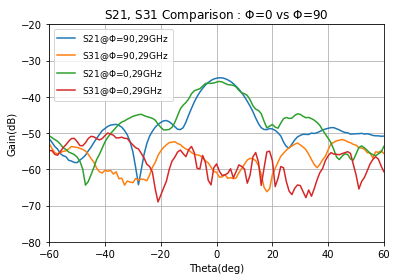

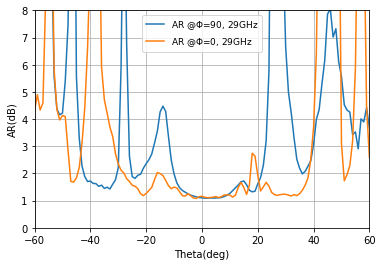

In [9]:
phi_check(29)
    

In [6]:
rawdatapath1="F5288 2x2 Through20230530170355"
rawdatapath2="F5288 2x2 Through20230530170355"#phi0 RHCP
# for fre in range(28):
fre = 28
fre_shift = (fre-24)/0.01
deg_res=1
theta_series = []
dfr_0 = pd.DataFrame()
dfl_0 = pd.DataFrame()
dfr_90 = pd.DataFrame()
dfl_90 = pd.DataFrame()
for i in range(-60,61,deg_res):
    theta_series.append(i)
#phi90
for theta in range(-60,61,deg_res):
    file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
#     file_path = f"{rawdatapath2}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfr_90 = dfr_90.append(df['S21_LogM'])

for theta in range(-60,61,deg_res):
    file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
#     file_path = f"{rawdatapath1}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfl_90 = dfl_90.append(df['S31_LogM'])

# # Plot line 1
plt.plot(theta_series,dfr_90[fre_shift], label='S21@$\\Phi$=90,'+str(fre)+'GHz')

# # Plot line 2
plt.plot(theta_series,dfl_90[fre_shift], label='S31@$\\Phi$=90,'+str(fre)+'GHz')
#phi0
for theta in range(-60,61,deg_res):
#     file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
    file_path = f"{rawdatapath2}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfr_0 = dfr_0.append(df['S21_LogM'])

for theta in range(-60,61,deg_res):
#     file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
    file_path = f"{rawdatapath2}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfl_0 = dfl_0.append(df['S31_LogM'])

# # Plot line 1
plt.plot(theta_series,dfr_0[fre_shift], label='S21@$\\Phi$=0,'+str(fre)+'GHz')

# # Plot line 2
plt.plot(theta_series,dfl_0[fre_shift], label='S31@$\\Phi$=0,'+str(fre)+'GHz')
plt.grid()
plt.ylim([-80, -20])
plt.xlim([-60, 60])
plt.title('S21, S31 Comparison : '+ '$\\Phi$=0 vs $\\Phi$=90 ')
#     plt.title('S21 vs S31 @ '+str(fre)+'GHz')
plt.xlabel('Theta(deg)')
plt.ylabel('Gain(dB)')
plt.legend(fontsize=9,loc='lower left')
# plt.legend()
#     plt.rc('font', size=SMALL_SIZE) 
# import matplotlib.pyplot as plt
# theta_series = []
# for i in range(-60,61,deg_res):
#     theta_series.append(i)
dfs_np_rhcp_0 = dfr_0[fre_shift].to_numpy()
dfs_np_lhcp_0 = dfl_0[fre_shift].to_numpy()
dfs_np_rhcp_90 = dfr_90[fre_shift].to_numpy()
dfs_np_lhcp_90 = dfl_90[fre_shift].to_numpy()

AR_0 = (abs(10**(dfs_np_rhcp_0/20) ) + abs(10**(dfs_np_lhcp_0/20) )) / (abs(10**(dfs_np_rhcp_0/20) ) - abs(10**(dfs_np_lhcp_0/20) )) 
AR_90 = (abs(10**(dfs_np_rhcp_90/20) ) + abs(10**(dfs_np_lhcp_90/20) )) / (abs(10**(dfs_np_rhcp_90/20) ) - abs(10**(dfs_np_lhcp_90/20) )) 


plt.figure()
plt.plot(theta_series,abs(AR_90), label='AR @$\\Phi$=90, '+str(fre)+'GHz')
plt.plot(theta_series,abs(AR_0), label='AR @$\\Phi$=0, '+str(fre)+'GHz')
plt.ylim([0, 8])
plt.xlim([-60, 60])
plt.xlabel('Theta(deg)')
plt.ylabel('AR(dB)')
plt.legend(fontsize=9,loc='upper center')
plt.grid()

FileNotFoundError: [Errno 2] No such file or directory: 'F5288 2x2 Through20230530170355/Phi90_theta_-60.csv'

In [ ]:
dfl_0

In [ ]:
Phi=0
theta = 0
rawdatapath1="F5288 2x2 Through20230530170355"
freq_series = pd.DataFrame()
dfr_90 = pd.DataFrame()
dfl_90 = pd.DataFrame()
dfr_0 = pd.DataFrame()
dfl_0 = pd.DataFrame()
AR_0 = pd.DataFrame()
AR_90 = pd.DataFrame()
file_path = f"{rawdatapath1}/Phi90_theta_0.csv"
df = pd.read_csv(file_path)
freq_series = freq_series.append(df['Frequency'])
dfr_90 = dfr_90.append(df['S21_LogM'])
dfl_90 = dfl_90.append(df['S31_LogM'])


file_path = f"{rawdatapath1}/Phi0_theta_0.csv"
df = pd.read_csv(file_path)
# freq_series = freq_series.append(df['Frequency'])
dfr_0=dfr_0.append(df['S21_LogM'])
dfl_0=dfl_0.append(df['S31_LogM'])

# fre=30
# fre_shift = (fre-24)/0.01
dfs_np_rhcp_0 = dfr_0.to_numpy()
dfs_np_lhcp_0 = dfl_0.to_numpy()
dfs_np_rhcp_90 = dfr_90.to_numpy()
dfs_np_lhcp_90 = dfl_90.to_numpy()
AR_0 = (abs(10**(dfs_np_rhcp_0/20) ) + abs(10**(dfs_np_lhcp_0/20) )) / (abs(10**(dfs_np_rhcp_0/20) ) - abs(10**(dfs_np_lhcp_0/20) ))
AR_90 = (abs(10**(dfs_np_rhcp_90/20) ) + abs(10**(dfs_np_lhcp_90/20) )) / (abs(10**(dfs_np_rhcp_90/20) ) - abs(10**(dfs_np_lhcp_90/20) ))

# plt.figure()
# # plt.plot(freq_series,abs(AR_90), label='AR @$\\Phi$=90, @$\\Theta$=0')
# plt.plot(freq_series,abs(AR_0), label='AR @$\\Phi$=0, @$\\Theta$=0' )
# plt.ylim([0, 8])
# plt.xlim([24, 32])
# plt.xlabel('Frequency(GHz)')
# plt.ylabel('AR(dB)')
# plt.legend(fontsize=9,loc='upper center')
# plt.grid()
# # freq_series.shape
# AR_0

In [ ]:
np.savetxt('data2.csv', AR_90, delimiter=',')

In [ ]:
start = 24
end = 5
step = 0.1

# Convert the step to an appropriate integer representation
step_int = int(step * 10)

# Generate a list of values using a list comprehension
values = [start + i / 10 for i in range(int((end - start) * 10), 0, -step_int)]

# Print the values
for value in values:
    print(value)

In [ ]:

rawdatapath1="D:/USER/Downloads/f6212/Measurement/F6212_OTA/F6212_2x2_BVH20230606115303"
rawdatapath2="D:/USER/Downloads/f6212/Measurement/F6212_OTA/F6212_2x2_BVH20230606121551"
# for fre in range(28):
fre = 20
fre_shift = (fre-15)/0.01
deg_res=1
theta_series = []
dfr_0 = pd.DataFrame()
dfl_0 = pd.DataFrame()
dfr_90 = pd.DataFrame()
dfl_90 = pd.DataFrame()
for i in range(-60,61,deg_res):
    theta_series.append(i)
#phi90
for theta in range(-60,61,deg_res):
    file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
#         file_path = f"{rawdatapath2}/Phi00_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfr_90 = dfr_90.append(df['S12_LogM']+57.82)

for theta in range(-60,61,deg_res):
    file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
#         file_path = f"{rawdatapat2}/Phi00_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfl_90 = dfl_90.append(df['S13_LogM']+57.82)

# # Plot line 1
plt.plot(theta_series,dfr_90[fre_shift], label='S21@$\\Phi$=90,'+str(fre)+'GHz')

# # Plot line 2
plt.plot(theta_series,dfl_90[fre_shift], label='S31@$\\Phi$=90,'+str(fre)+'GHz')
# phi0
deg_res=1
for theta in range(-60,61,deg_res):
#         file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
    file_path = f"{rawdatapath2}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfr_0 = dfr_0.append(df['S12_LogM']+57.82)

for theta in range(-60,61,deg_res):
#         file_path = f"{rawdatapath1}/Phi90_theta_{theta}.csv"
    file_path = f"{rawdatapath2}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfl_0 = dfl_0.append(df['S13_LogM']+57.82)

# # Plot line 1
plt.plot(theta_series,dfr_0[fre_shift], label='S21@$\\Phi$=0,'+str(fre)+'GHz')

# # Plot line 2
plt.plot(theta_series,dfl_0[fre_shift], label='S31@$\\Phi$=0,'+str(fre)+'GHz')
plt.grid()
plt.ylim([-20, 45])
plt.xlim([-60, 60])
plt.title('S21, S31 Comparison : '+ '$\\Phi$=0 vs $\\Phi$=90 ')
#     plt.title('S21 vs S31 @ '+str(fre)+'GHz')
plt.xlabel('Theta(deg)')
plt.ylabel('Gain(dB)')
plt.legend(fontsize=9,loc='lower left')
# plt.legend()
#     plt.rc('font', size=SMALL_SIZE) 
import matplotlib.pyplot as plt
# theta_series = []
# for i in range(-60,61,deg_res):
#     theta_series.append(i)
dfs_np_rhcp_0 = dfr_0[fre_shift].to_numpy()
dfs_np_lhcp_0 = dfl_0[fre_shift].to_numpy()
dfs_np_rhcp_90 = dfr_90[fre_shift].to_numpy()
dfs_np_lhcp_90 = dfl_90[fre_shift].to_numpy()

AR_0 = (abs(10**(dfs_np_rhcp_0/20) ) + abs(10**(dfs_np_lhcp_0/20) )) / (abs(10**(dfs_np_rhcp_0/20) ) - abs(10**(dfs_np_lhcp_0/20) )) 
AR_90 = (abs(10**(dfs_np_rhcp_90/20) ) + abs(10**(dfs_np_lhcp_90/20) )) / (abs(10**(dfs_np_rhcp_90/20) ) - abs(10**(dfs_np_lhcp_90/20) )) 


plt.figure()
plt.plot(theta_series,abs(AR_90), label='AR @$\\Phi$=90, '+str(fre)+'GHz')
plt.plot(theta_series,abs(AR_0), label='AR @$\\Phi$=0, '+str(fre)+'GHz')
plt.ylim([0, 8])
plt.xlim([-60, 60])
plt.xlabel('Theta(deg)')
plt.ylabel('AR')
plt.legend(fontsize=9,loc='upper center')
plt.grid()
# Plot line 1
plt.figure()

# plt.ylim([0, 8])
# plt.xlim([-60, 60])
# plt.xlabel('Theta(deg)')
# plt.ylabel('AR(dB)')
# plt.grid()

In [ ]:
phi_check(28)

In [ ]:
#cubesat antenna
rawdatapath ="Cubesat v3 antenna20230522173410_TX_1_CH_1_2"
fre = 17.5
fre_shift = (fre-15)/0.01
deg_res=2
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
dir = os.getcwd()
# Get a list of CSV file paths
dfr_0 = pd.DataFrame()
dfl_0 = pd.DataFrame()
dfr_90 = pd.DataFrame()
dfl_90 = pd.DataFrame()


# dff = pd.DataFrame({'theta': [ for i in range(-60,61,1)]})
theta_series = []
for i in range(-60,61,1):
    theta_series.append(i)

for theta in range(-60,61,1):
    file_path = f"{rawdatapath}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfr_0 = dfr_0.append(df['S21_LogM'])

for theta in range(-60,61,1):
    file_path = f"{rawdatapath}/Phi0_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfl_0 = dfl_0.append(df['S31_LogM'])

for theta in range(-60,61,1):
    file_path = f"{rawdatapath}/Phi90_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfr_90 = dfr_90.append(df['S21_LogM'])

for theta in range(-60,61,1):
    file_path = f"{rawdatapath}/Phi90_theta_{theta}.csv"

    df = pd.read_csv(file_path)
    dfl_90 = dfl_90.append(df['S31_LogM'])
    
plt.figure()

# # Plot line 1
plt.plot(theta_series,dfr_0[fre_shift], label='Line 1')

# # Plot line 2
plt.plot(theta_series,dfl_0[fre_shift], label='Line 2')
plt.grid()
plt.ylim([-80, -40])
plt.xlim([-60, 60])
plt.figure()
# # Plot line 1
plt.plot(theta_series,dfr_90[fre_shift], label='Line 1')

# # Plot line 2
plt.plot(theta_series,dfl_90[fre_shift], label='Line 2')
plt.grid()
plt.ylim([-80, -40])
plt.xlim([-60, 60])



 
dfs_np_rhcp_0 = dfr_0[fre_shift].to_numpy()
dfs_np_lhcp_0 = dfl_0[fre_shift].to_numpy()
dfs_np_rhcp_90 = dfr_90[fre_shift].to_numpy()
dfs_np_lhcp_90 = dfl_90[fre_shift].to_numpy()



AR_0 = (abs(10**(dfs_np_rhcp_0/20) ) + abs(10**(dfs_np_lhcp_0/20) )) / (abs(10**(dfs_np_rhcp_0/20) ) - abs(10**(dfs_np_lhcp_0/20) )) 
AR_90 = (abs(10**(dfs_np_rhcp_90/20) ) + abs(10**(dfs_np_lhcp_90/20) )) / (abs(10**(dfs_np_rhcp_90/20) ) - abs(10**(dfs_np_lhcp_90/20) )) 

# # Plot line 1
plt.figure()
plt.plot(theta_series,abs(AR_0), label='Line 1')
plt.ylim([0, 8])
plt.xlim([-60, 60])
plt.grid()
# # Plot line 1
plt.figure()
plt.plot(theta_series,abs(AR_90), label='Line 1')
plt.ylim([0, 8])
plt.xlim([-60, 60])
plt.grid()